In [36]:
def cleanFile(path):
    try:
        with open(path, 'r') as fr:
            # reading line by line
            lines = fr.readlines()
         
            # pointer for position
            ptr = 1
     
            # opening in writing mode
            with open(path, 'w') as fw:
                for line in lines:  
                   # if not line.startswith('/work/') and  not line.startswith('treename') \
                   # and not line.startswith('no schedule')  and not line.startswith('tasks computed')\
                   #  and not line.startswith('first') and not len(line.strip()) == 0 \
                   # and not line.startswith('choosen subtree') and not line.startswith('\t task candidates')\
                   # and not line.startswith('MS wrong') and not line.startswith('Makespan')\
                   #  and not line.startswith('using')  and not line.startswith('Subtree')\
                   # and not line.startswith('1 step') and not line.startswith(', ')\
                   # and not line.startswith('MS wrong') and not line.startswith('Makespan'):                       
                    if line.startswith('size') or line.startswith('dump'):
                        if ord(line[len(line) - 2]) ==32:                           
                            first_part = line[0:len(line) - 2]                            
                            second_part = line[len(line) - 1:]                            
                            line  = first_part + second_part                            
                        line= line.replace("times:","")
                        line= line.replace("reprocessing: ","")
                        line = line.replace("\t ", " ") 
                        line = line.replace("\t", " ") 
                        #print(line)
                        fw.write(line)
                    ptr += 1
    except Exception as e: print(e)

        
        
        
def cleanFiles(path):
    #print("clean"+  os.getcwd()+path)
    for root, dirs, files in os.walk( os.getcwd()+path):  
                for file in files:
                    if file.endswith((".out")):
                        cleanFile(os.getcwd()+path+"/"+file)

In [37]:

import pandas
import numpy as np
def readAllDataOneHeuristicPure(path):
    dfWorse = pandas.read_table(path, delim_whitespace=True, names=('treeName', 'makespan', '#trees', 
                                                               'time0step', 'time1cut', 'timepartition')
                       ,dtype={'treeName': str, 'makespan': np.float64, '#trees': np.float64, 
                                                               'time0step': np.float64, 'time1cut': np.float64,
                               'timepartition': np.float64})
    
    return dfWorse

In [38]:
## read runtimes and plot as pie charts
import os
import seaborn as sns
import matplotlib.pyplot as plt


def ReadFromAllTreeCategoriesForOneExperiment(path):  
   
    cleanFiles(path)
    data = []
    TreeCats = []
    
    for root, dirs, files in os.walk(os.getcwd()+path+"/"):   
           
            for file in files:                
                if file.endswith((".out")):                    
                    cwd = os.getcwd()
                    cwd +=path
                    cwd+="/"                   
                    cwd+=file               
                    
                    df = readAllDataOneHeuristicPure(cwd)  
                    
                          
                    categoryName=file[:-4]                      
                    TreeCats.append(categoryName)                    
                   
                    data.append(df)               
              
                   
    
    return data, TreeCats


large_node_weights
large_makespan_weights
all_large
trees
all_small
3_children
20_children
large_edge_weights
random


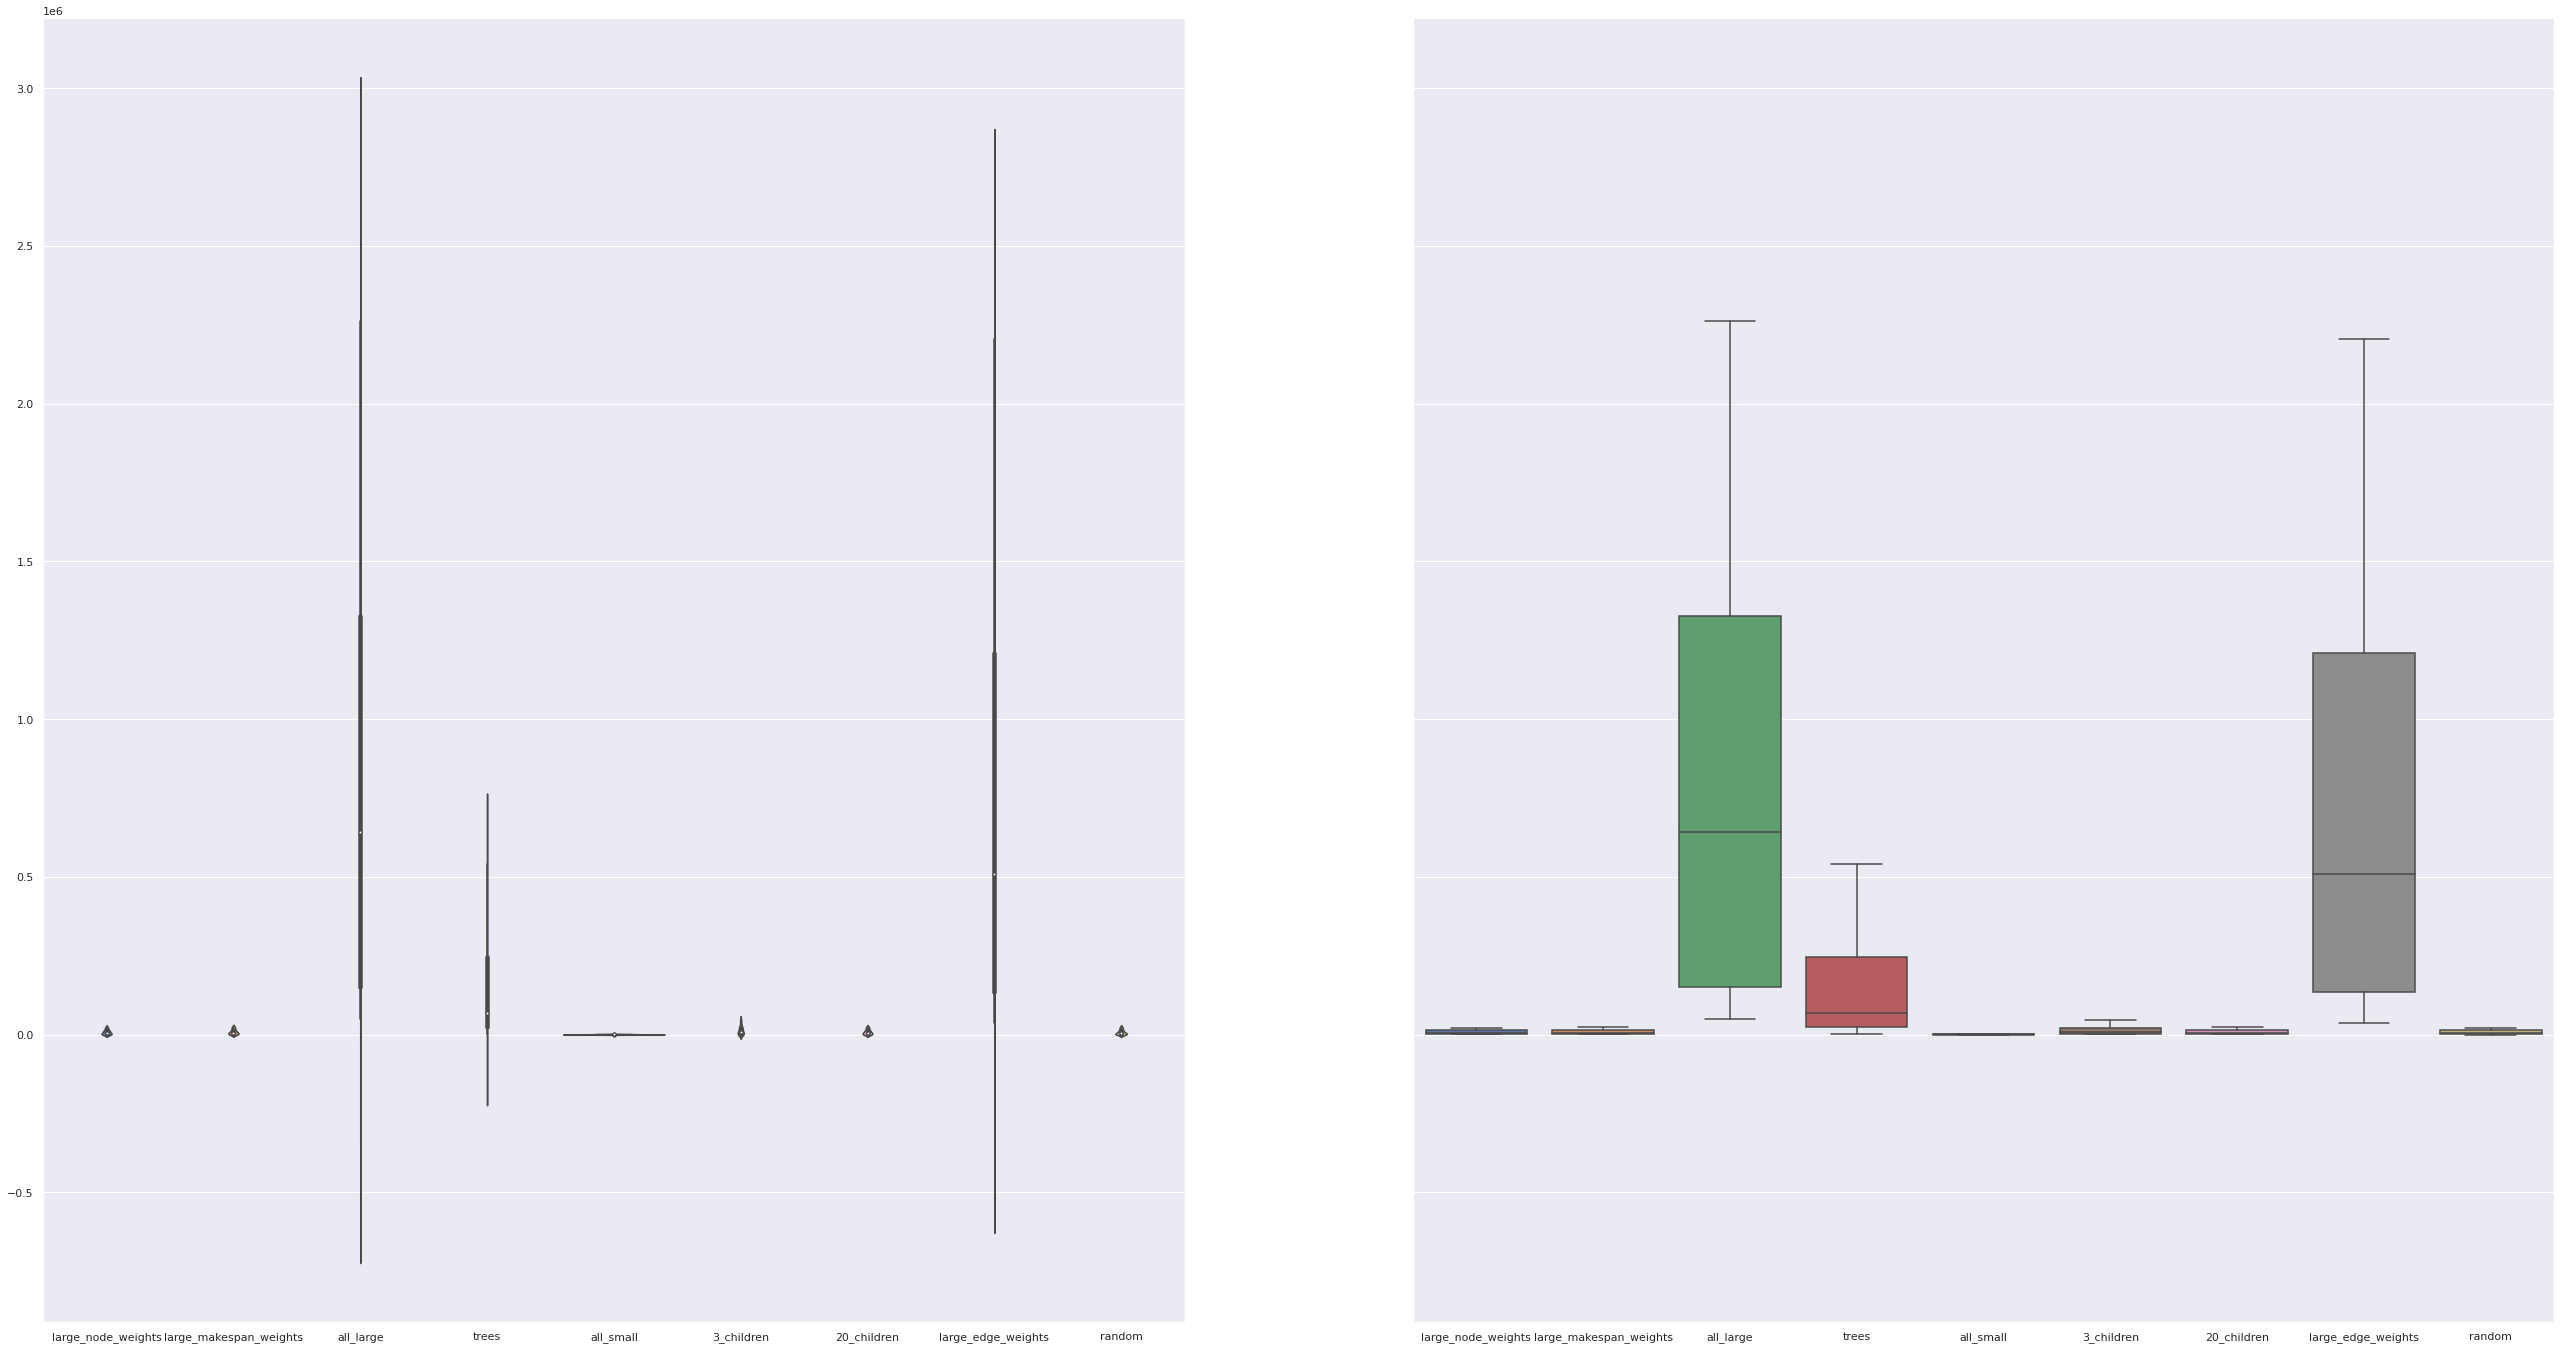

In [39]:
import seaborn
from matplotlib import pyplot as plt
from sklearn import preprocessing


path= "/output-12-10/output/CP-FFT-MD-0"

data, TreeCats = ReadFromAllTreeCategoriesForOneExperiment(path)

allMS = pandas.DataFrame()

i=0
for x in TreeCats: 
    print(x)
    allMS = allMS.assign(x =data[i]['makespan'])
    allMS.rename(columns={'x': x}, inplace=True)
    i = i+1


seaborn.set(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(45,24)})

fig, (ax1, ax2) = plt.subplots(figsize=(45, 24), ncols=2, sharex=True, sharey=True)
seaborn.violinplot(data = allMS, ax = ax1)
sns.boxplot(data = allMS, ax=ax2)
plt.show();



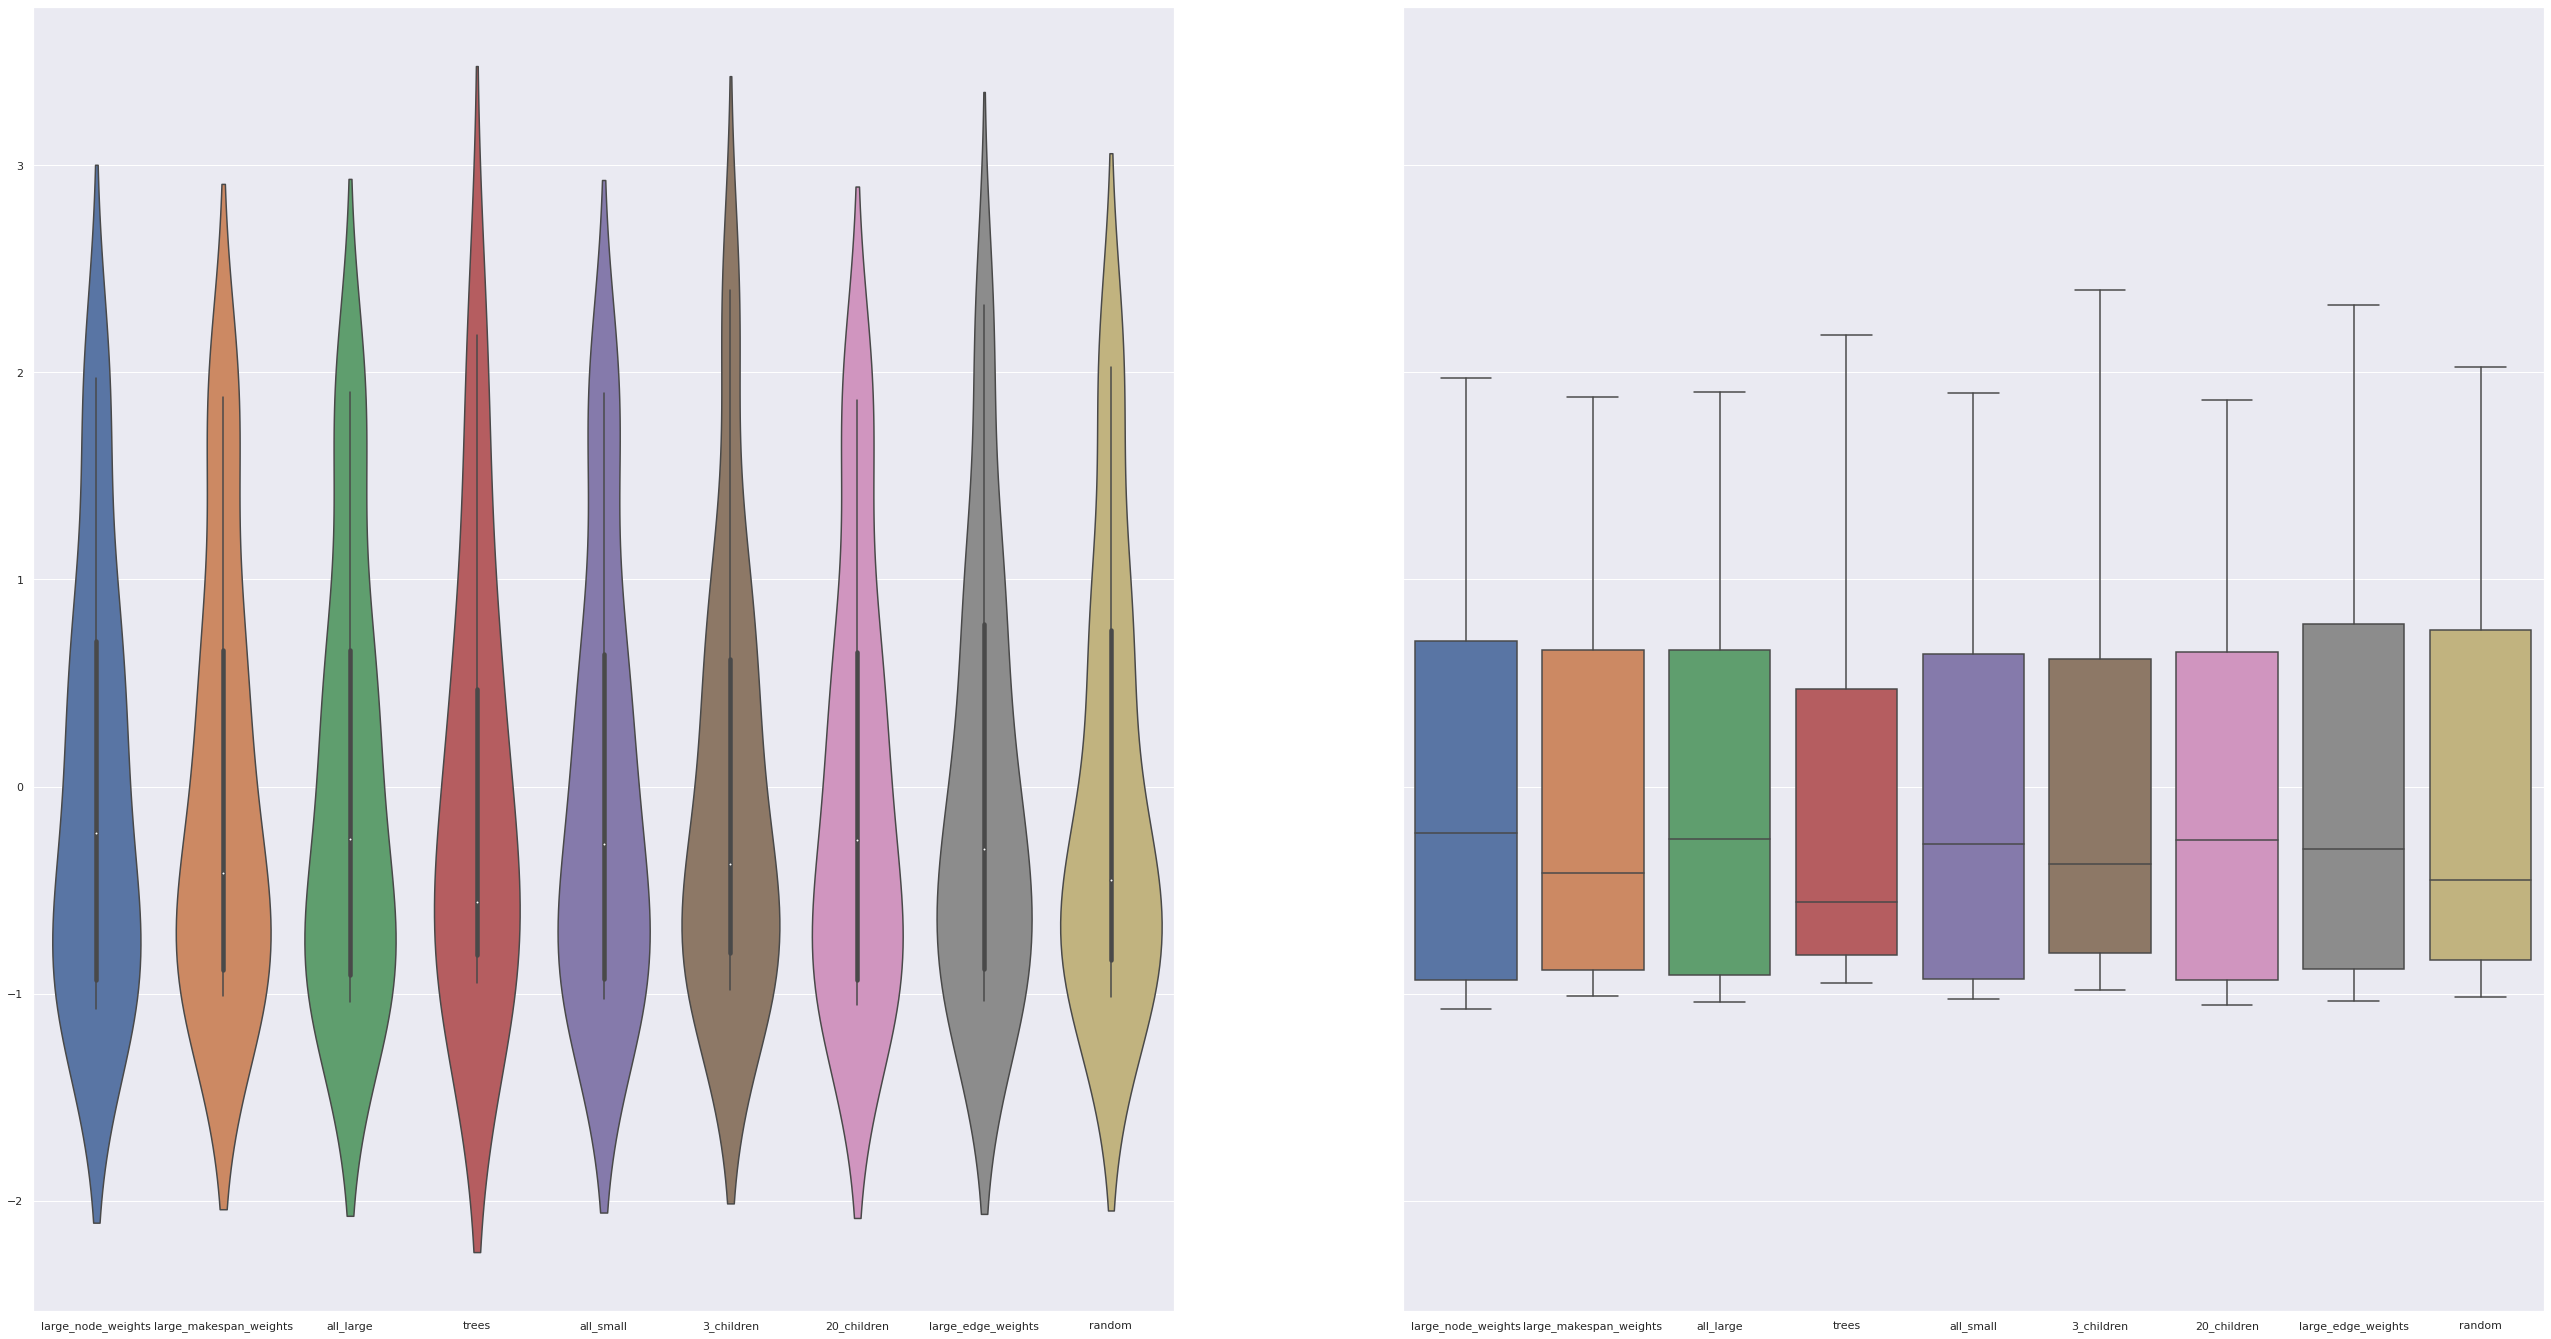

In [40]:

from sklearn.preprocessing import scale

to_scale = ['large_node_weights', 'large_makespan_weights', 'all_large', 'trees', 'all_small', '3_children', \
            '20_children', 'large_edge_weights', 'random']

new_df = allMS.copy()
new_df.loc[:, to_scale] = scale(allMS[to_scale])

fig, (ax1, ax2) = plt.subplots(figsize=(45, 24), ncols=2, sharex=True, sharey=True)
seaborn.violinplot(data = new_df, ax = ax1)
sns.boxplot(data = new_df, ax=ax2)
plt.show();
    


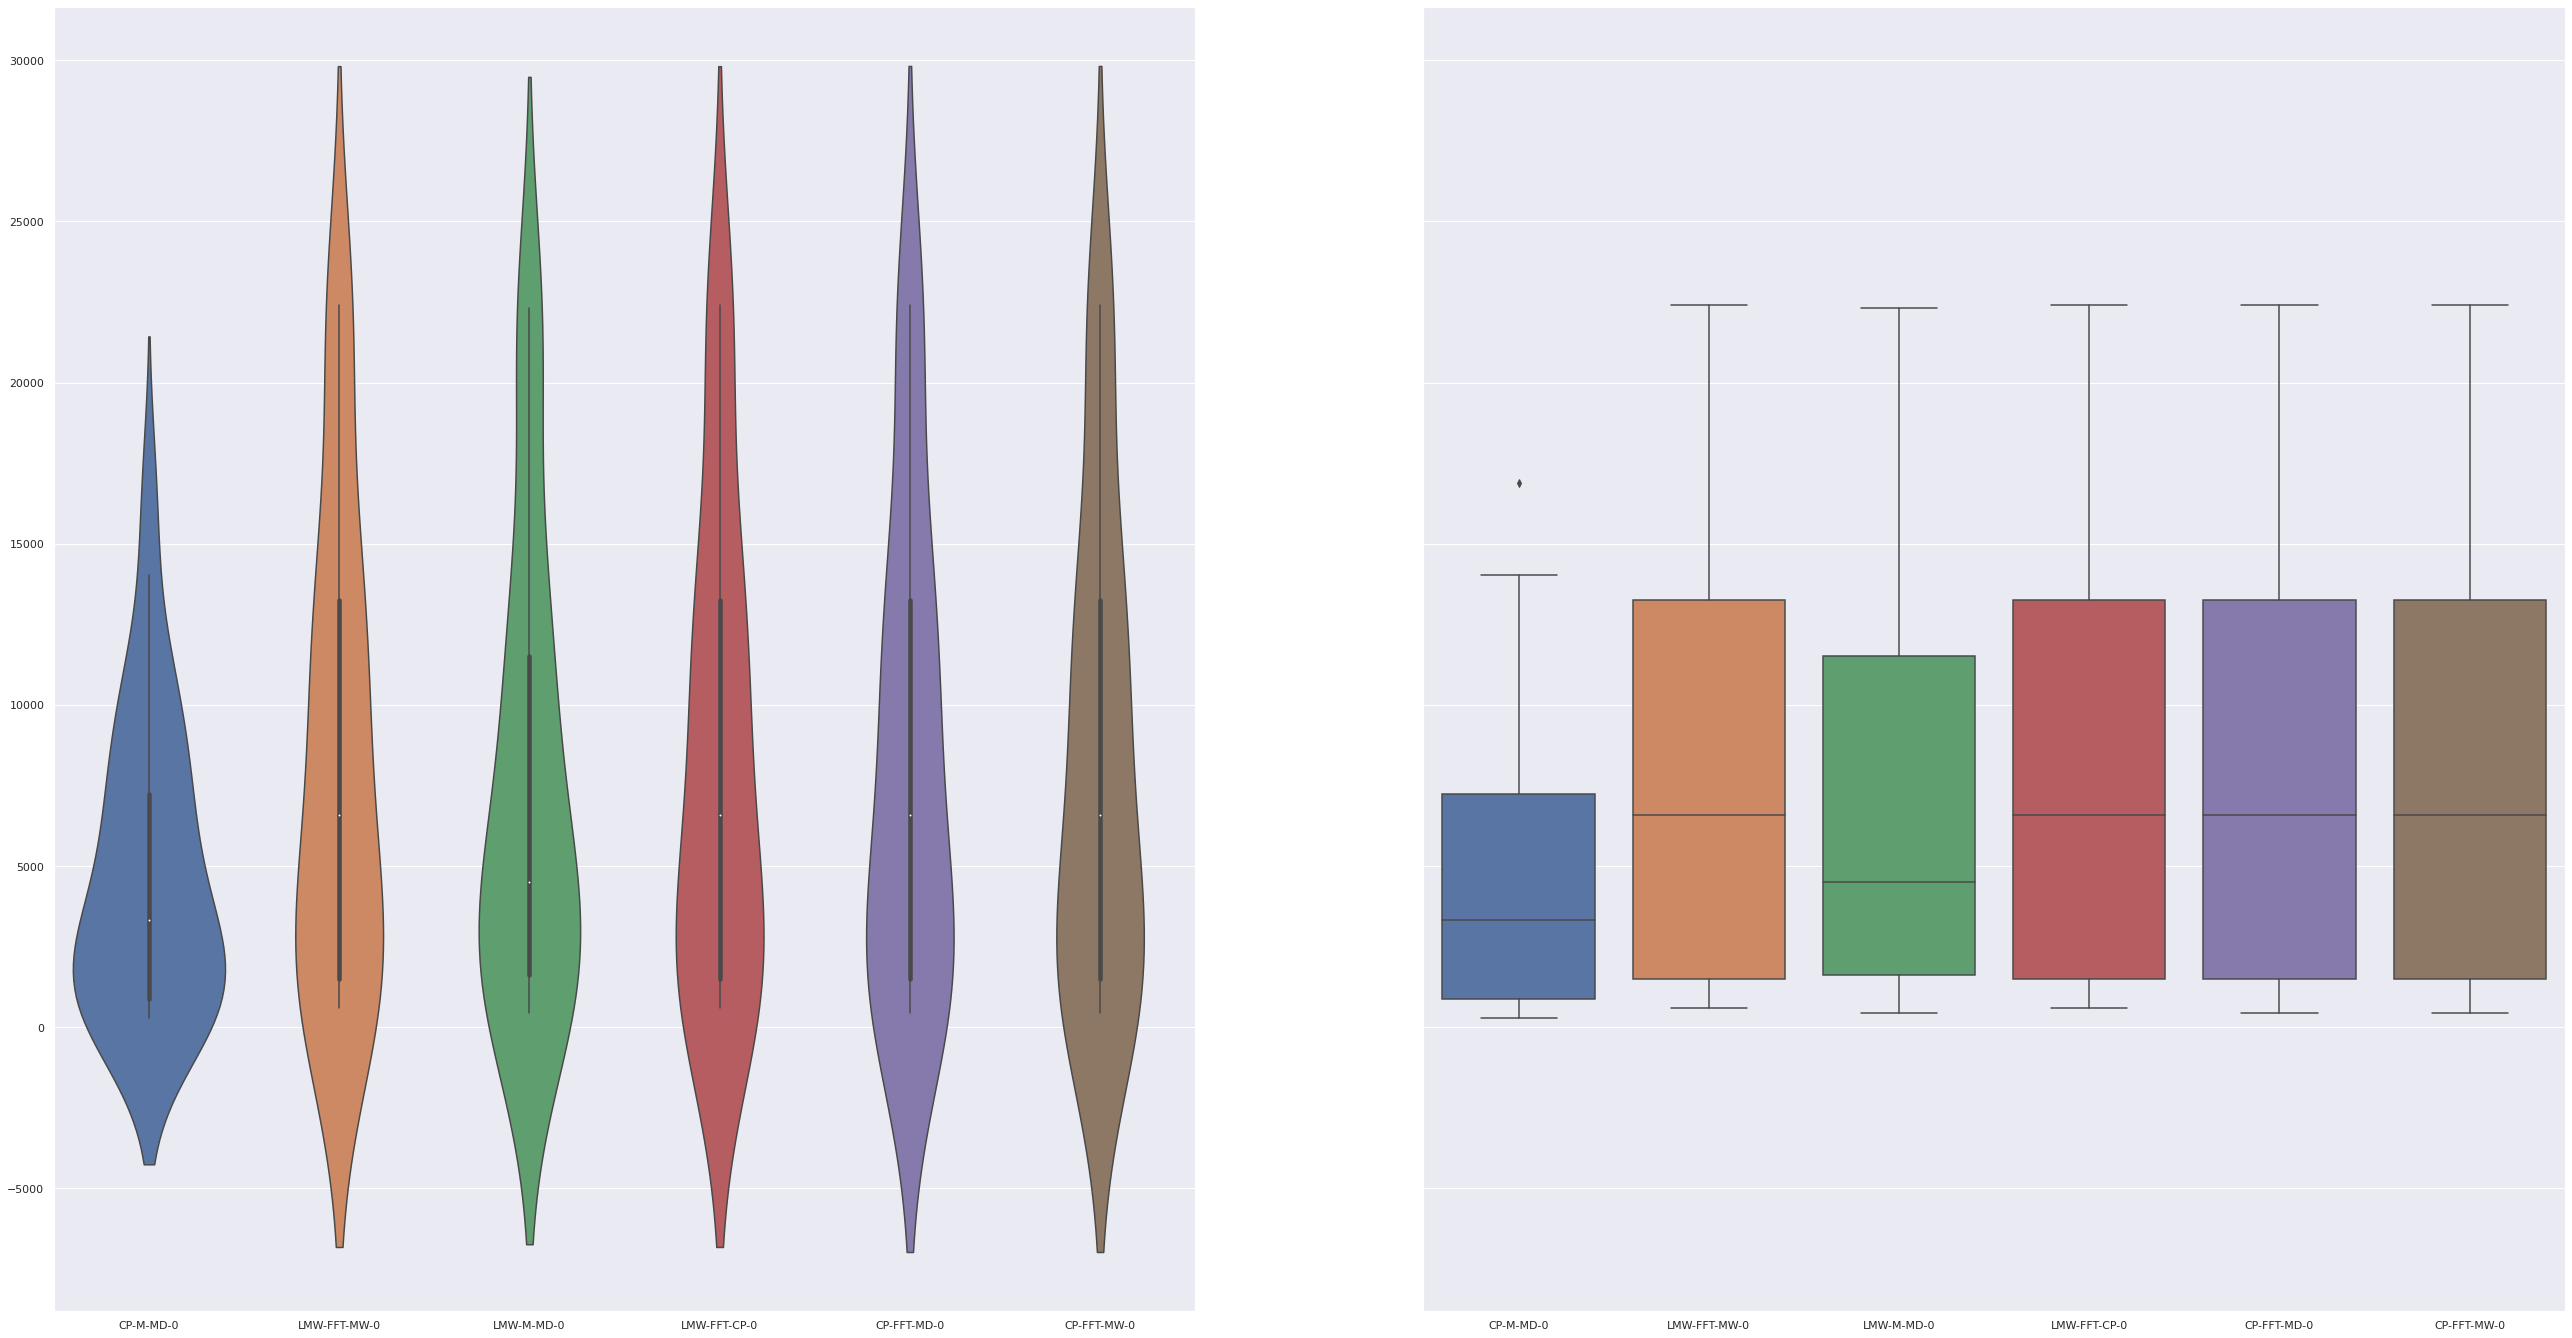

In [41]:
import seaborn
from matplotlib import pyplot as plt
from sklearn import preprocessing


path= "/output-12-10/output"


treesAcrossExperiments =  pandas.DataFrame()
for root, dirs, files in os.walk(os.getcwd()+path):
    for dir in dirs:
        fullpath = path+"/"+dir
        data, TreeCats = ReadFromAllTreeCategoriesForOneExperiment(fullpath)
        #print(data)
        allMS = pandas.DataFrame()
        i=0
        for x in TreeCats:            
            allMS = allMS.assign(x =data[i]['makespan'])
            allMS.rename(columns={'x': x}, inplace=True)
            if x=='trees':
                treesAcrossExperiments = treesAcrossExperiments.assign(trees = data[i]['makespan'])
                treesAcrossExperiments.rename(columns={'trees': dir}, inplace=True)          
                i = i+1          
            
#print(treesAcrossExperiments)

seaborn.set(style = 'whitegrid')
sns.set(rc = {'figure.figsize':(45,24)})

fig, (ax1, ax2) = plt.subplots(figsize=(45, 24), ncols=2, sharex=True, sharey=True)
seaborn.violinplot(data = treesAcrossExperiments, ax = ax1)
sns.boxplot(data = treesAcrossExperiments, ax=ax2)
plt.show();



In [42]:
import seaborn
from matplotlib import pyplot as plt
from sklearn import preprocessing


def readColumnAcrossExperiments(path, whatColumn):
    
    treesMsAcross =  pandas.DataFrame()
    randomMsAcross =  pandas.DataFrame()
    NodeMsAcross =  pandas.DataFrame()
    MSMsAcross =  pandas.DataFrame()
    LargeMsAcross =  pandas.DataFrame()
    SmallMsAcross =  pandas.DataFrame()
    Ch3MsAcross =  pandas.DataFrame()
    Ch20MsAcross =  pandas.DataFrame()
    EdgeMsAcross =  pandas.DataFrame()

    for root, dirs, files in os.walk(os.getcwd()+path):
        for dir in dirs:
            fullpath = path+"/"+dir
            data, TreeCats = ReadFromAllTreeCategoriesForOneExperiment(fullpath)
            #print(data)
            allMS = pandas.DataFrame()
            i=0
            for x in TreeCats:                       
                allMS = allMS.assign(x =data[i]['makespan'])
                allMS.rename(columns={'x': x}, inplace=True)
                if x=='trees':
                    treesMsAcross = treesMsAcross.assign(trees = data[i][whatColumn])
                    treesMsAcross.rename(columns={'trees': dir}, inplace=True)      
                if x=='large_node_weights':
                    NodeMsAcross = NodeMsAcross.assign(trees = data[i][whatColumn])
                    NodeMsAcross.rename(columns={'trees': dir}, inplace=True)   
                if x=='large_makespan_weights':
                    MSMsAcross = MSMsAcross.assign(trees = data[i][whatColumn])
                    MSMsAcross.rename(columns={'trees': dir}, inplace=True)   
                if x=='all_large':
                    LargeMsAcross = LargeMsAcross.assign(trees = data[i][whatColumn])
                    LargeMsAcross.rename(columns={'trees': dir}, inplace=True) 
                if x=='all_small':
                    SmallMsAcross = SmallMsAcross.assign(trees = data[i][whatColumn])
                    SmallMsAcross.rename(columns={'trees': dir}, inplace=True) 
                if x=='3_children':
                    Ch3MsAcross = Ch3MsAcross.assign(trees = data[i][whatColumn])
                    Ch3MsAcross.rename(columns={'trees': dir}, inplace=True) 
                if x=='20_children':
                    Ch20MsAcross = Ch20MsAcross.assign(trees = data[i][whatColumn])
                    Ch20MsAcross.rename(columns={'trees': dir}, inplace=True) 
                if x=='large_edge_weights':
                    EdgeMsAcross = EdgeMsAcross.assign(trees = data[i][whatColumn])
                    EdgeMsAcross.rename(columns={'trees': dir}, inplace=True) 
                if x=='random':
                    randomMsAcross = randomMsAcross.assign(trees = data[i][whatColumn])
                    randomMsAcross.rename(columns={'trees': dir}, inplace=True) 
                i = i+1          
    return treesMsAcross, randomMsAcross, NodeMsAcross, MSMsAcross,LargeMsAcross, SmallMsAcross, Ch3MsAcross, Ch20MsAcross, EdgeMsAcross





In [43]:
def drawAllCategories (treesMsAcross, randomMsAcross, NodeMsAcross, MSMsAcross,LargeMsAcross, SmallMsAcross,\
                        Ch3MsAcross, Ch20MsAcross, EdgeMsAcross) :
    seaborn.set(style = 'whitegrid')
    sns.set(rc = {'figure.figsize':(45,24)})


    fig, (ax1, ax2) = plt.subplots(figsize=(45, 24), ncols=2, sharex=True, sharey=True)
    seaborn.violinplot(data = treesMsAcross, ax = ax1)
    sns.boxplot(data = treesMsAcross, ax=ax2)
    plt.title('Matrix trees')
    plt.show();

    fig, (ax1, ax2) = plt.subplots(figsize=(45, 24), ncols=2, sharex=True, sharey=True)
    seaborn.violinplot(data = randomMsAcross, ax = ax1)
    sns.boxplot(data = randomMsAcross, ax=ax2)
    plt.title('Random trees')
    plt.show();

    fig, (ax1, ax2) = plt.subplots(figsize=(45, 24), ncols=2, sharex=True, sharey=True)
    seaborn.violinplot(data = NodeMsAcross, ax = ax1)
    sns.boxplot(data = NodeMsAcross, ax=ax2)
    plt.title('Large Node Weight trees')
    plt.show();


    fig, (ax1, ax2) = plt.subplots(figsize=(45, 24), ncols=2, sharex=True, sharey=True)
    seaborn.violinplot(data = MSMsAcross, ax = ax1)
    sns.boxplot(data = MSMsAcross, ax=ax2)
    plt.title('Large Makespan Weight trees')
    plt.show();

    fig, (ax1, ax2) = plt.subplots(figsize=(45, 24), ncols=2, sharex=True, sharey=True)
    seaborn.violinplot(data = EdgeMsAcross, ax = ax1)
    sns.boxplot(data = EdgeMsAcross, ax=ax2)
    plt.title('Large edge weights trees')
    plt.show();


    fig, (ax1, ax2) = plt.subplots(figsize=(45, 24), ncols=2, sharex=True, sharey=True)
    seaborn.violinplot(data = LargeMsAcross, ax = ax1)
    sns.boxplot(data = LargeMsAcross, ax=ax2)
    plt.title('All large trees')
    plt.show();


    fig, (ax1, ax2) = plt.subplots(figsize=(45, 24), ncols=2, sharex=True, sharey=True)
    seaborn.violinplot(data = SmallMsAcross, ax = ax1)
    sns.boxplot(data = SmallMsAcross, ax=ax2)
    plt.title('All small trees')
    plt.show();

    fig, (ax1, ax2) = plt.subplots(figsize=(45, 24), ncols=2, sharex=True, sharey=True)
    seaborn.violinplot(data = Ch3MsAcross, ax = ax1)
    sns.boxplot(data = Ch3MsAcross, ax=ax2)
    plt.title('High fanout (3 children) trees')
    plt.show();


    fig, (ax1, ax2) = plt.subplots(figsize=(45, 24), ncols=2, sharex=True, sharey=True)
    seaborn.violinplot(data = Ch20MsAcross, ax = ax1)
    sns.boxplot(data = Ch20MsAcross, ax=ax2)
    plt.title('Highest fanout (20 children)  trees')
    plt.show();

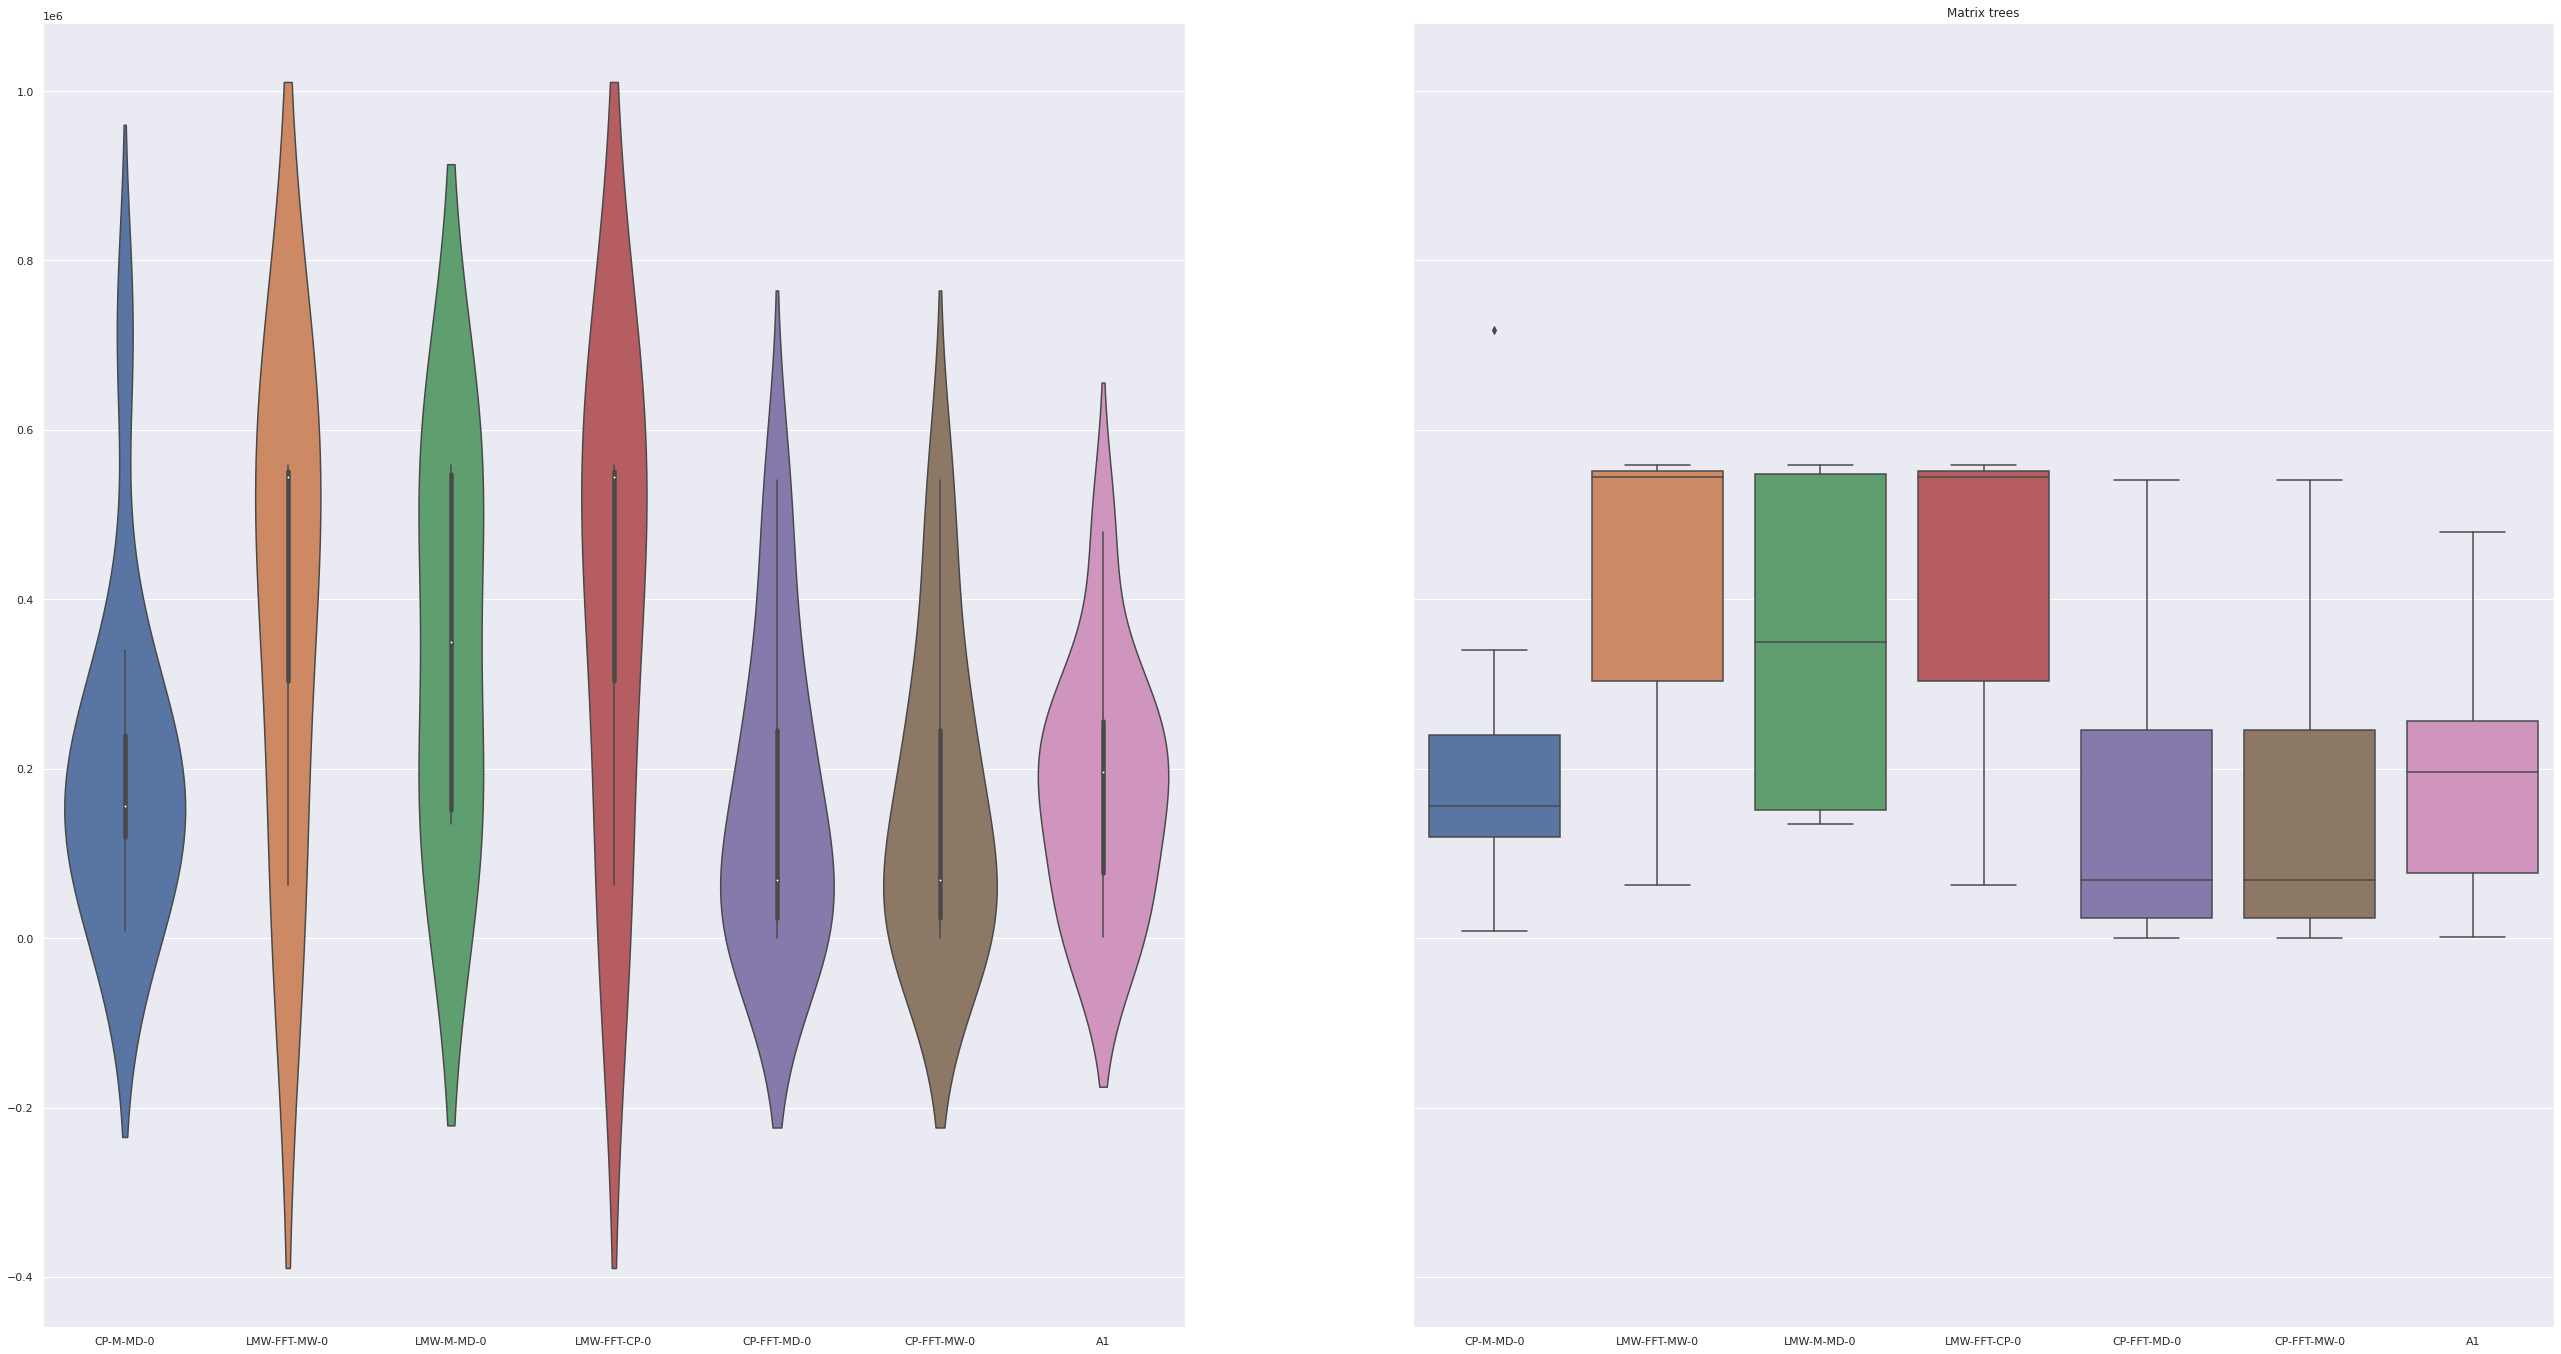

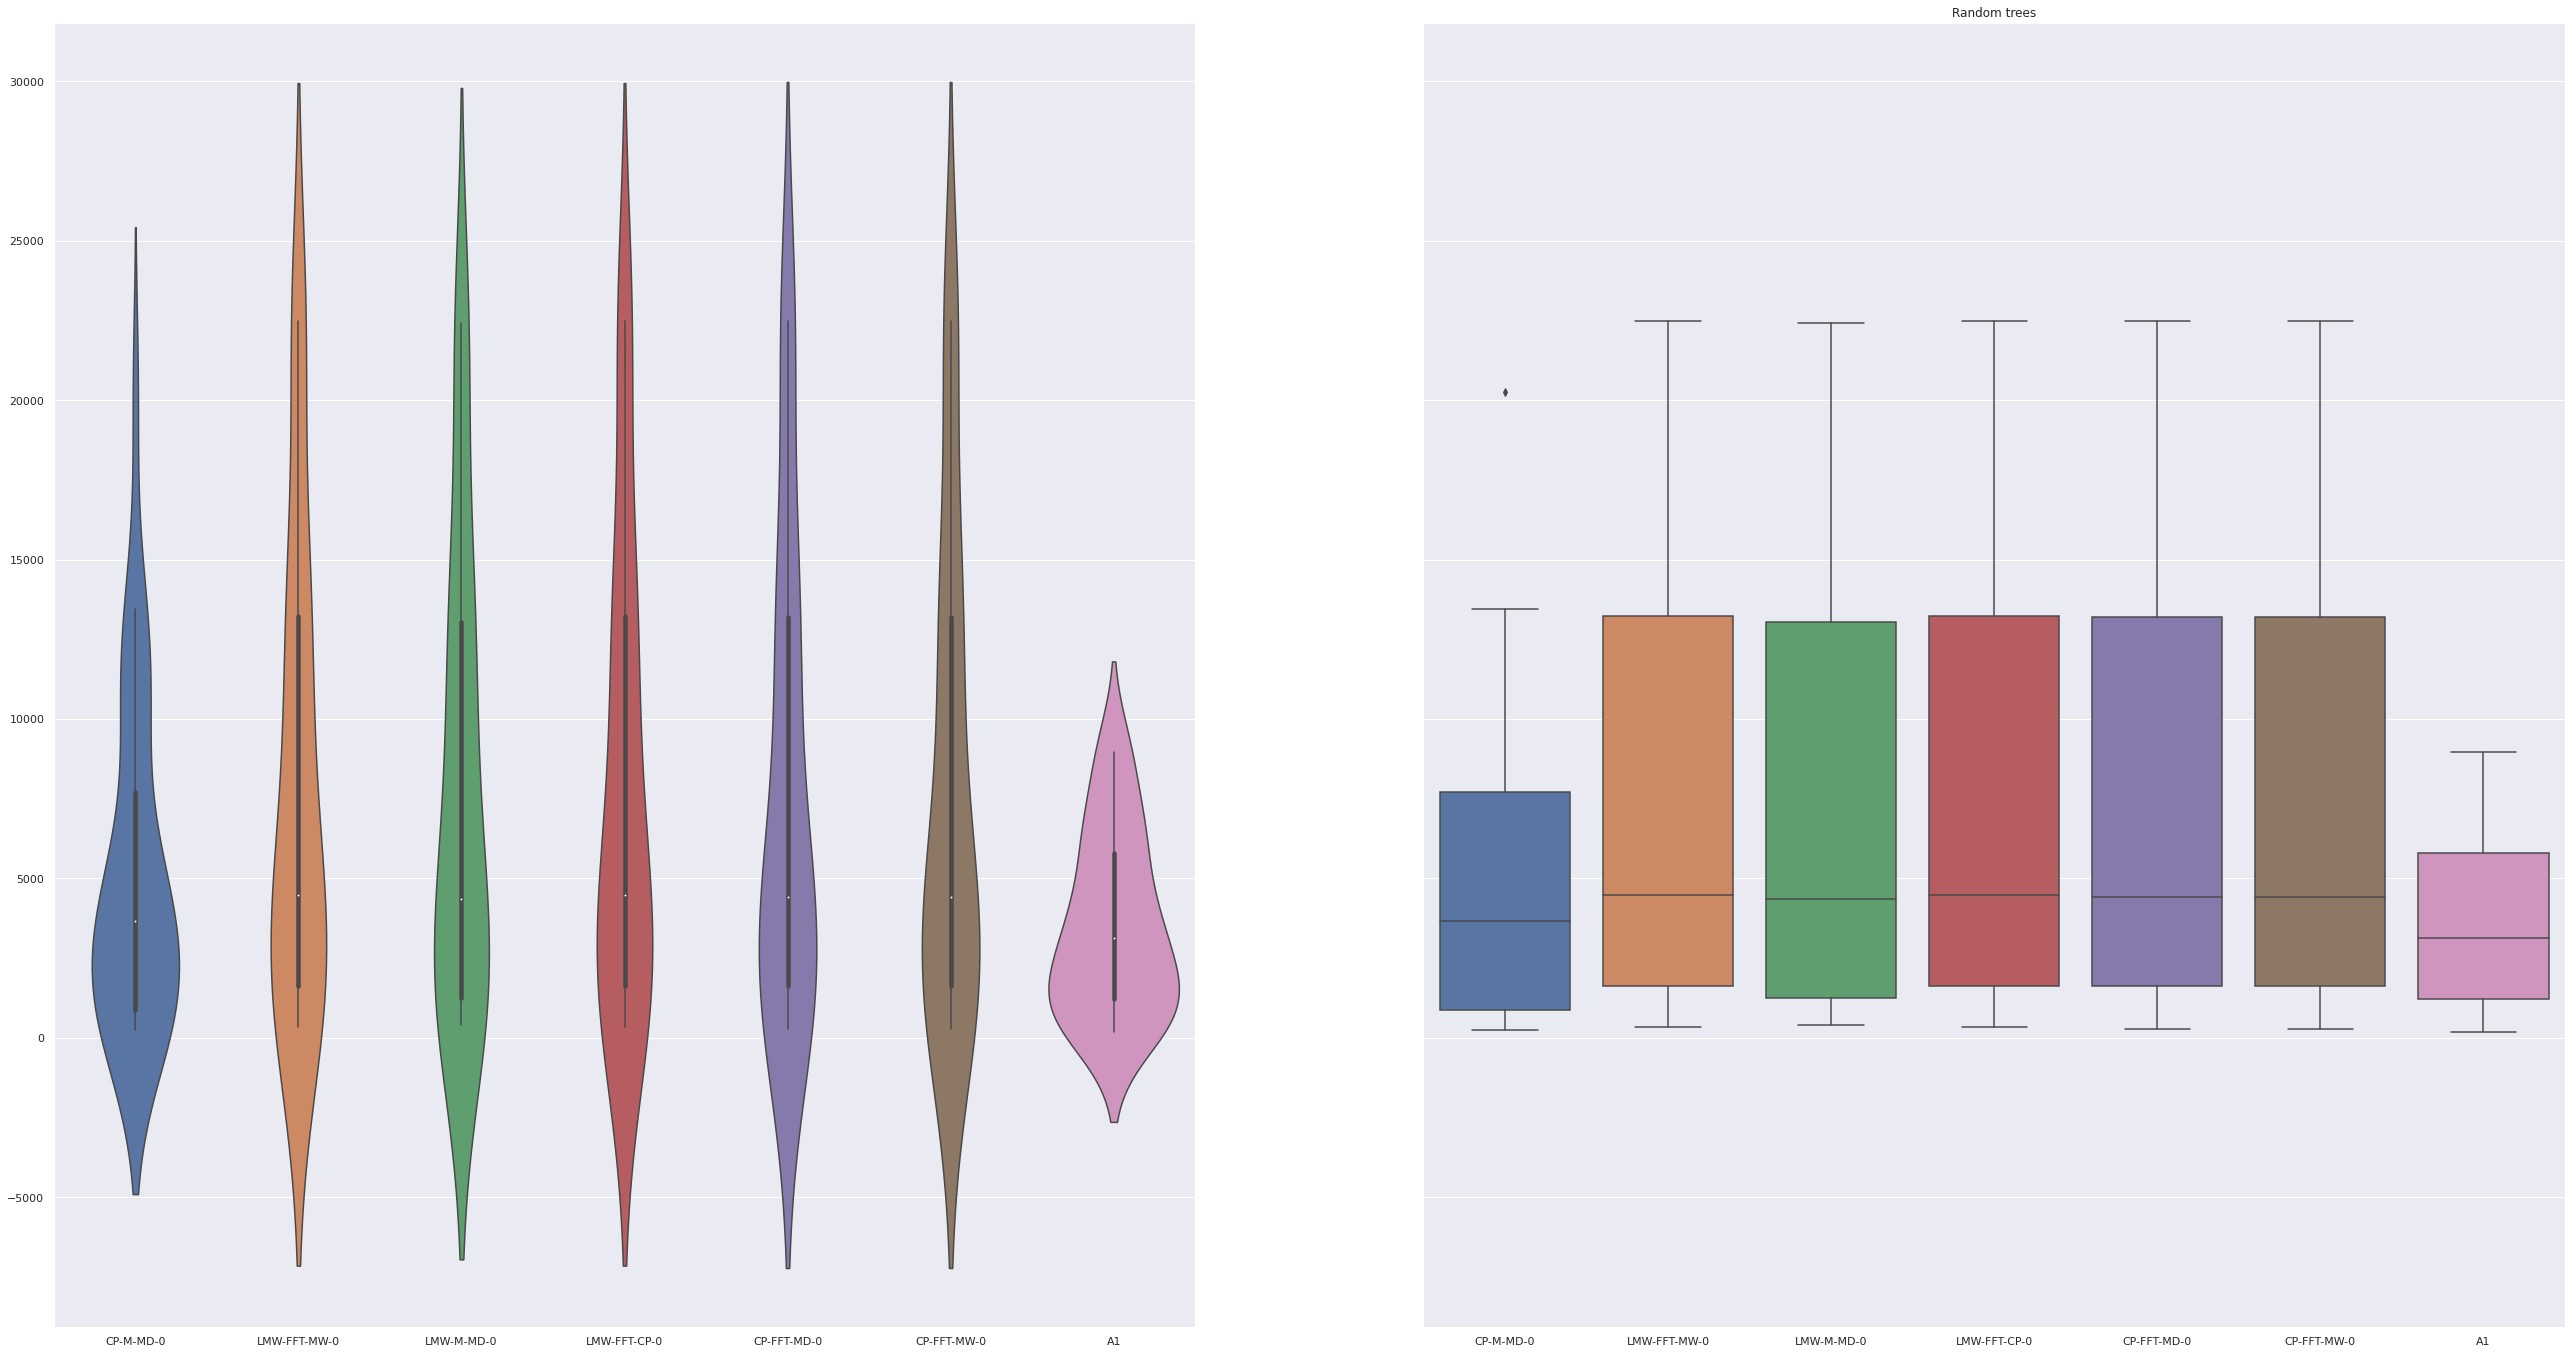

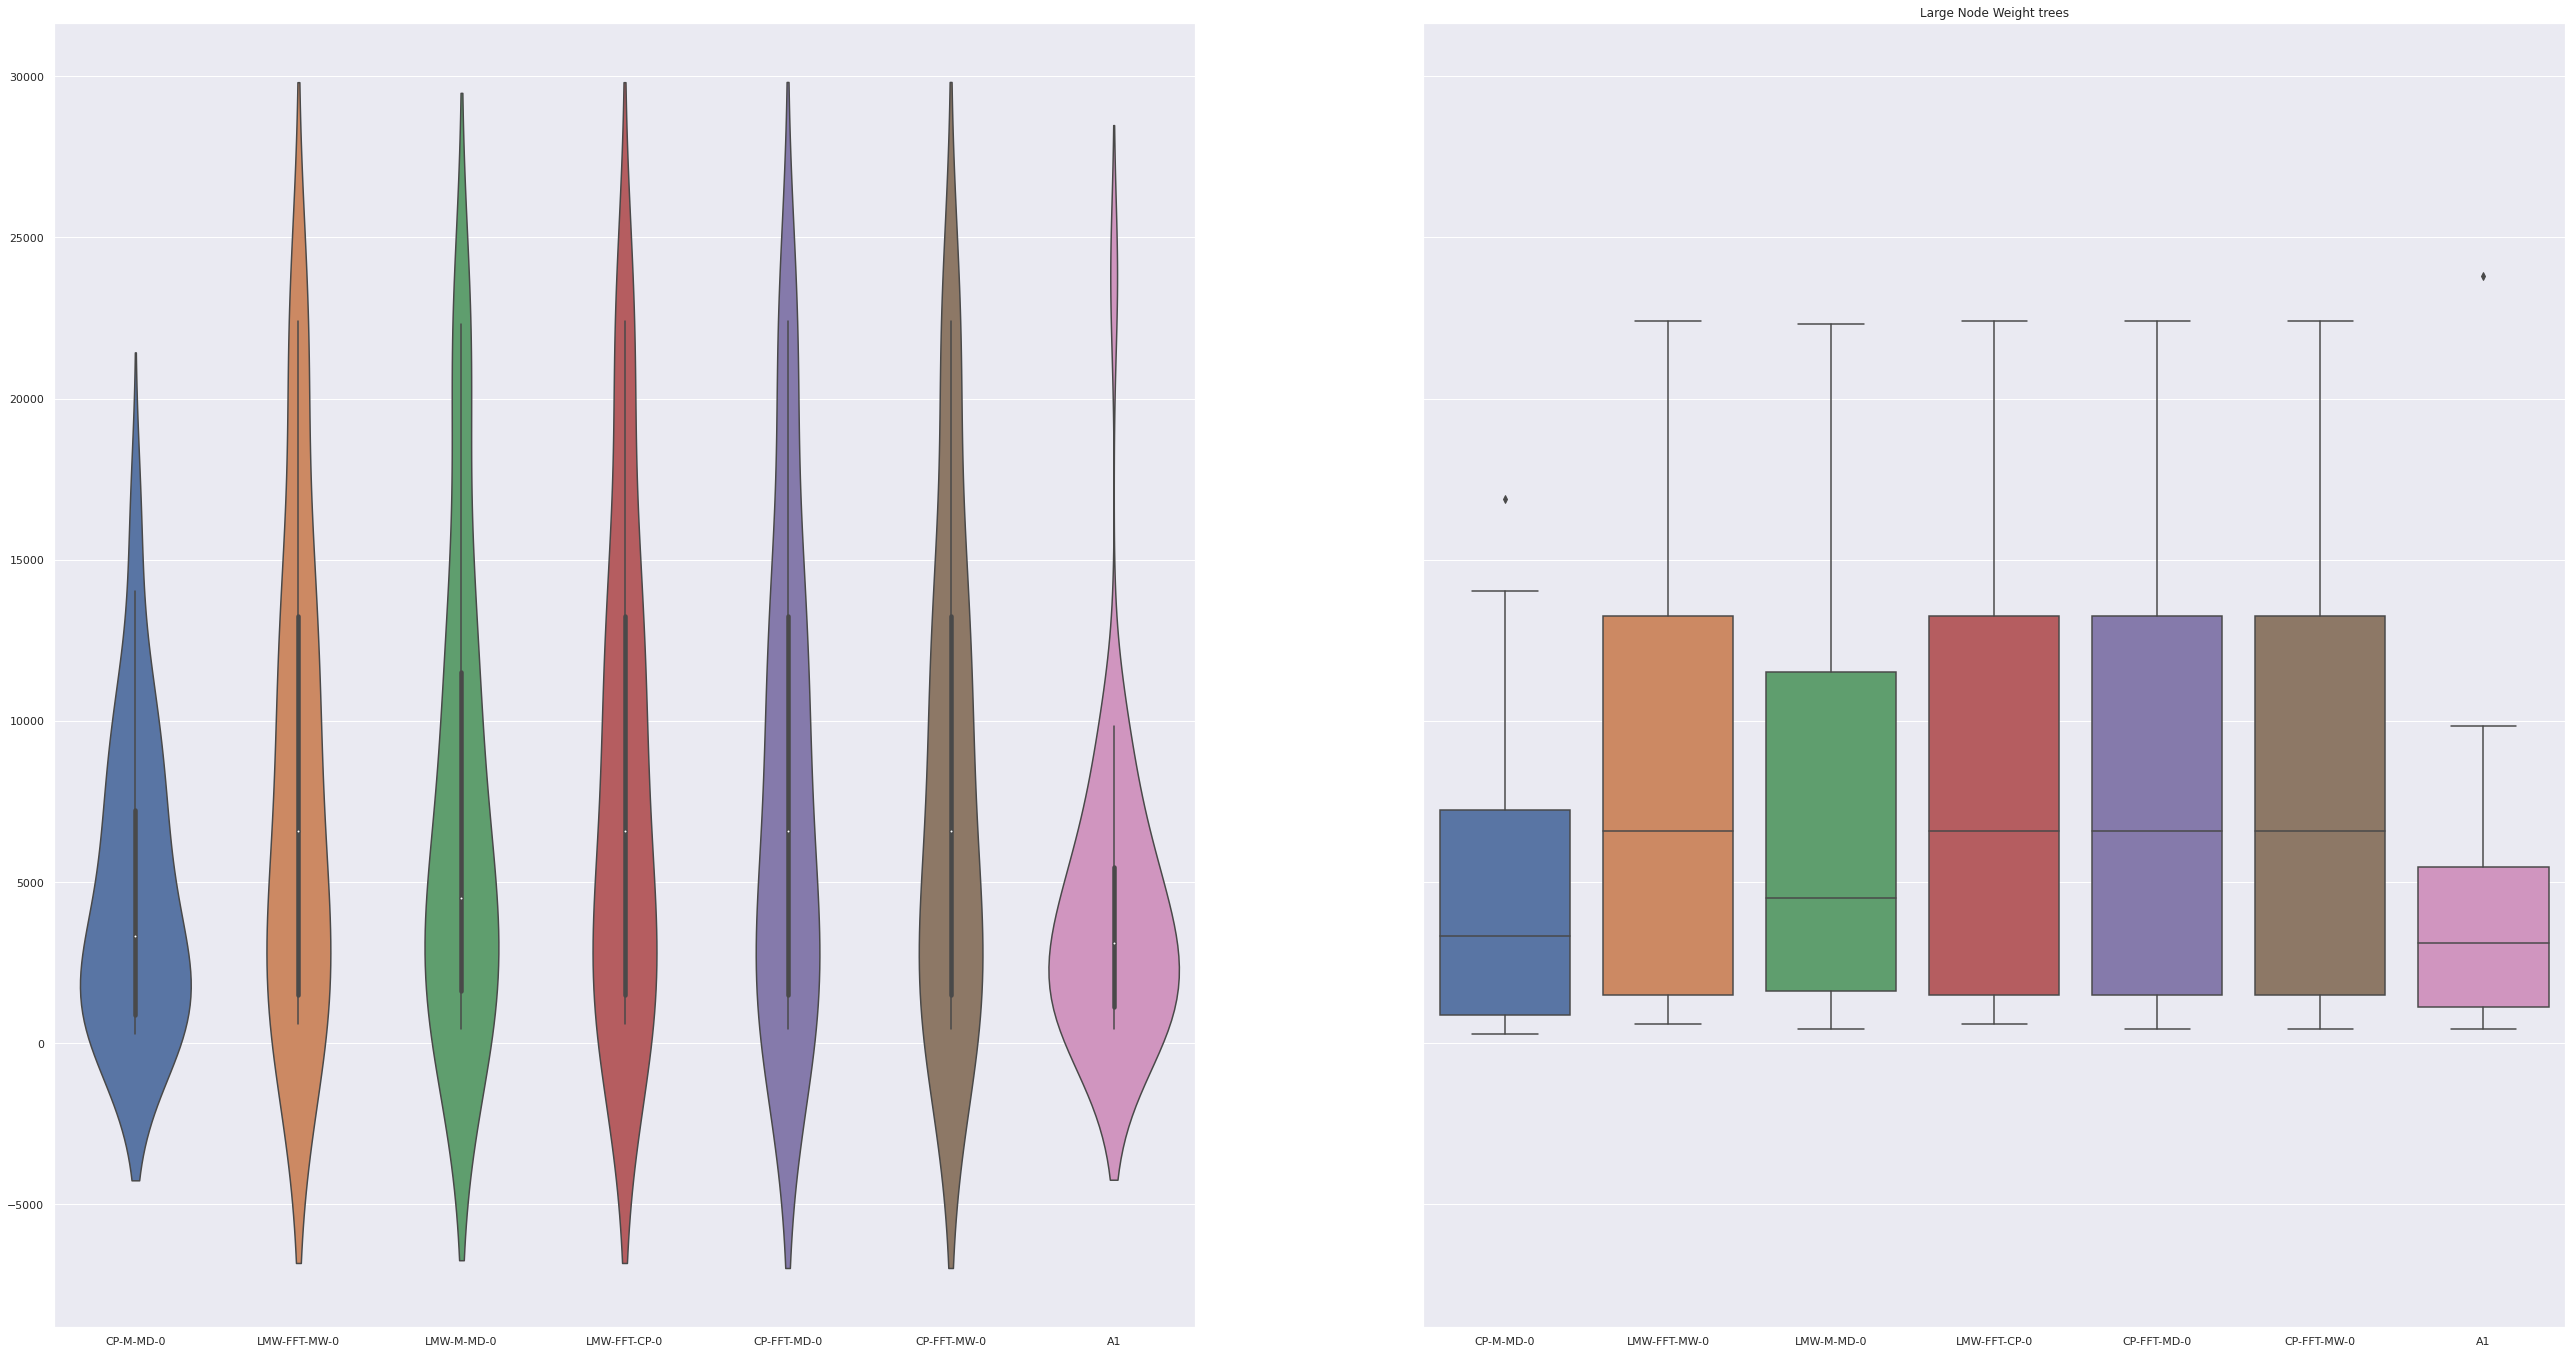

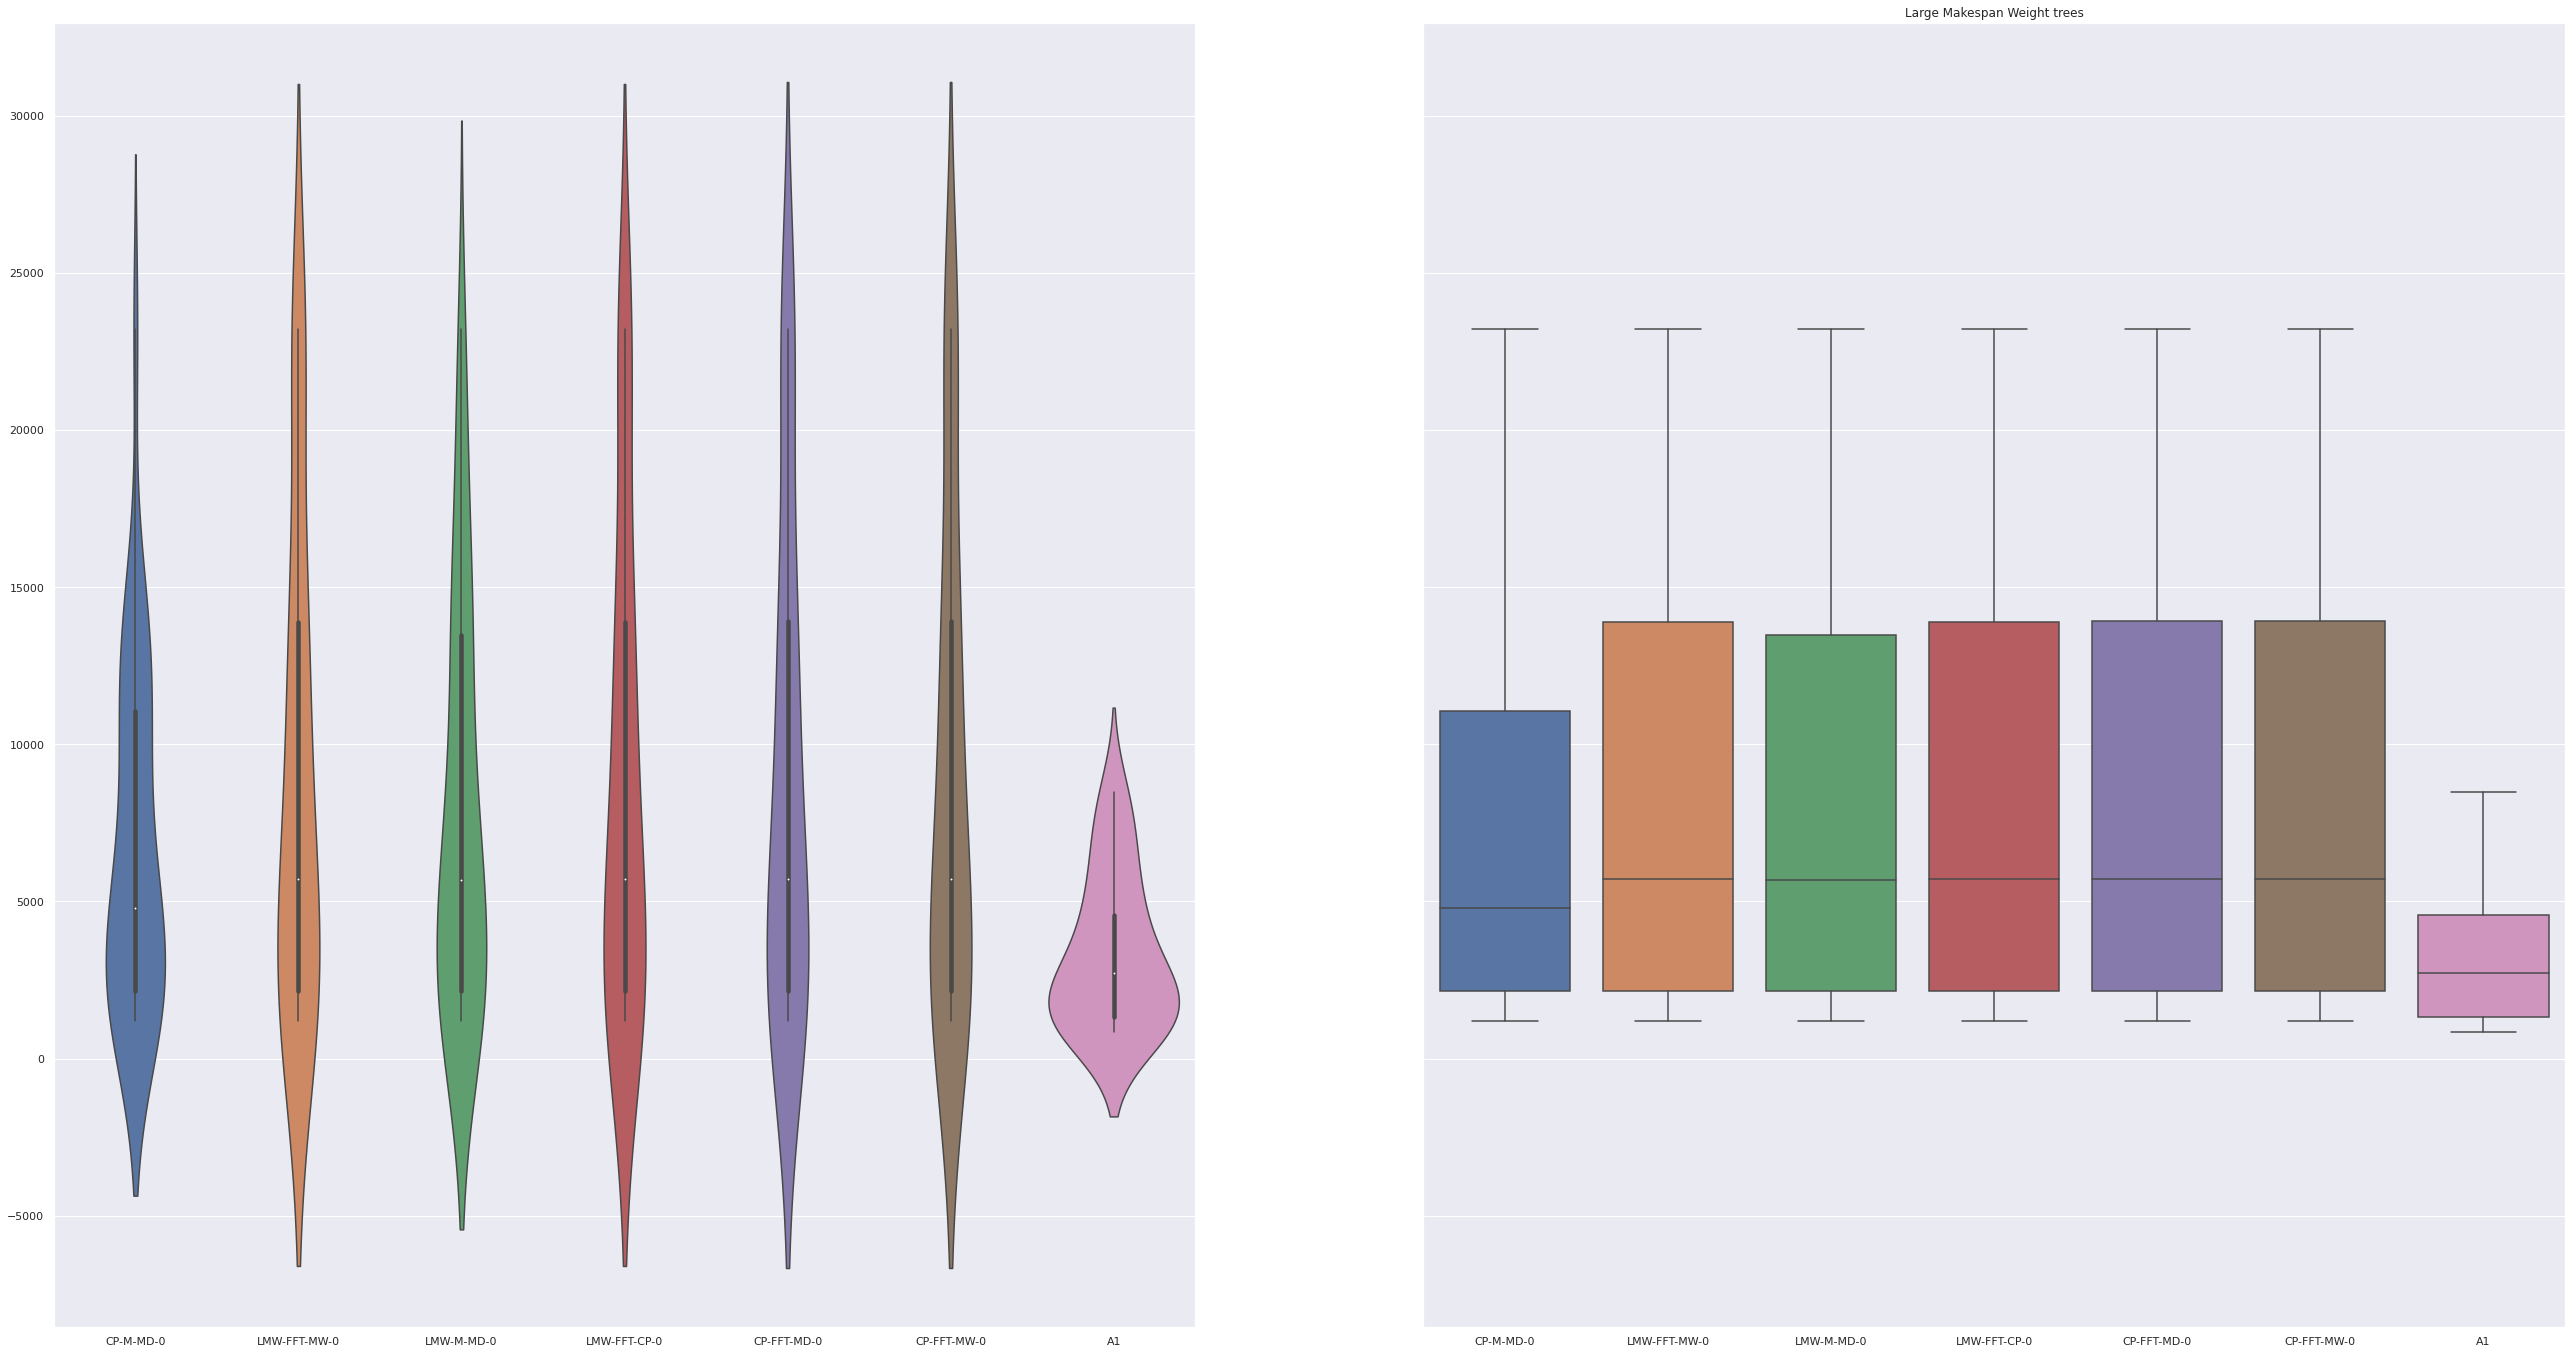

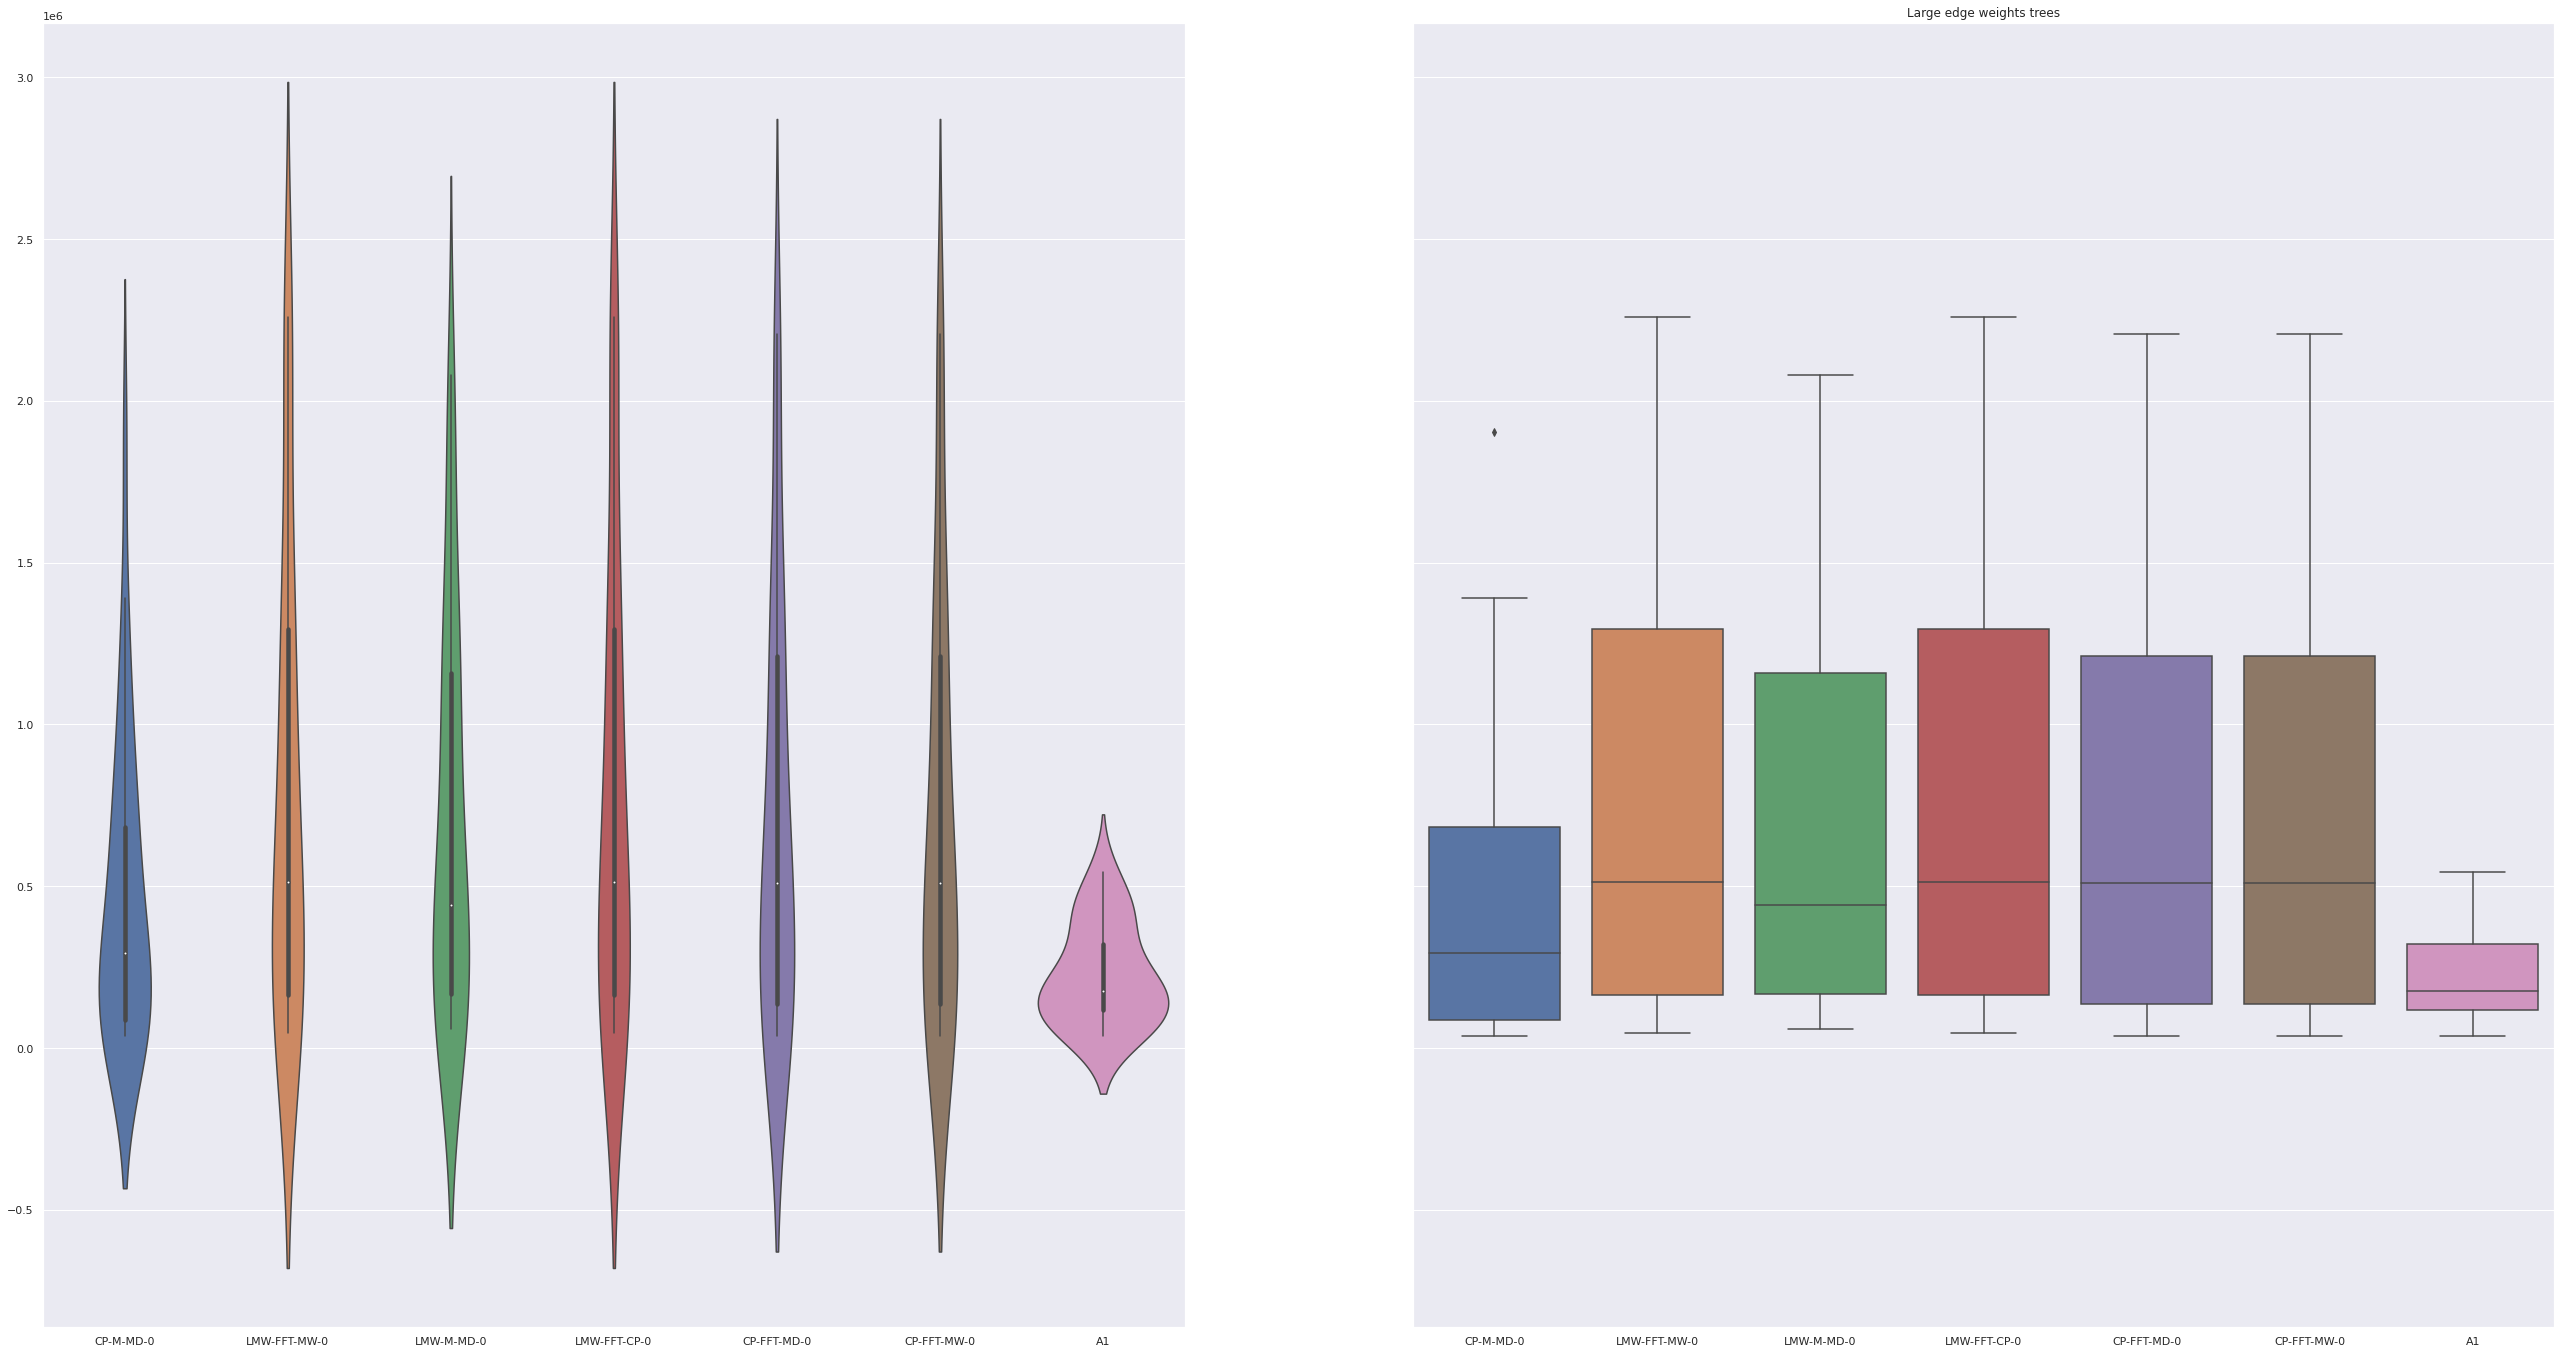

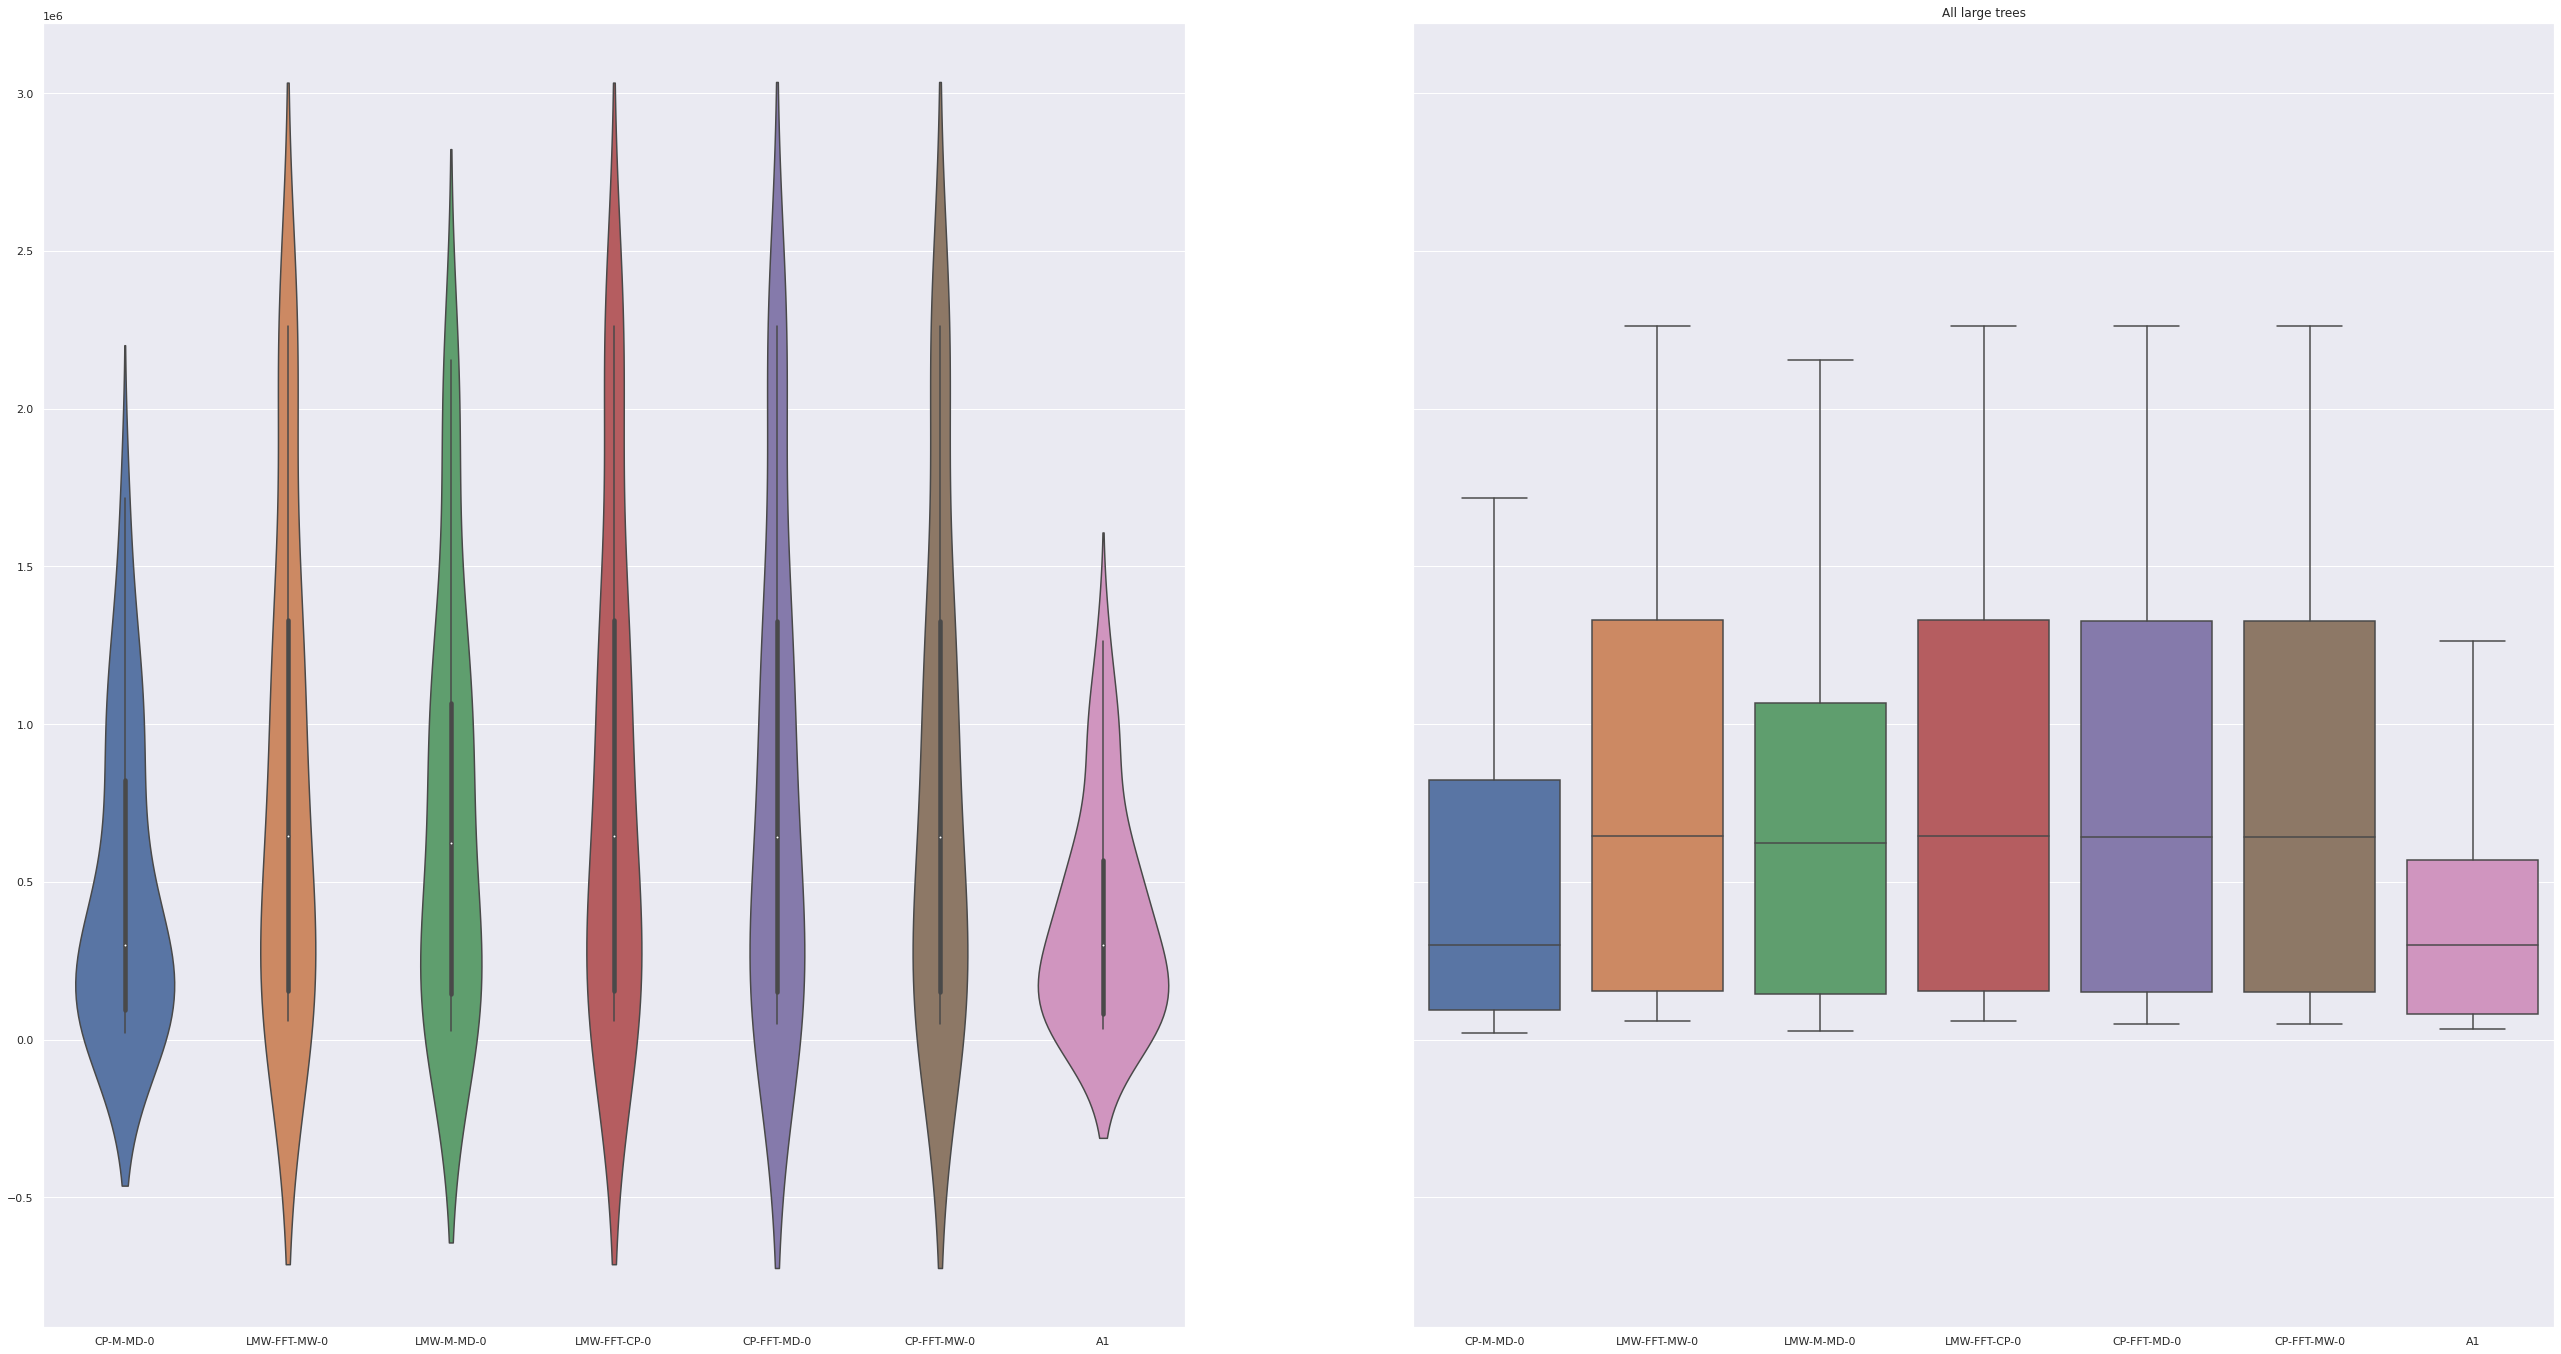

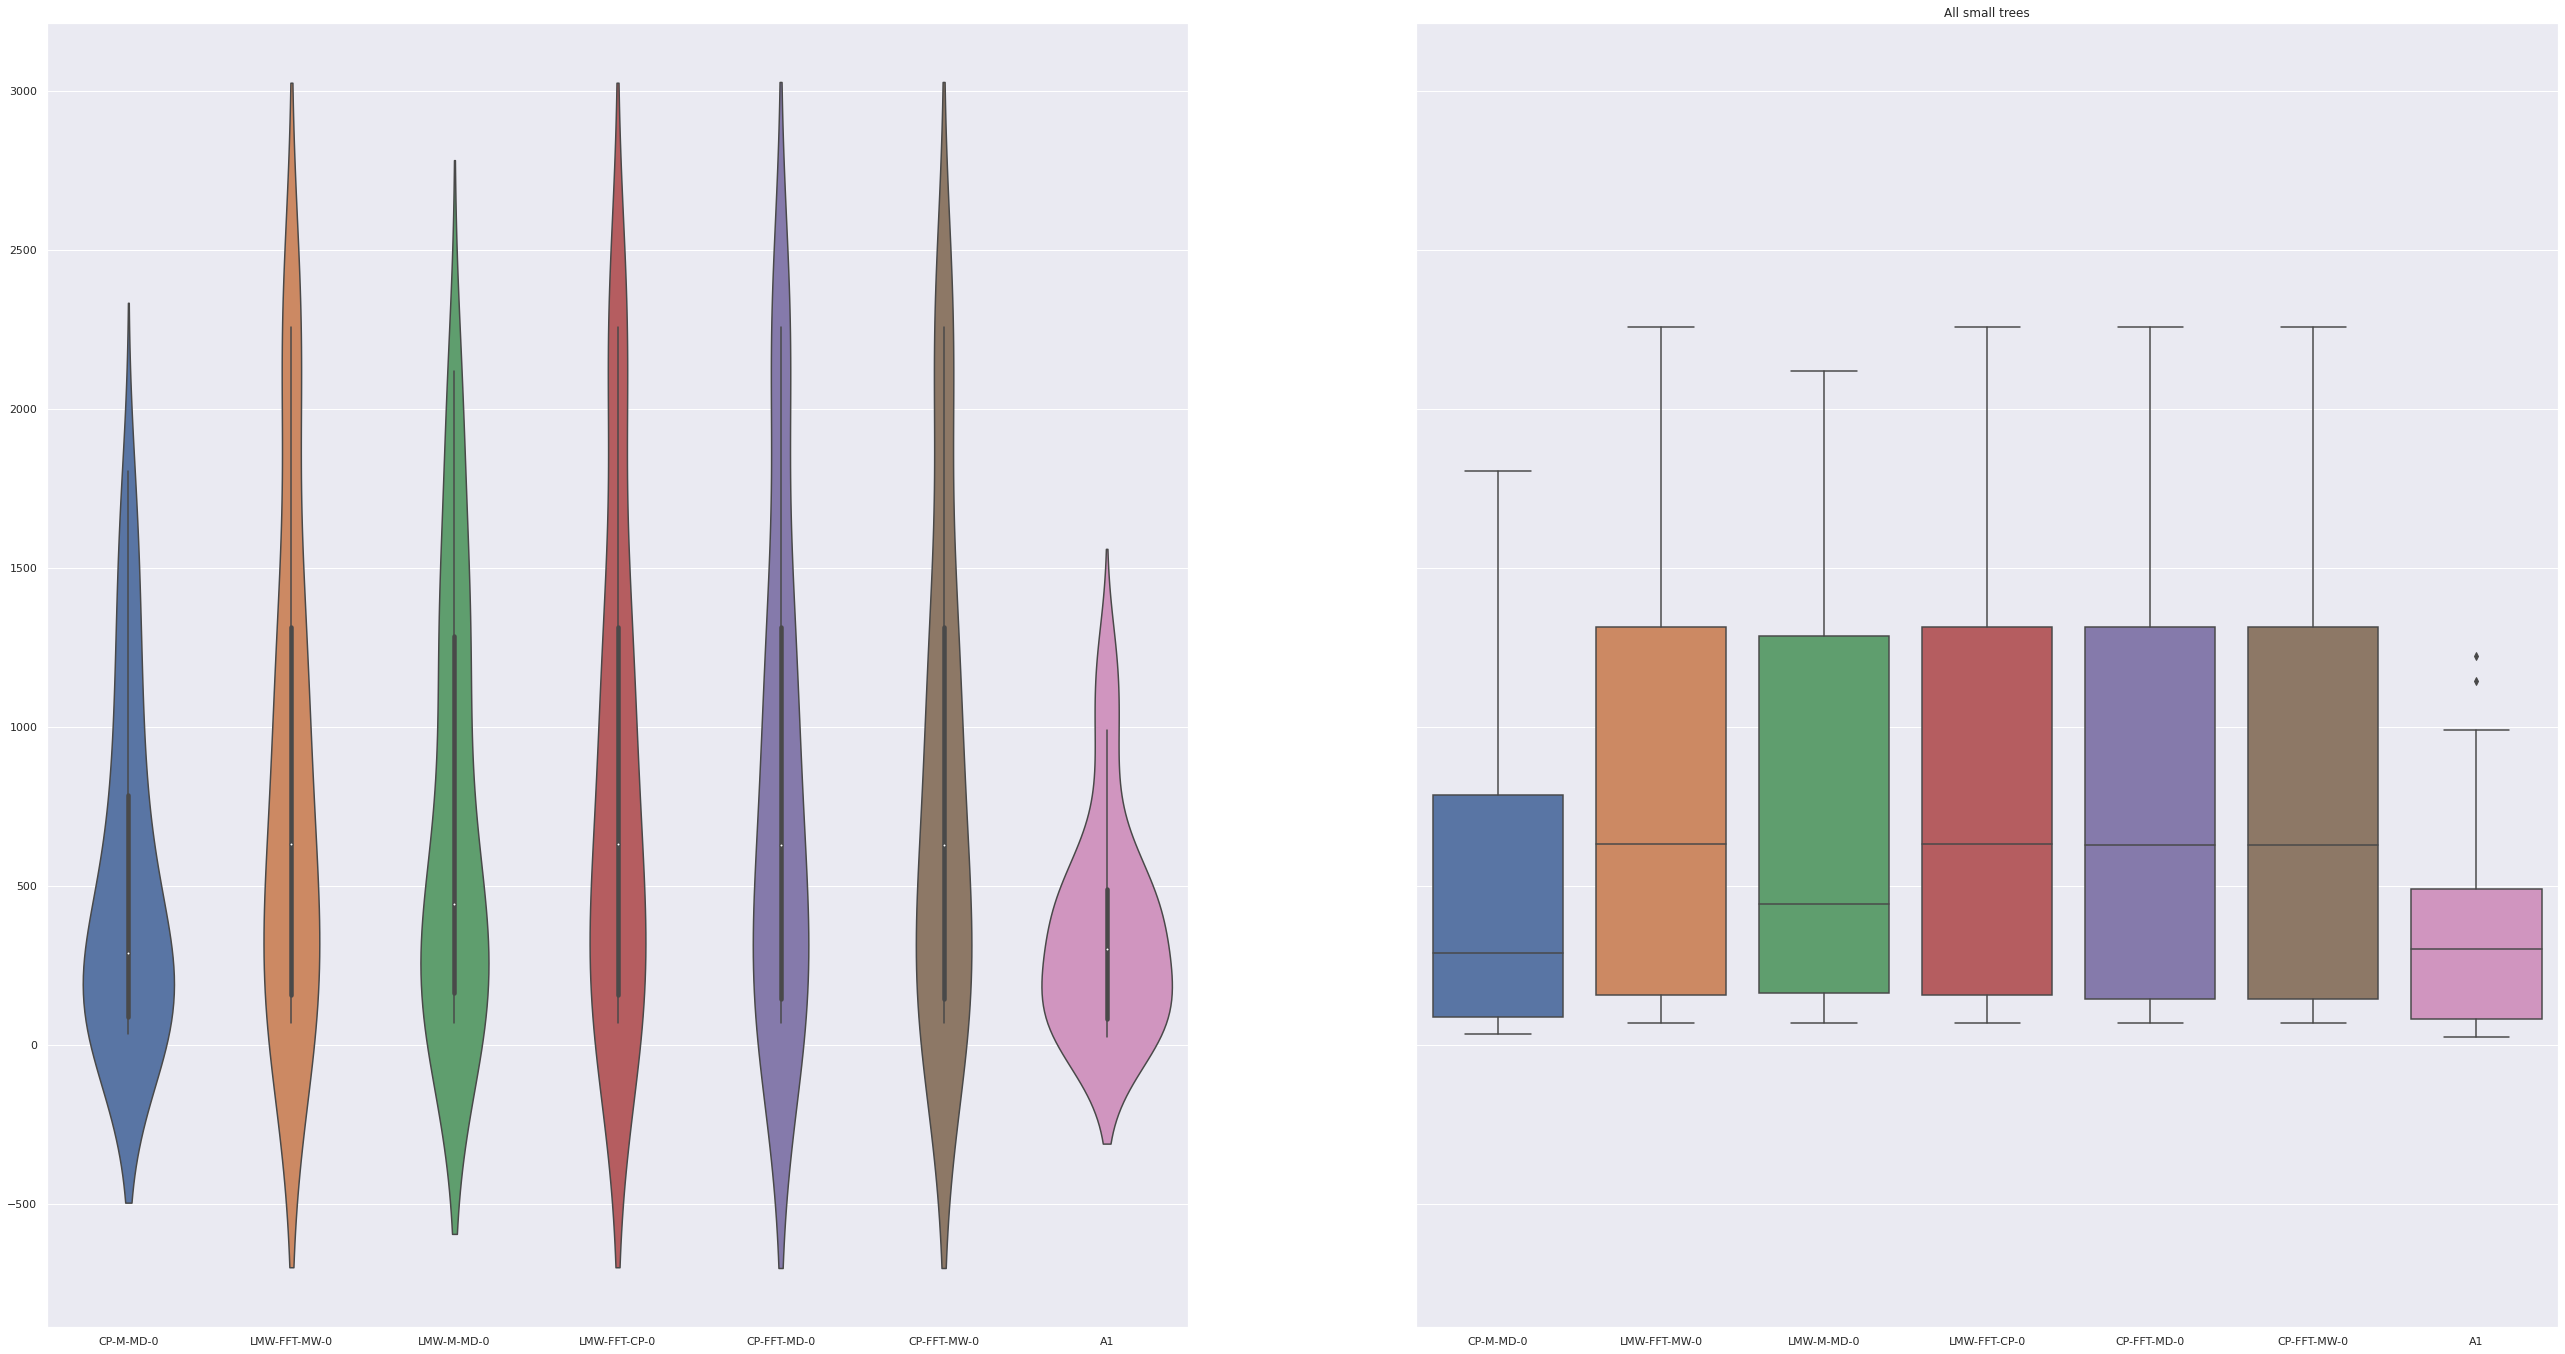

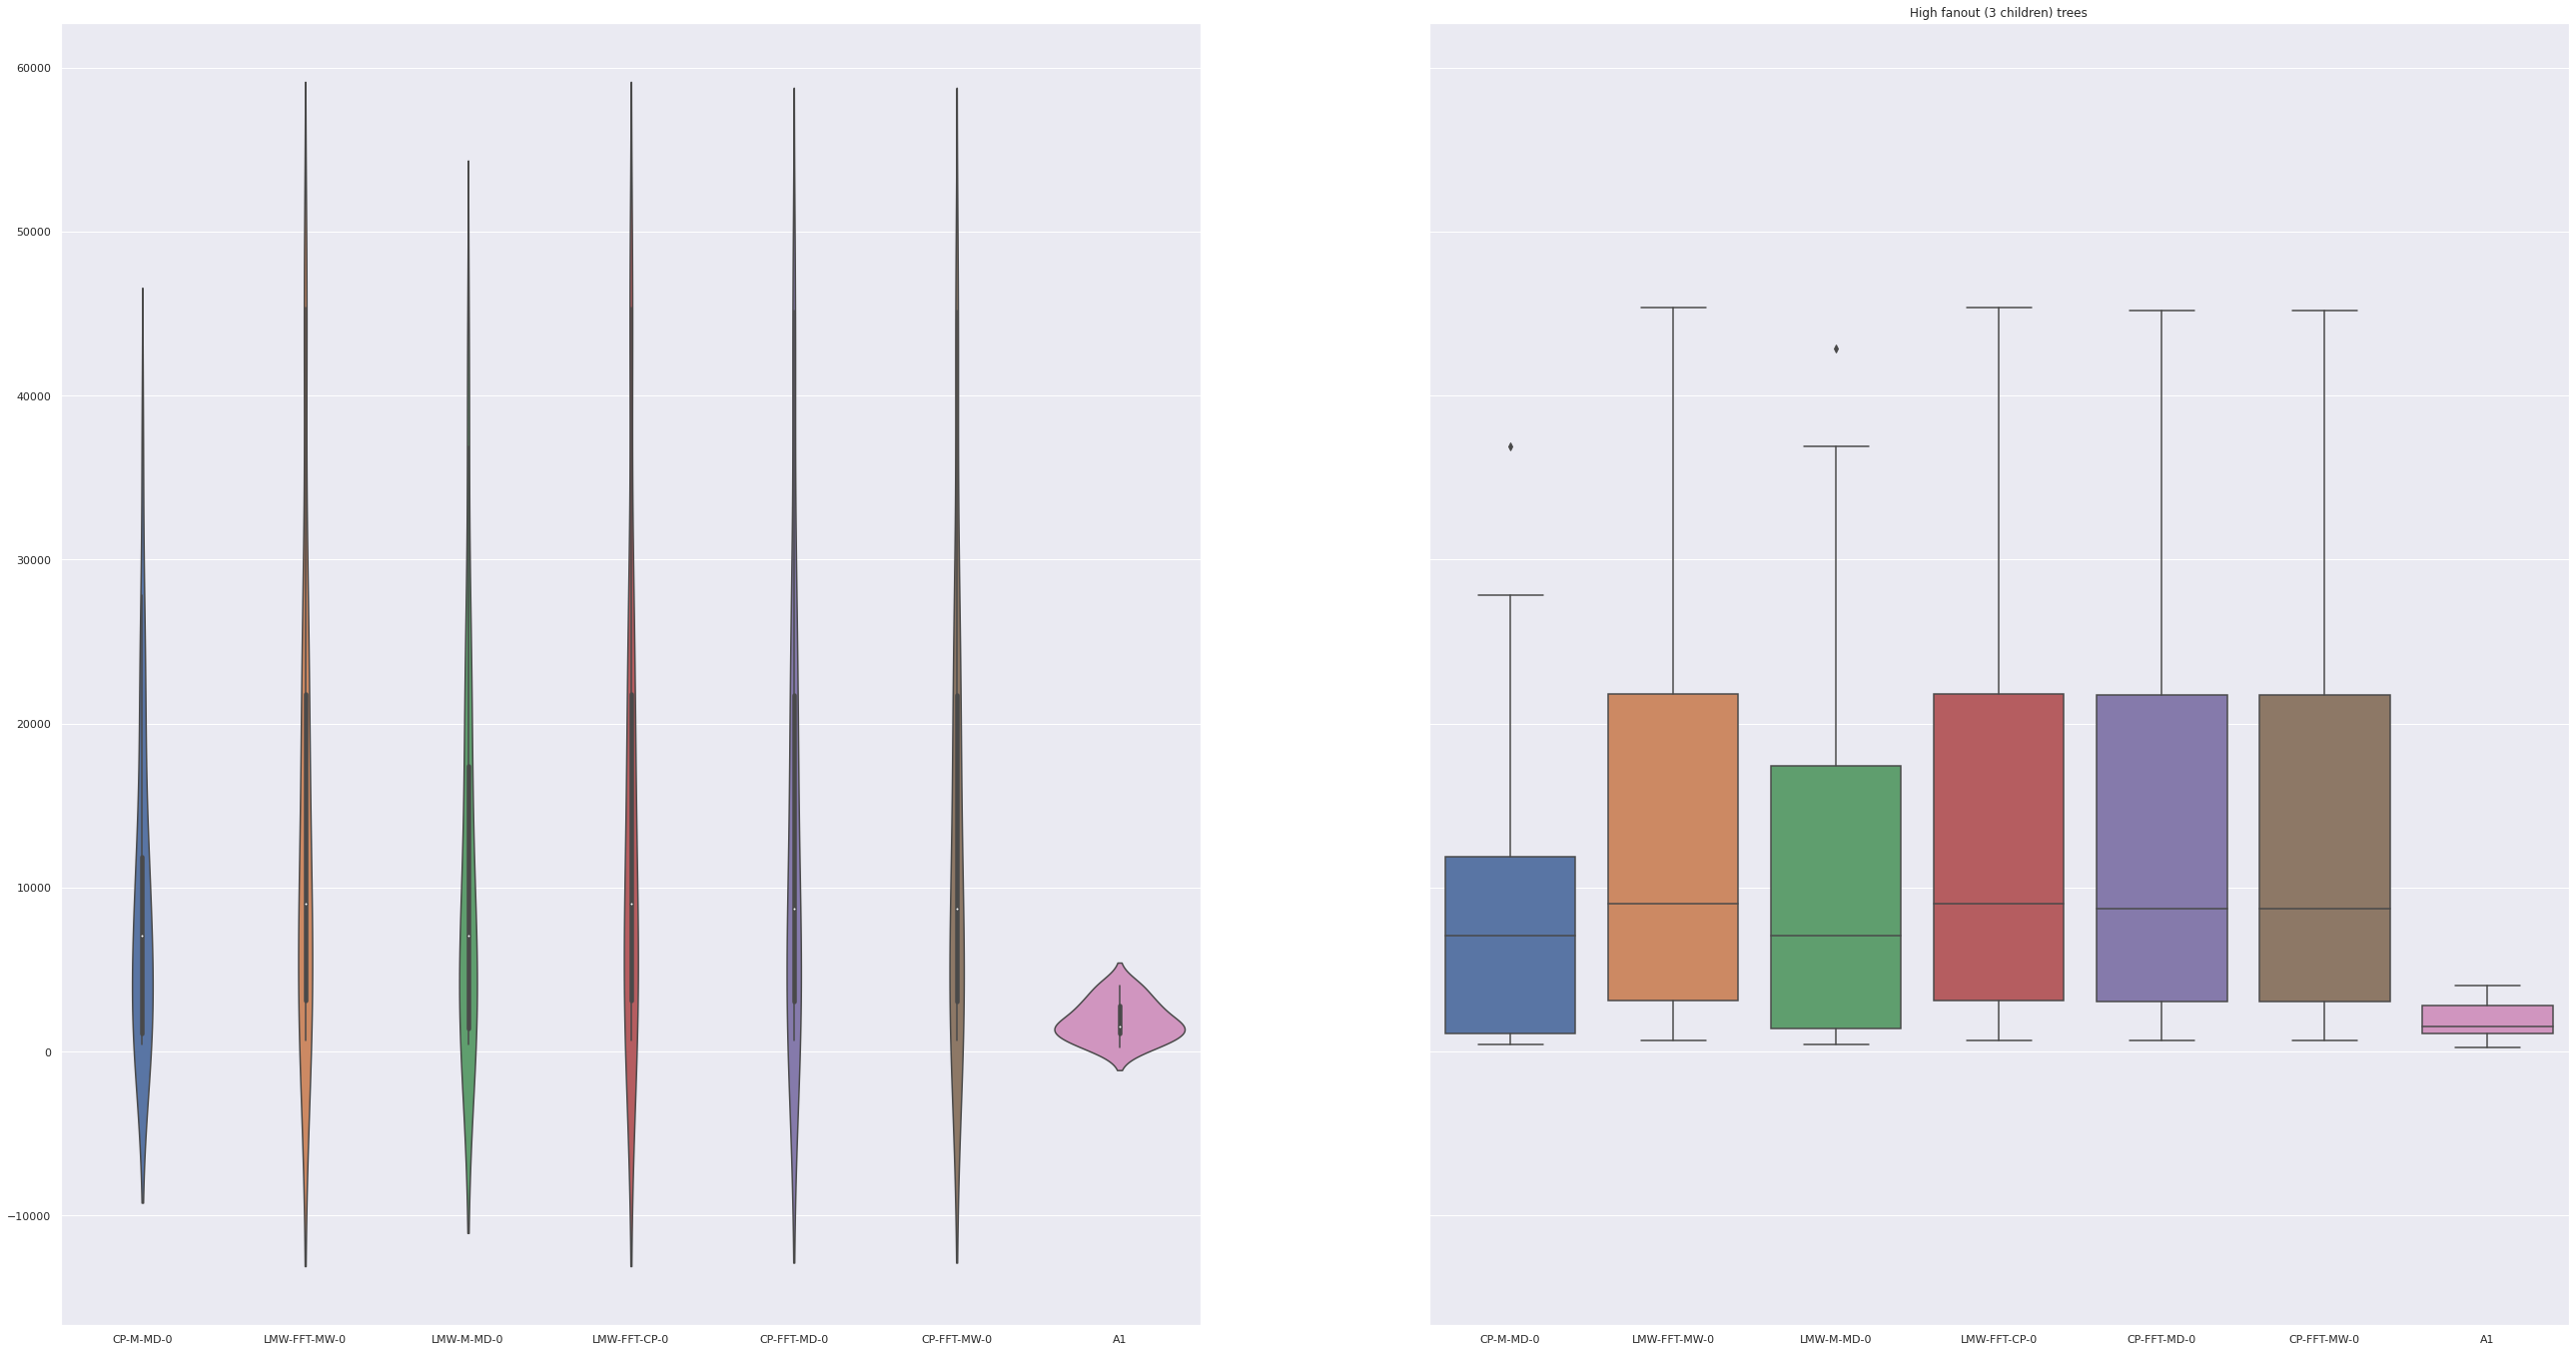

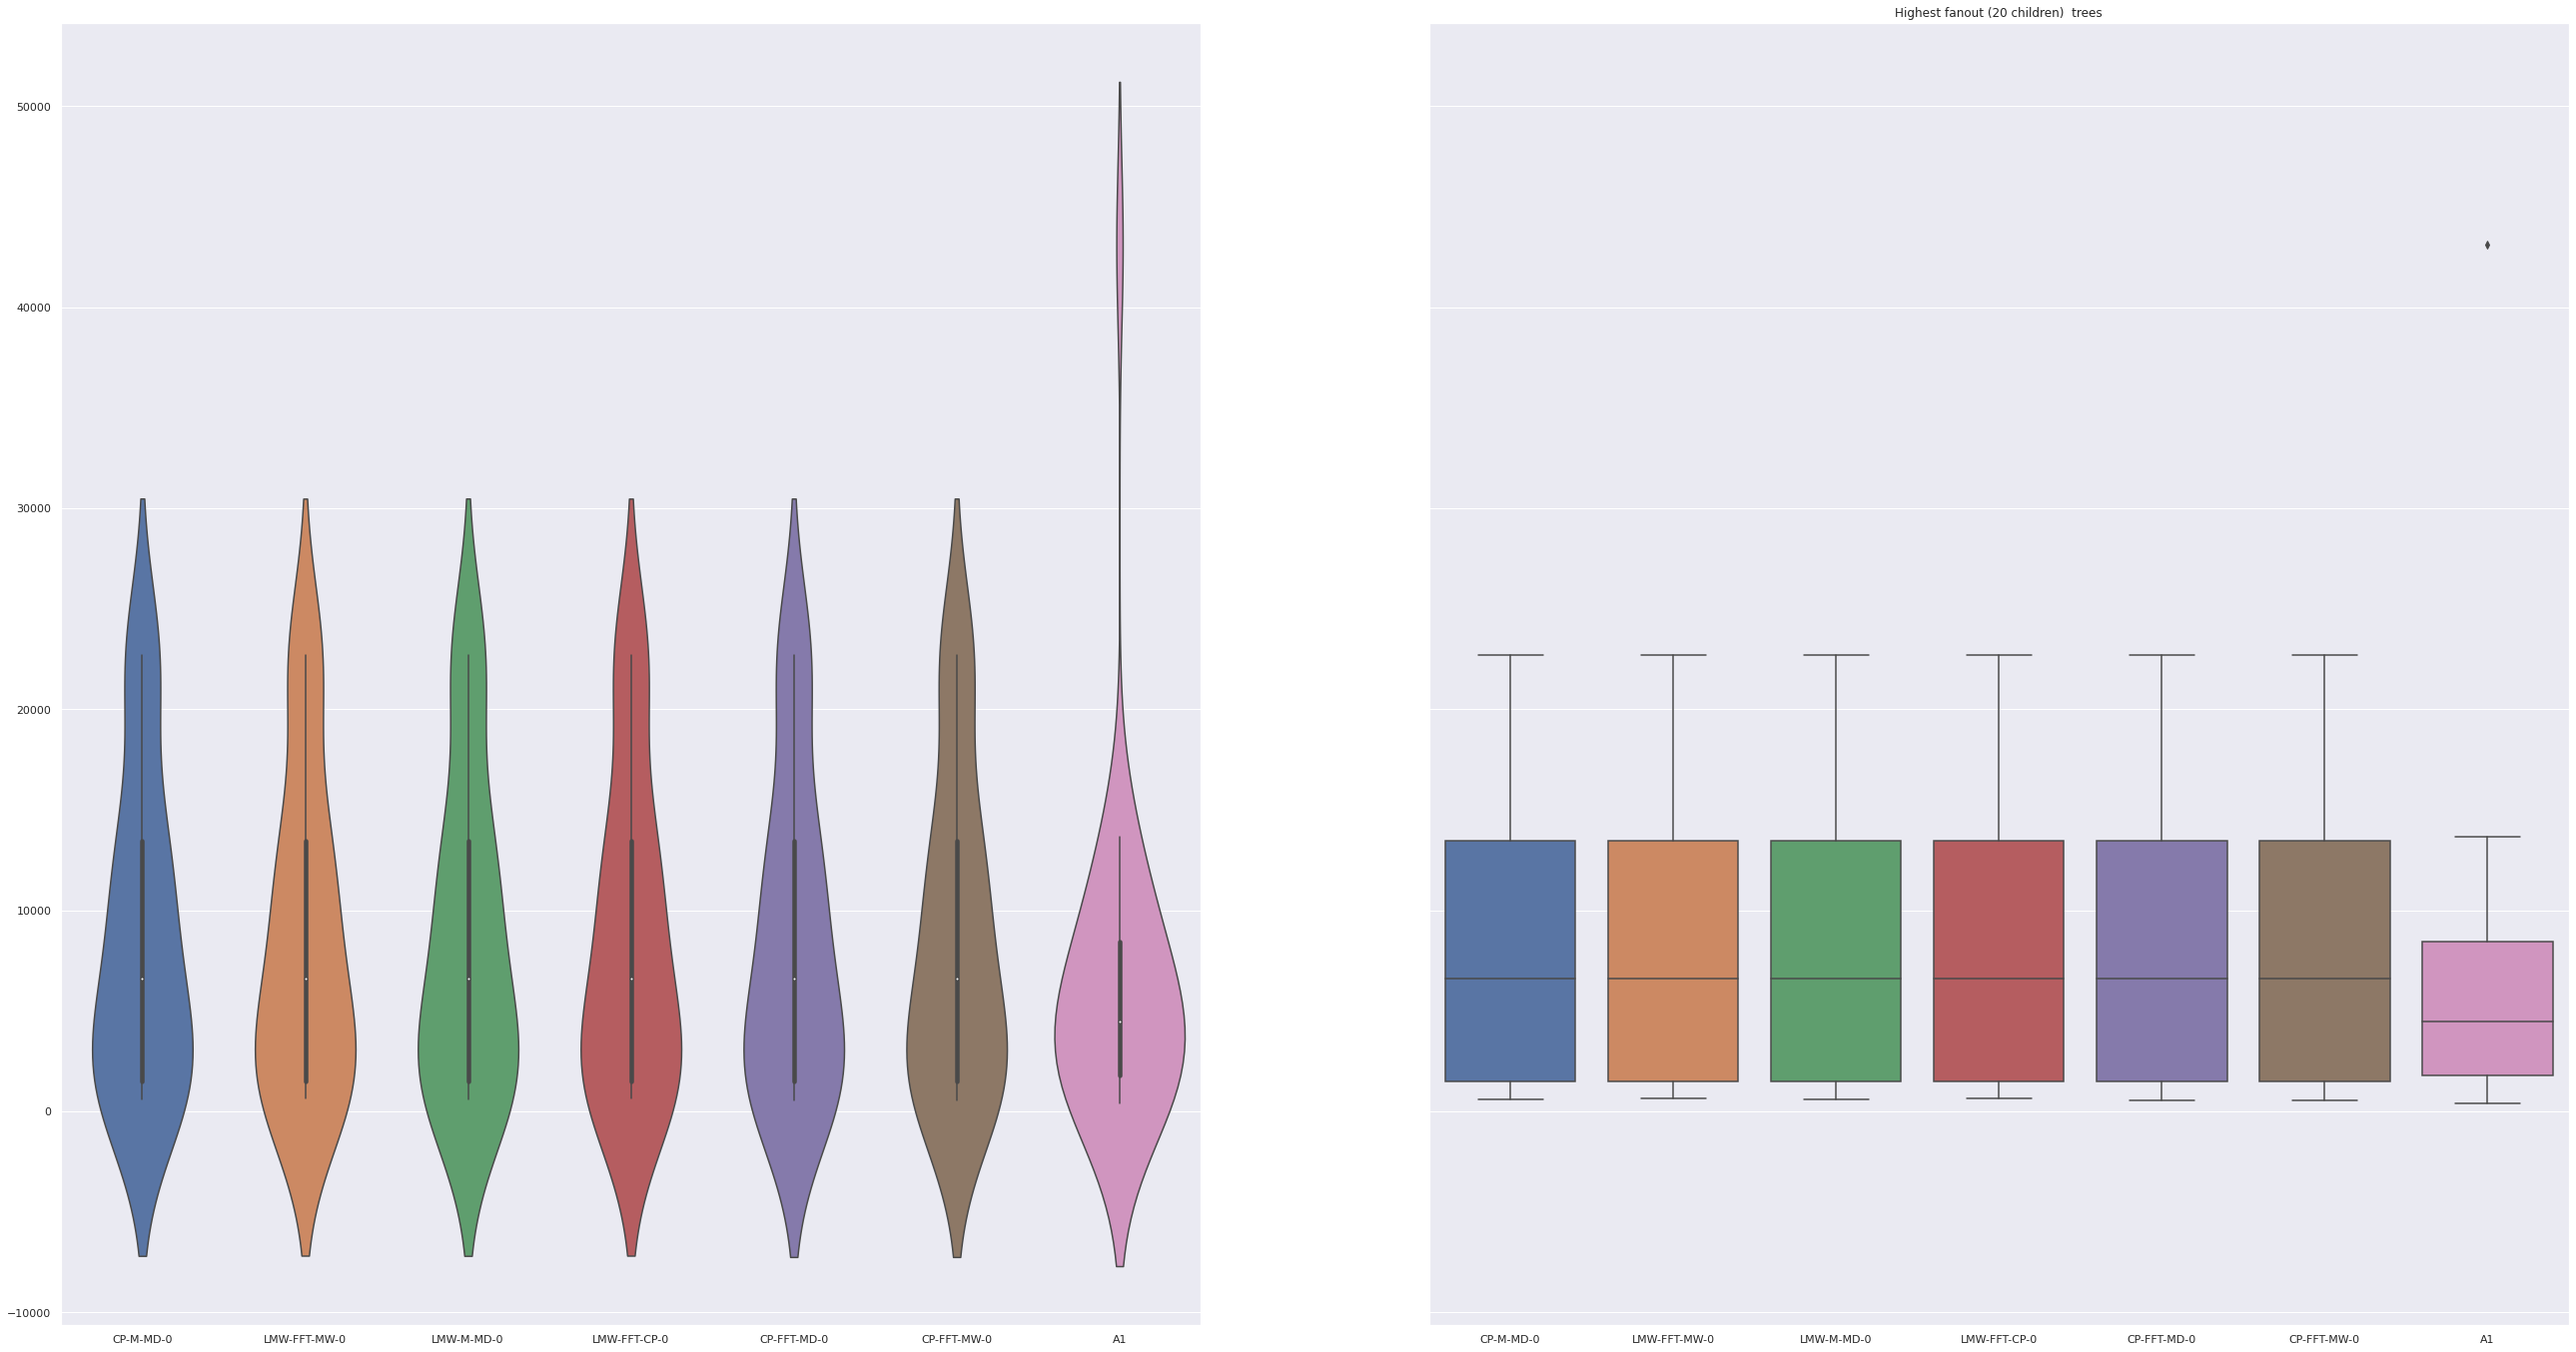

In [62]:
path= "/output-13-10/output"
tree_cats = ['large_node_weights', 'large_makespan_weights', 'all_large', 'trees', 'all_small', '3_children', \
            '20_children', 'large_edge_weights', 'random']
treesMsAcross, randomMsAcross, NodeMsAcross, MSMsAcross,LargeMsAcross, SmallMsAcross, Ch3MsAcross, \
    Ch20MsAcross, EdgeMsAcross = readColumnAcrossExperiments(path, 'makespan')

drawAllCategories(treesMsAcross, randomMsAcross, NodeMsAcross, MSMsAcross,LargeMsAcross, SmallMsAcross,\
                   Ch3MsAcross, Ch20MsAcross, EdgeMsAcross)



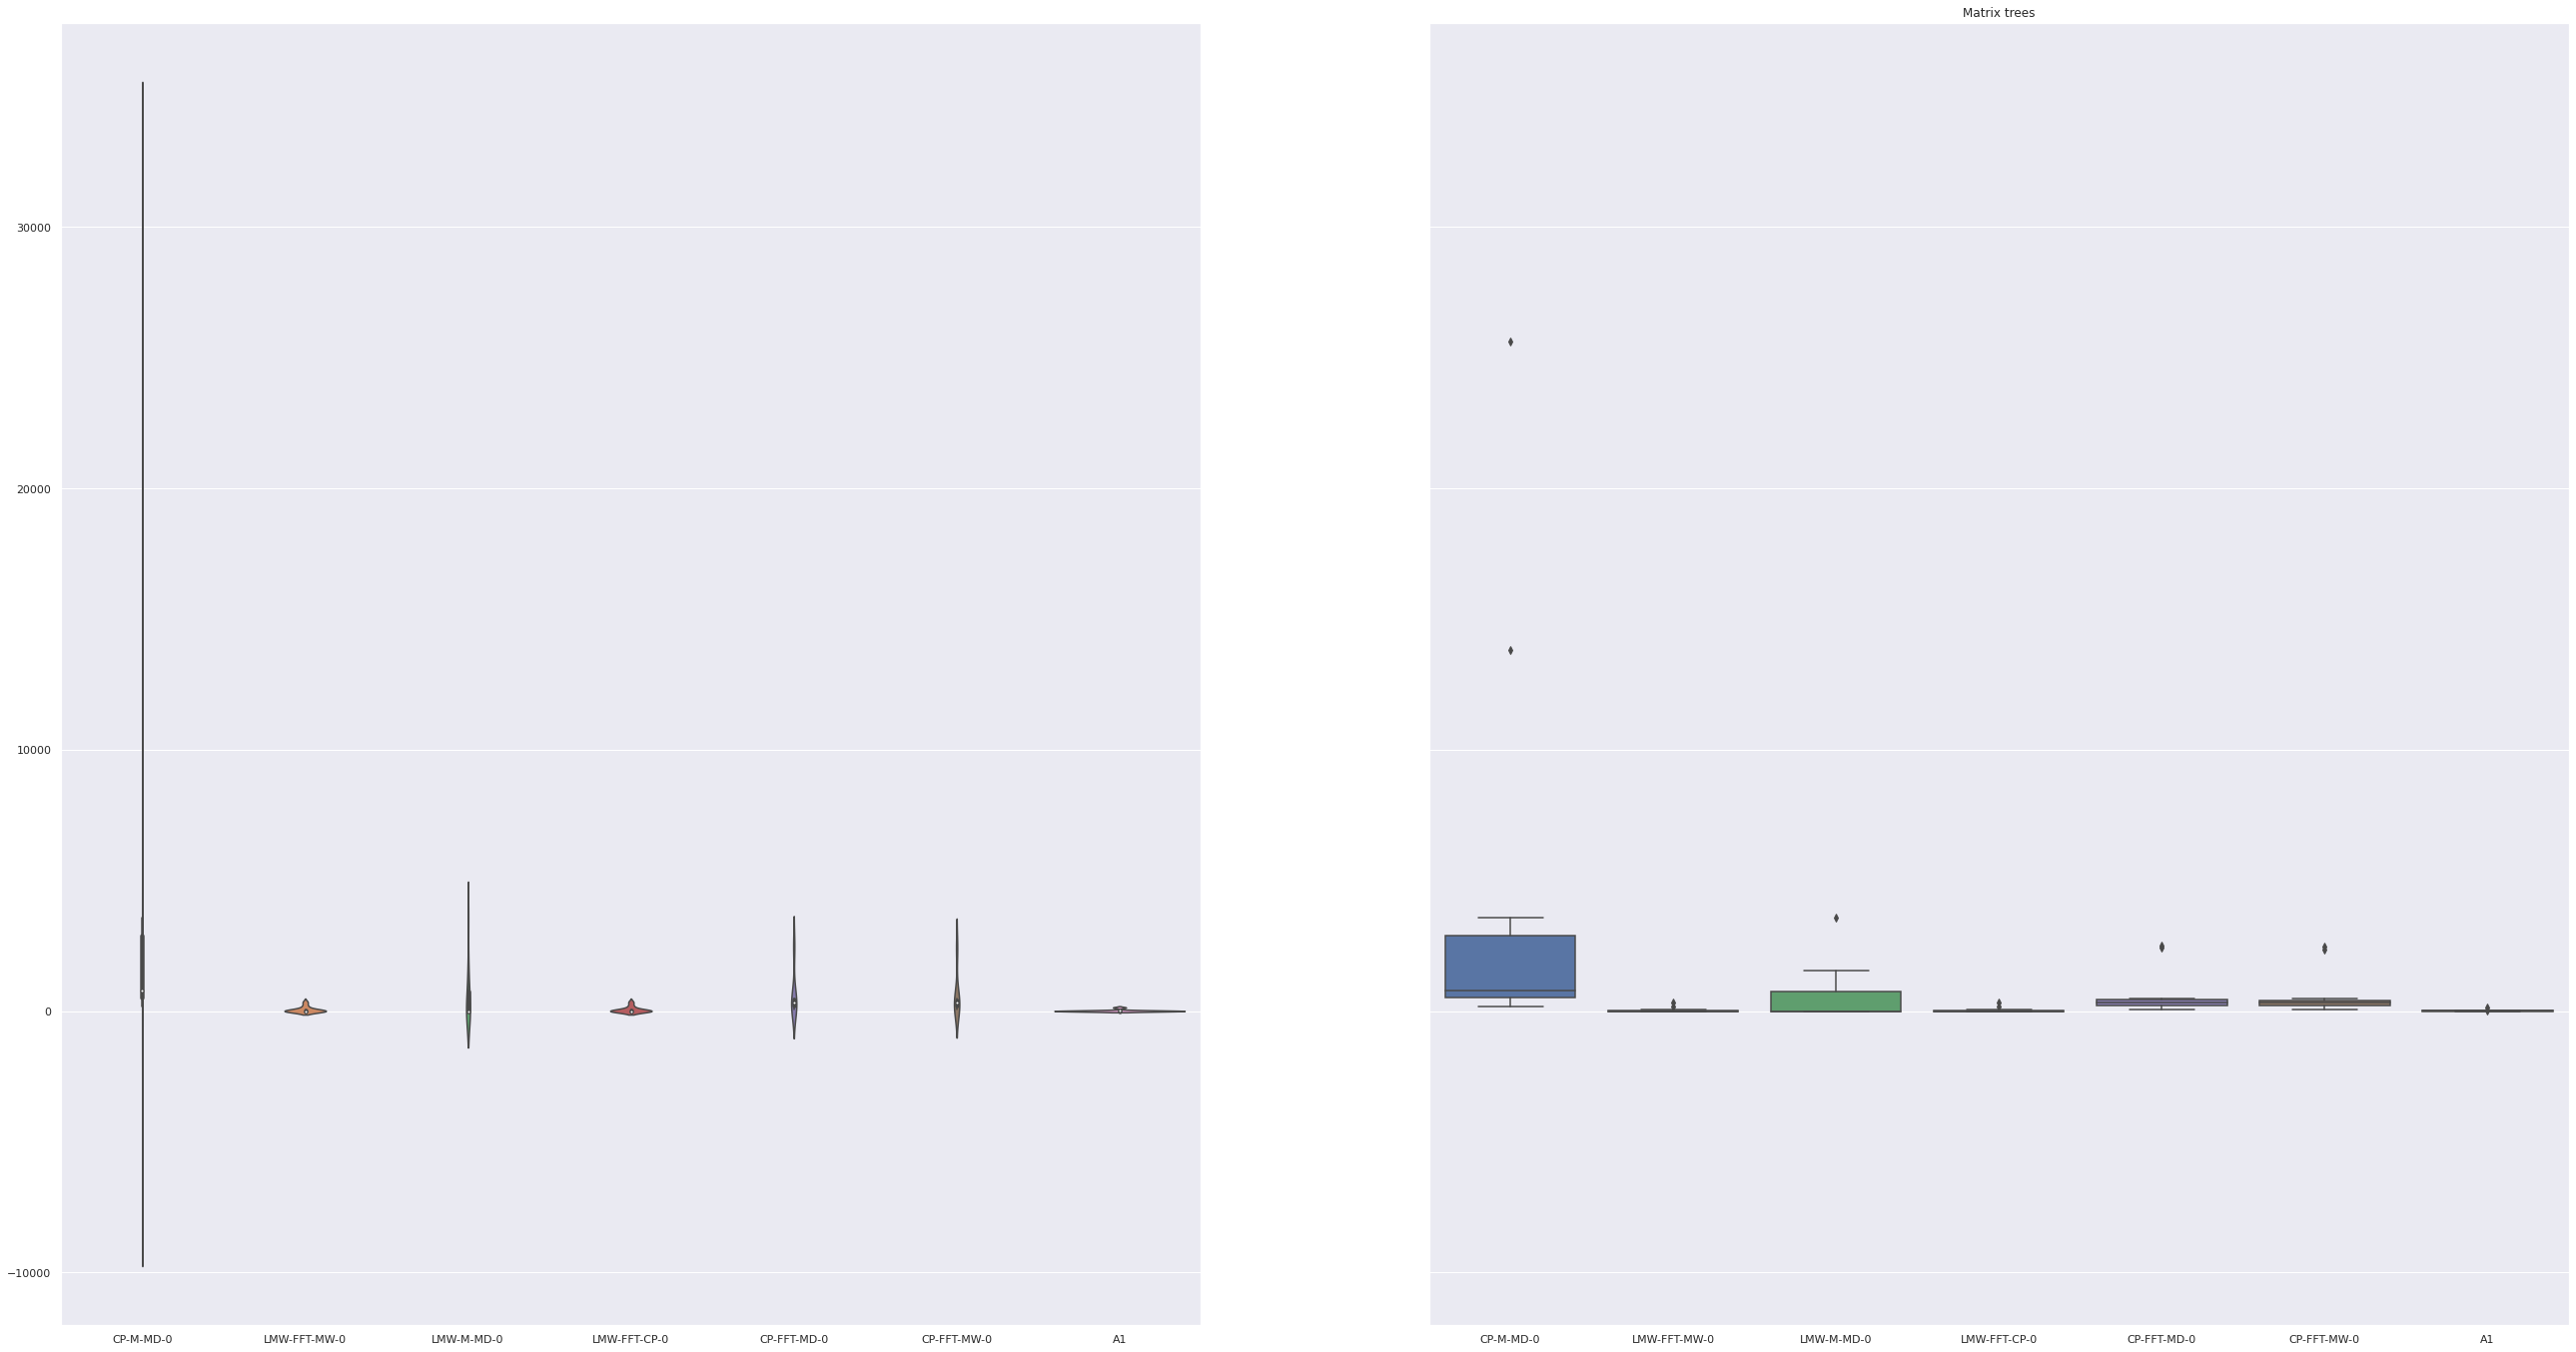

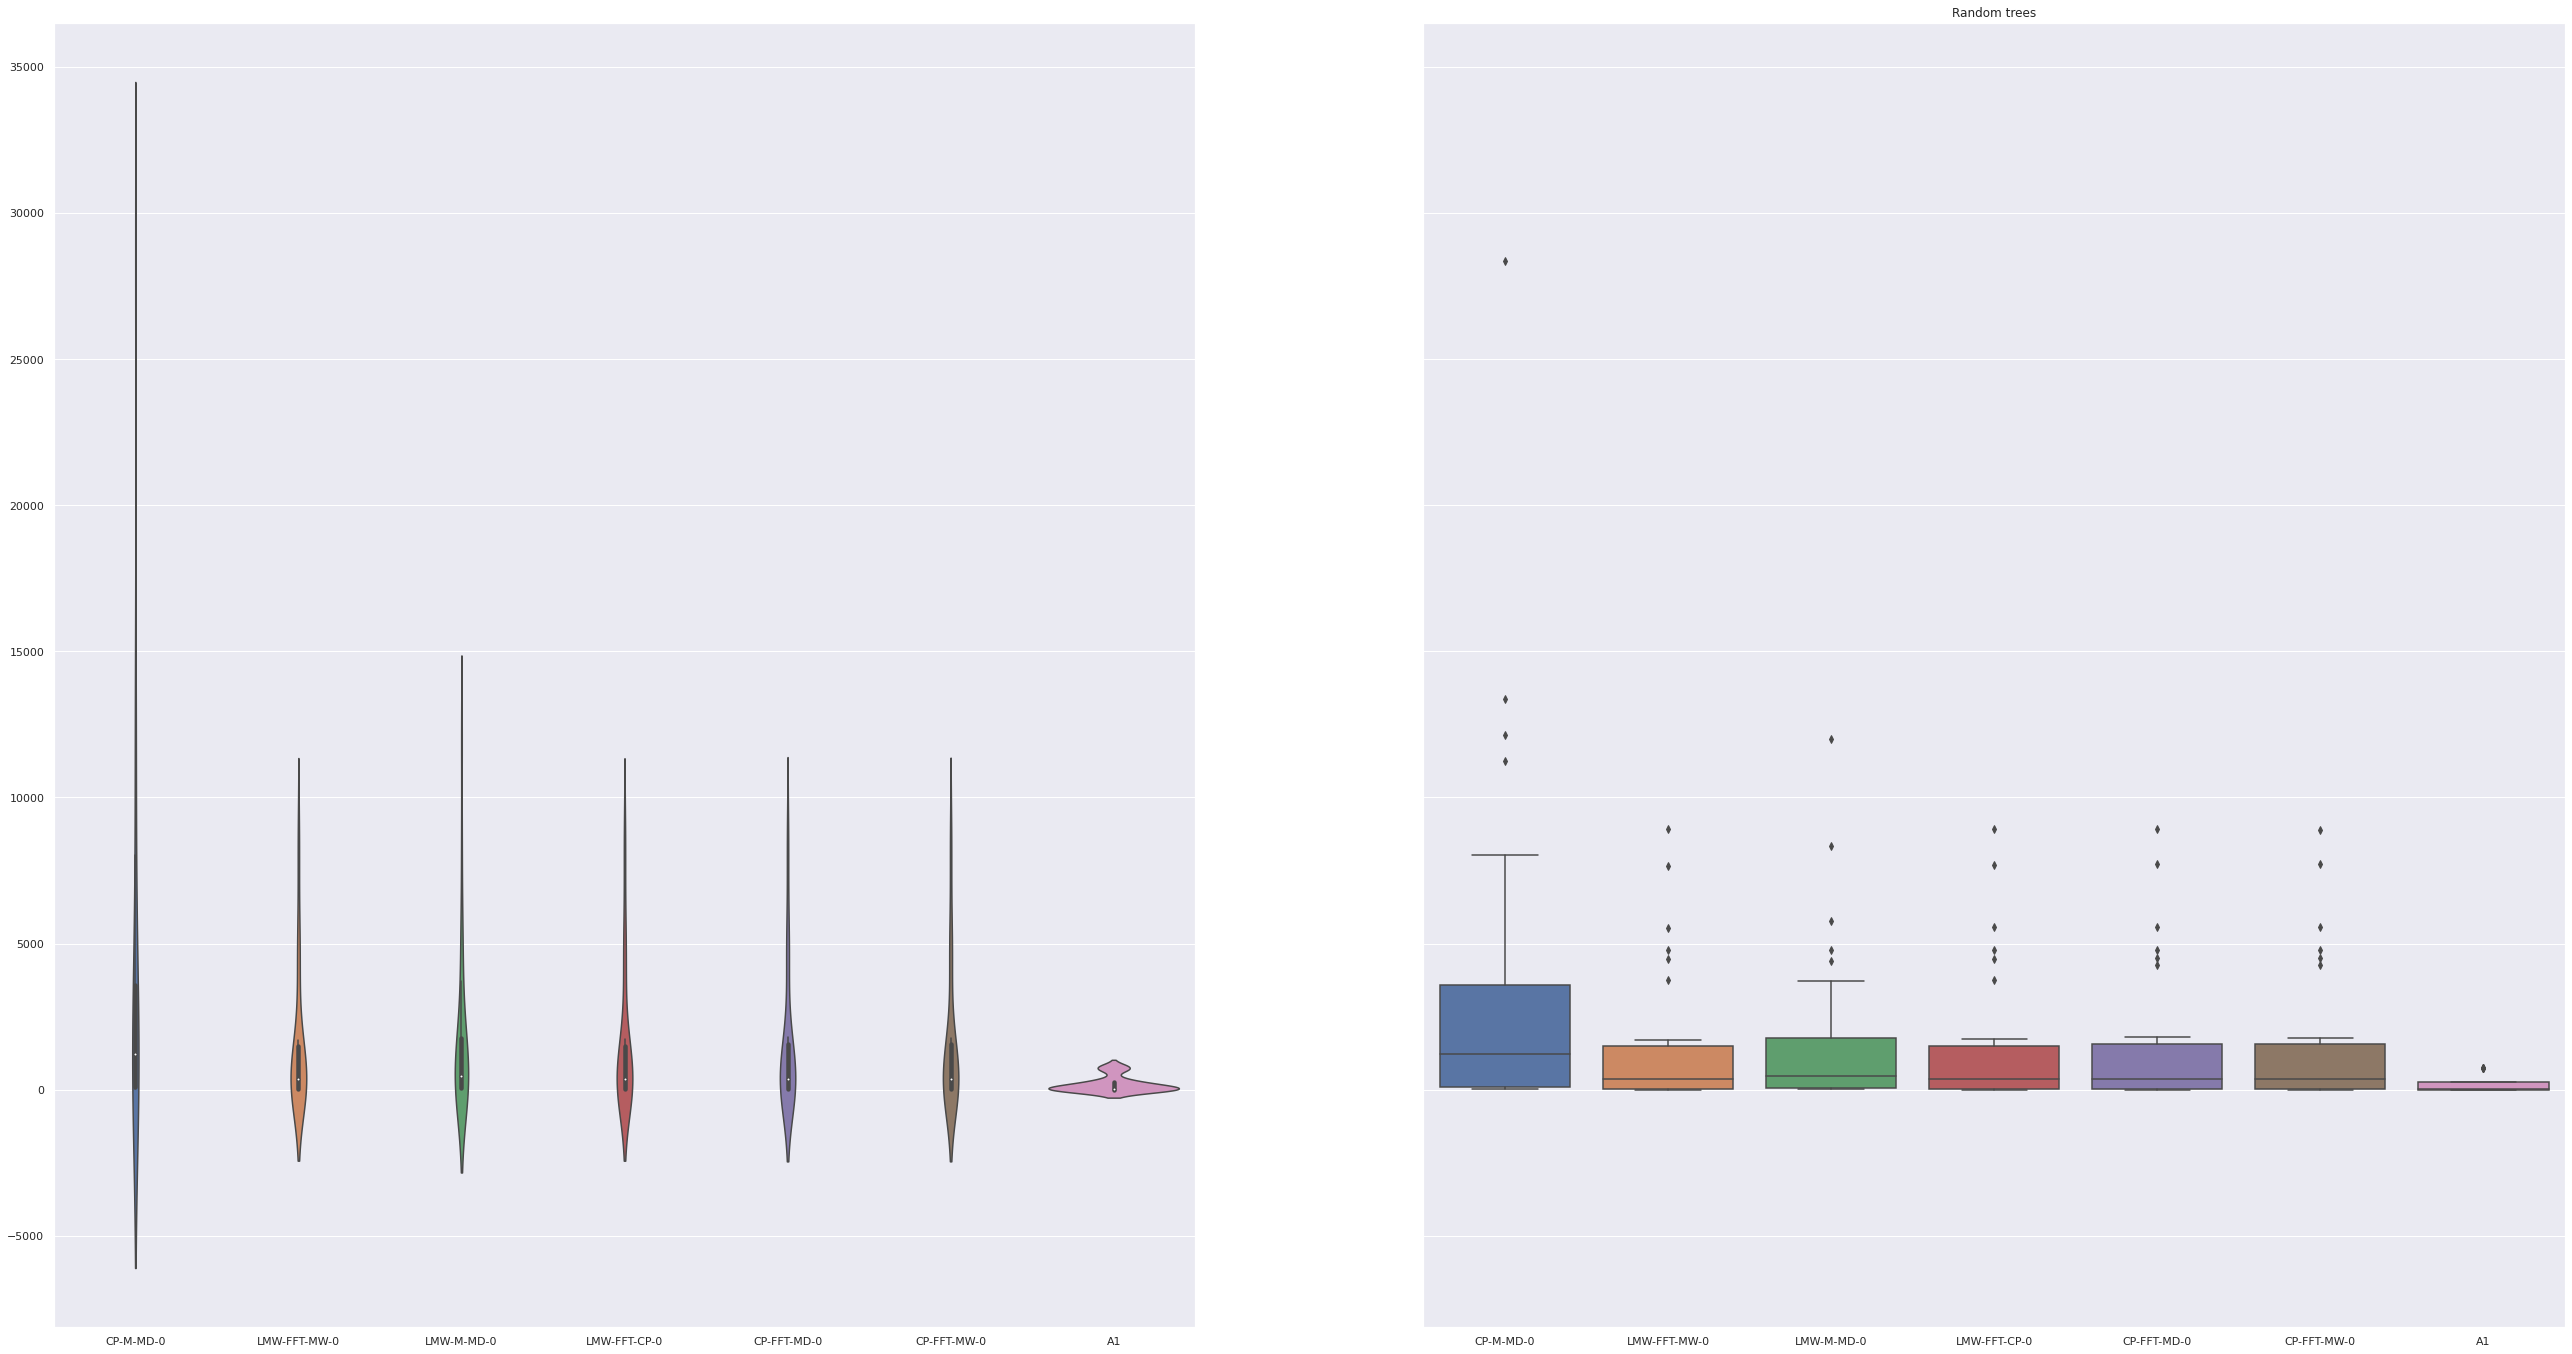

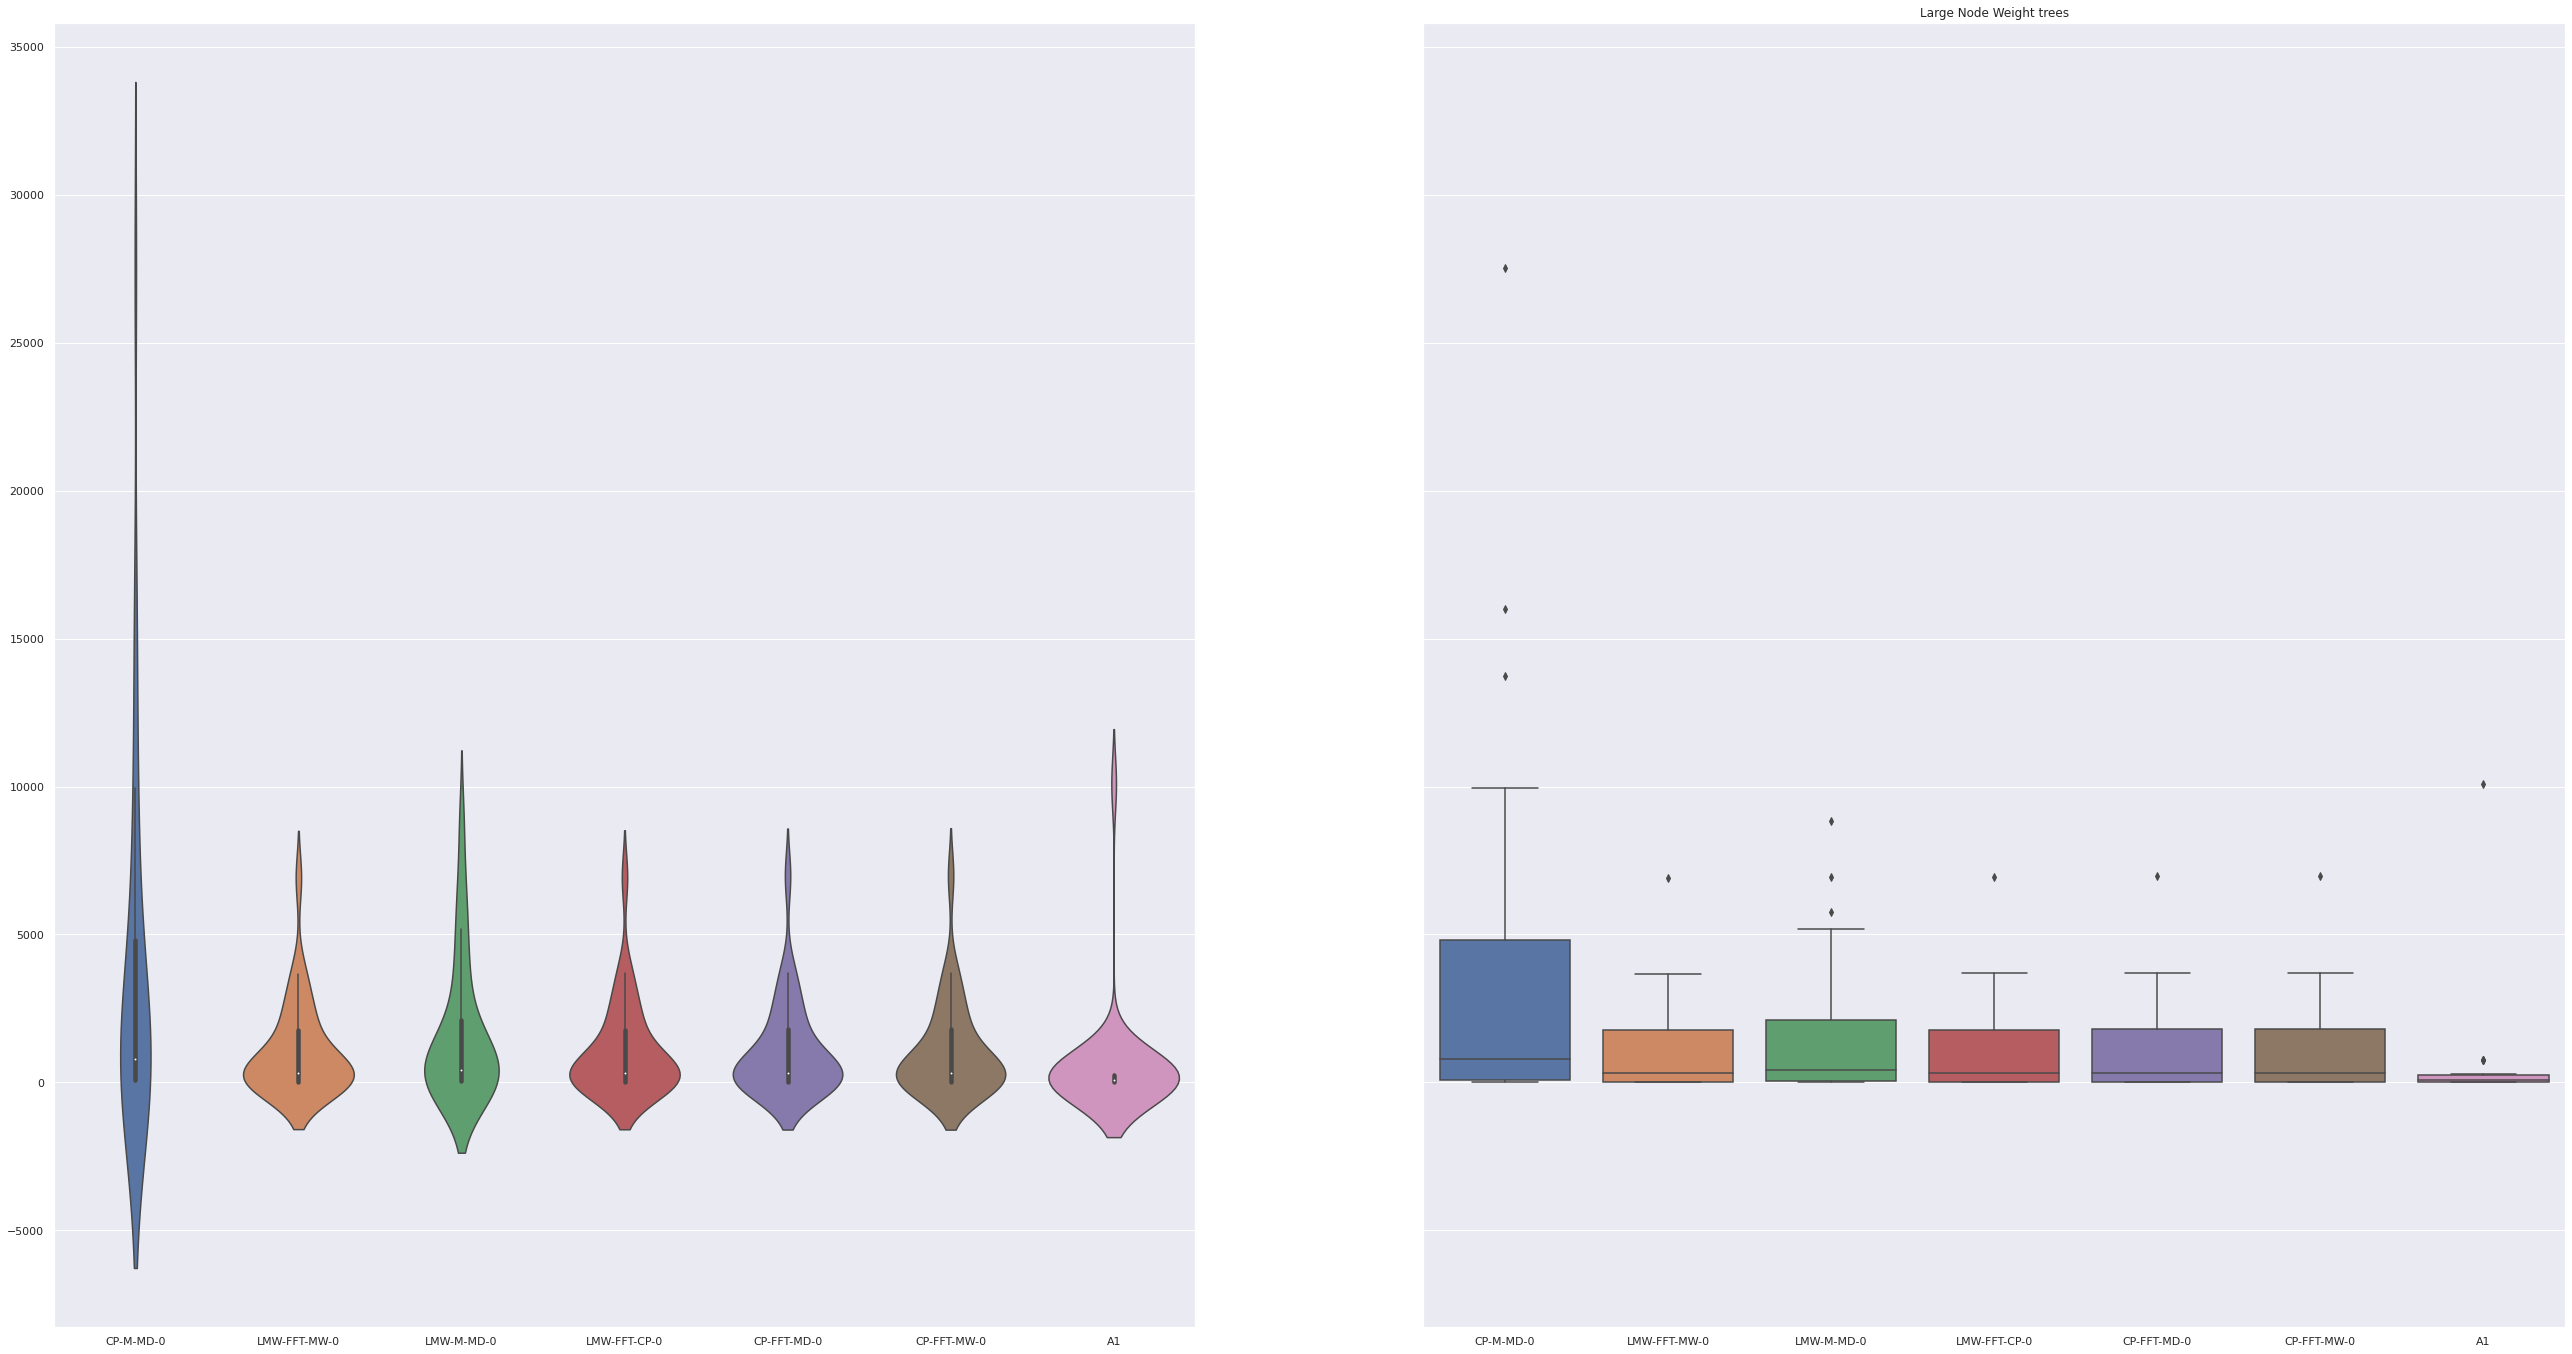

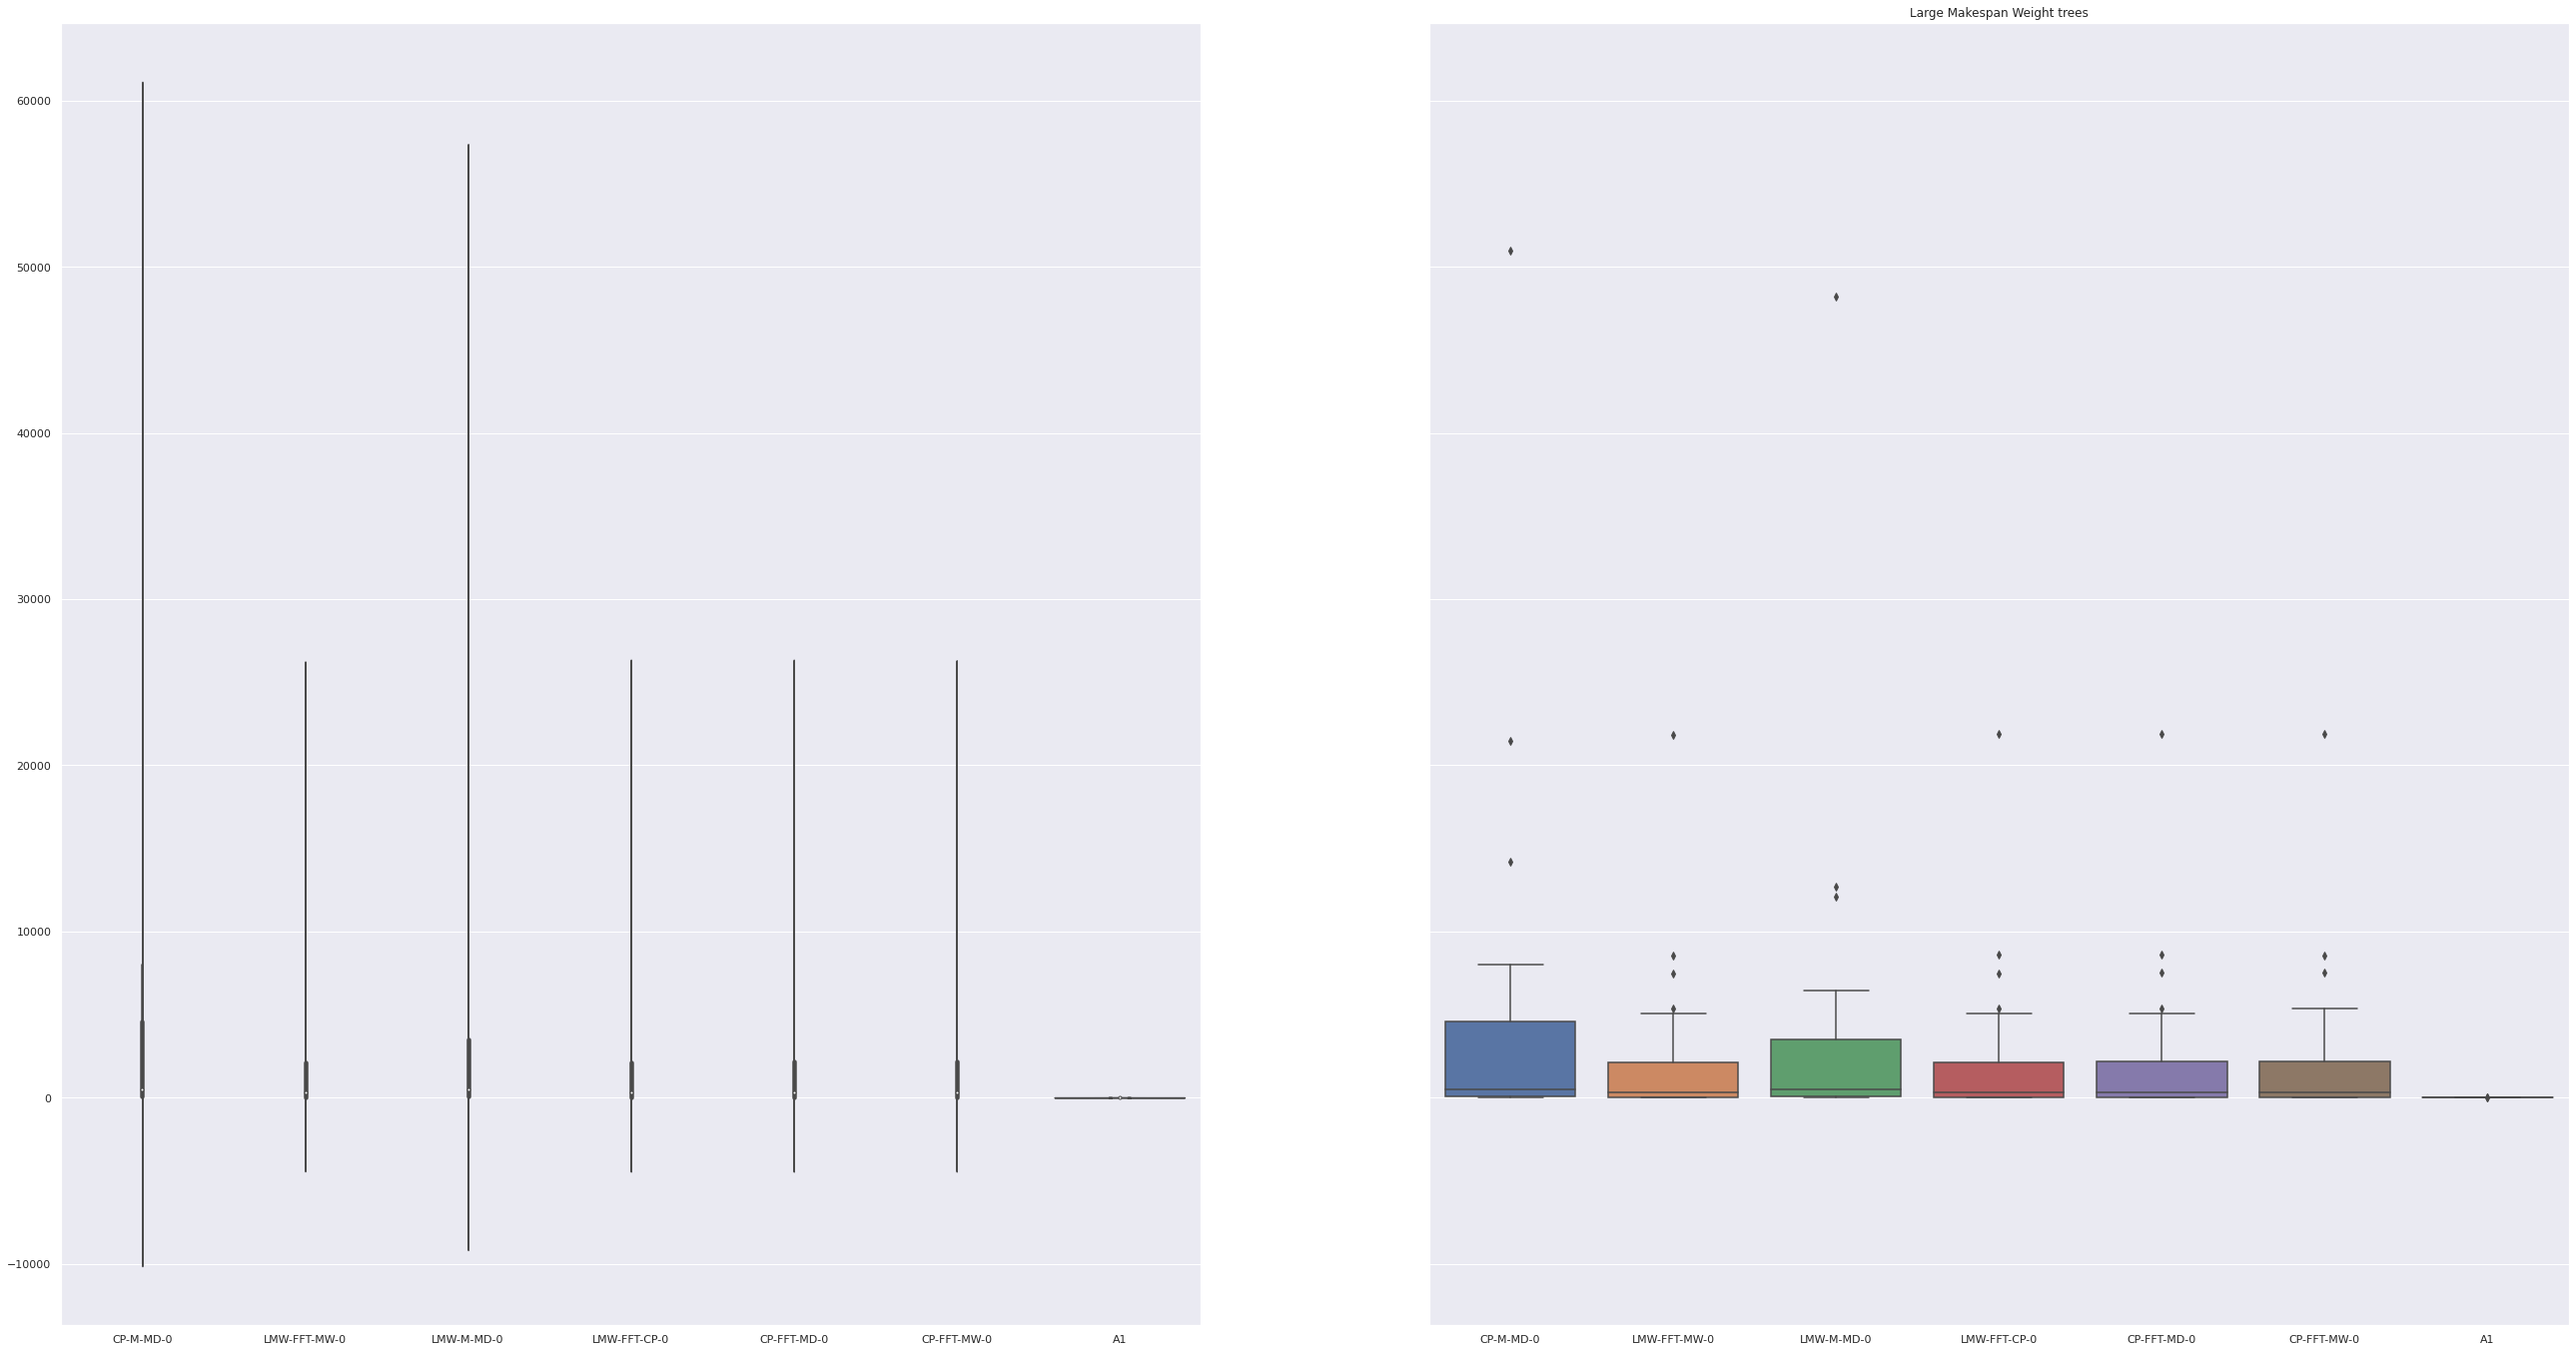

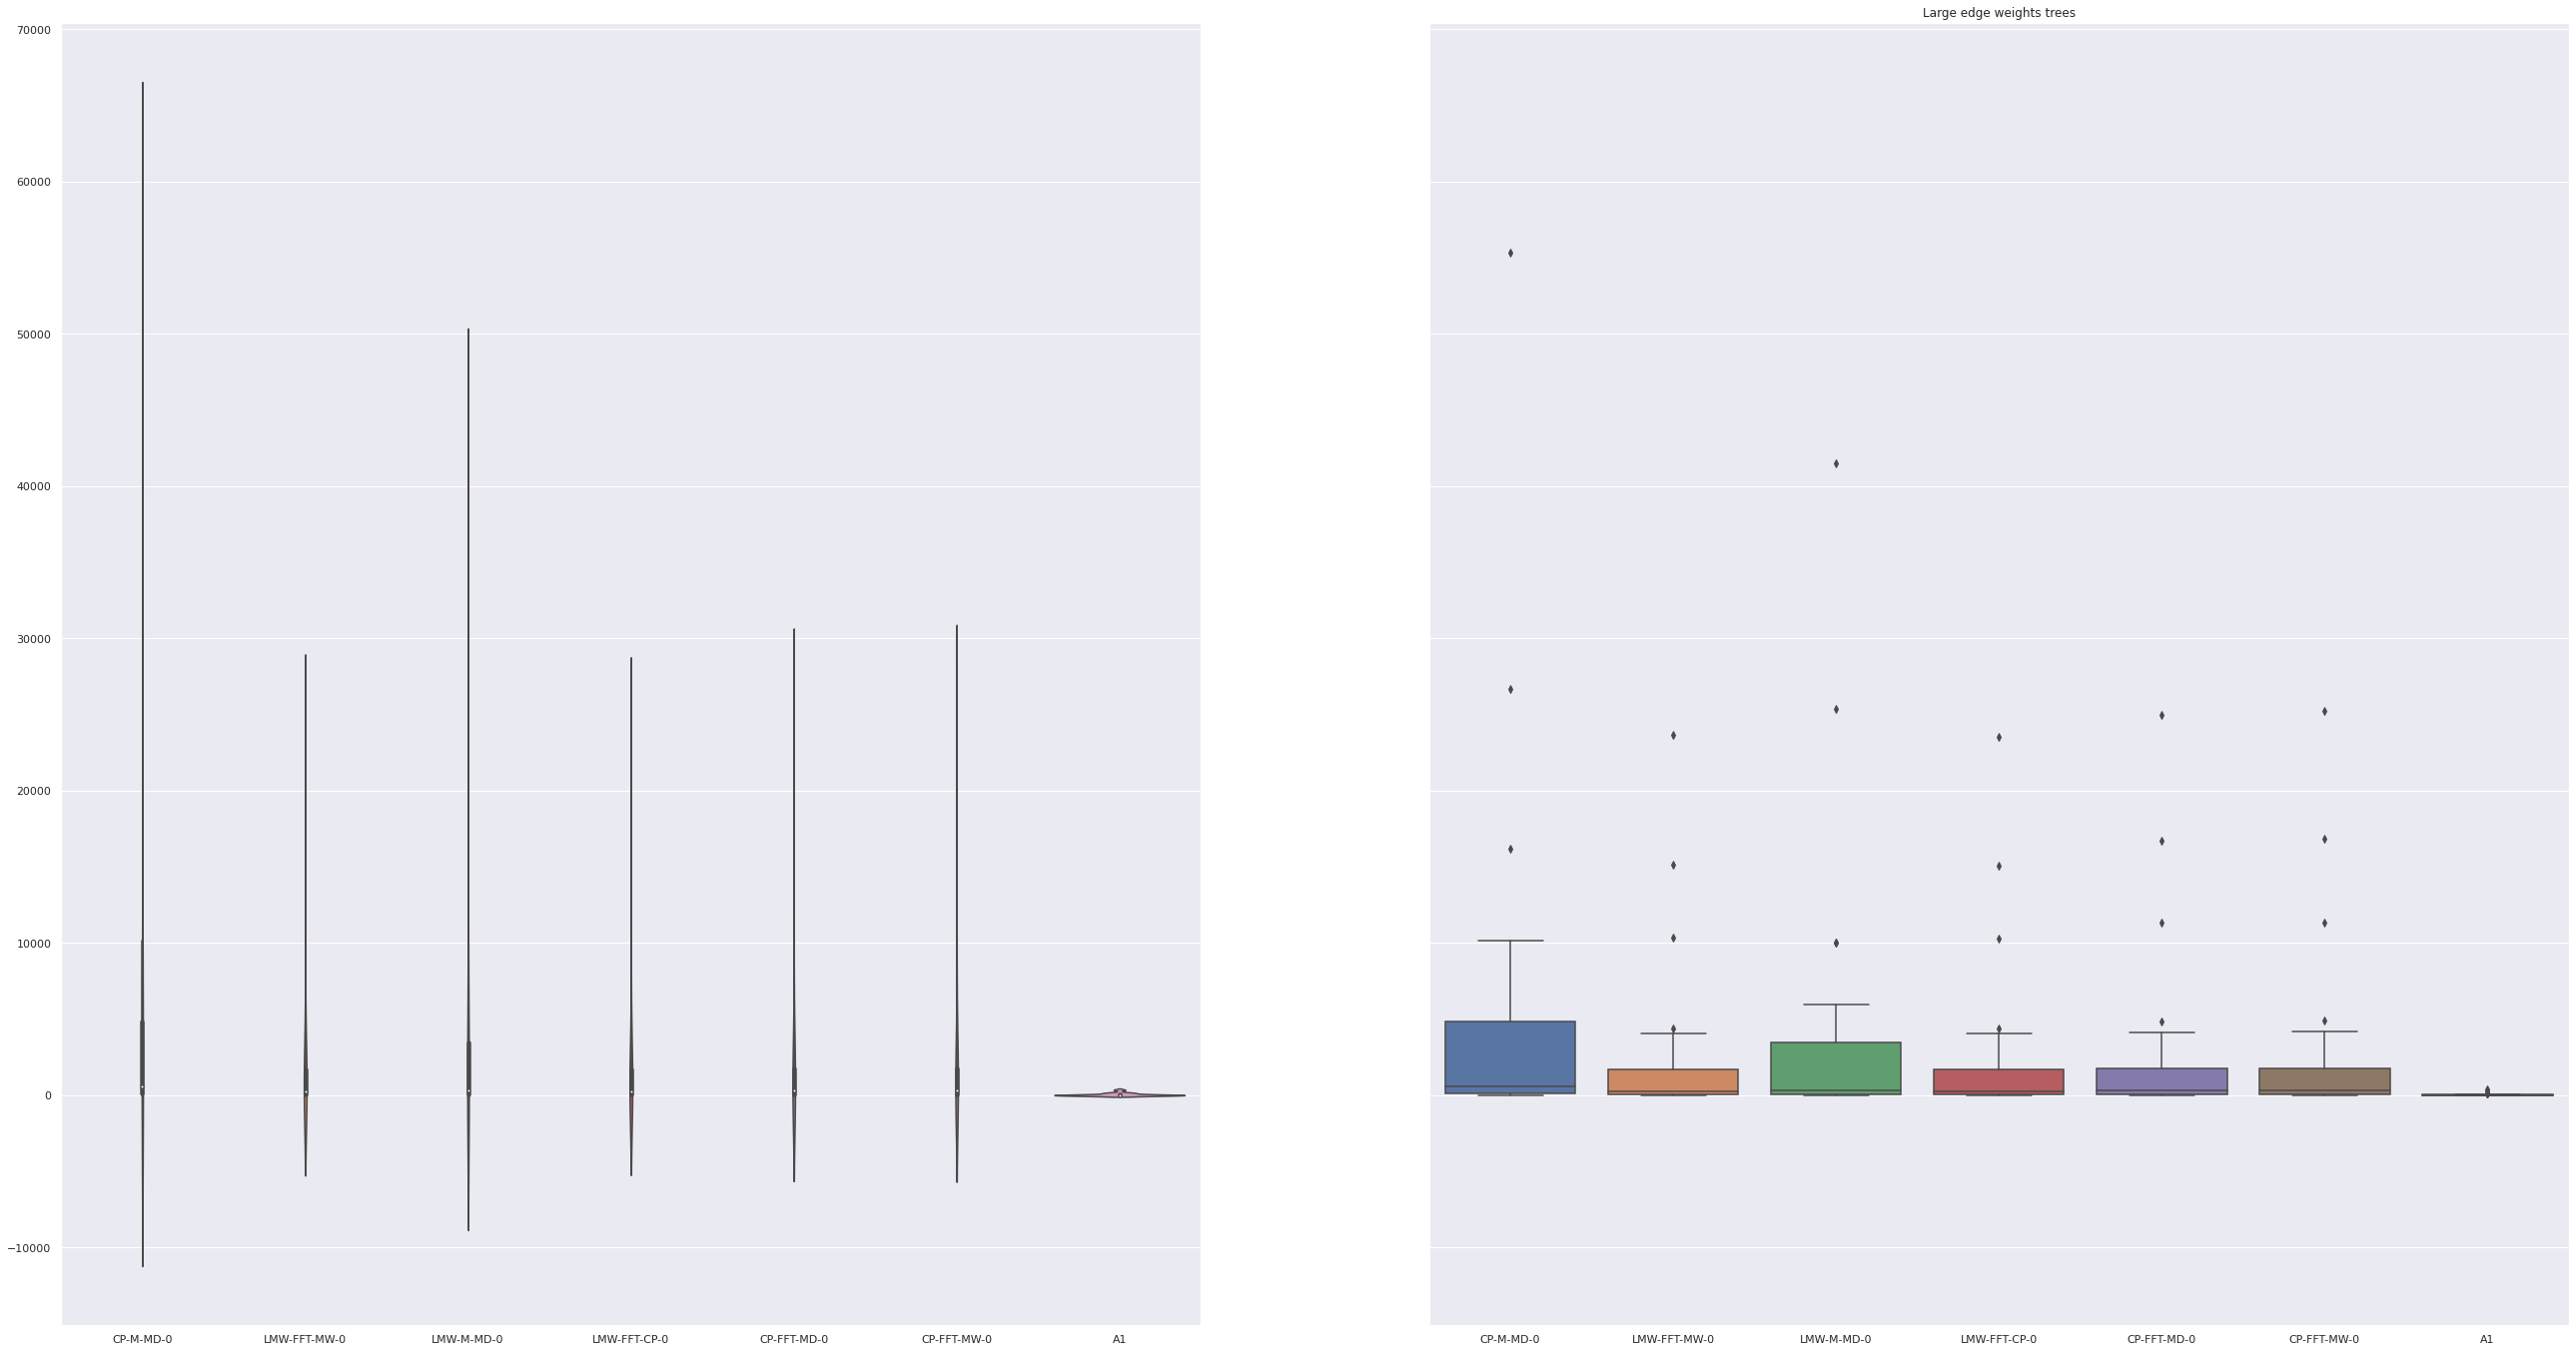

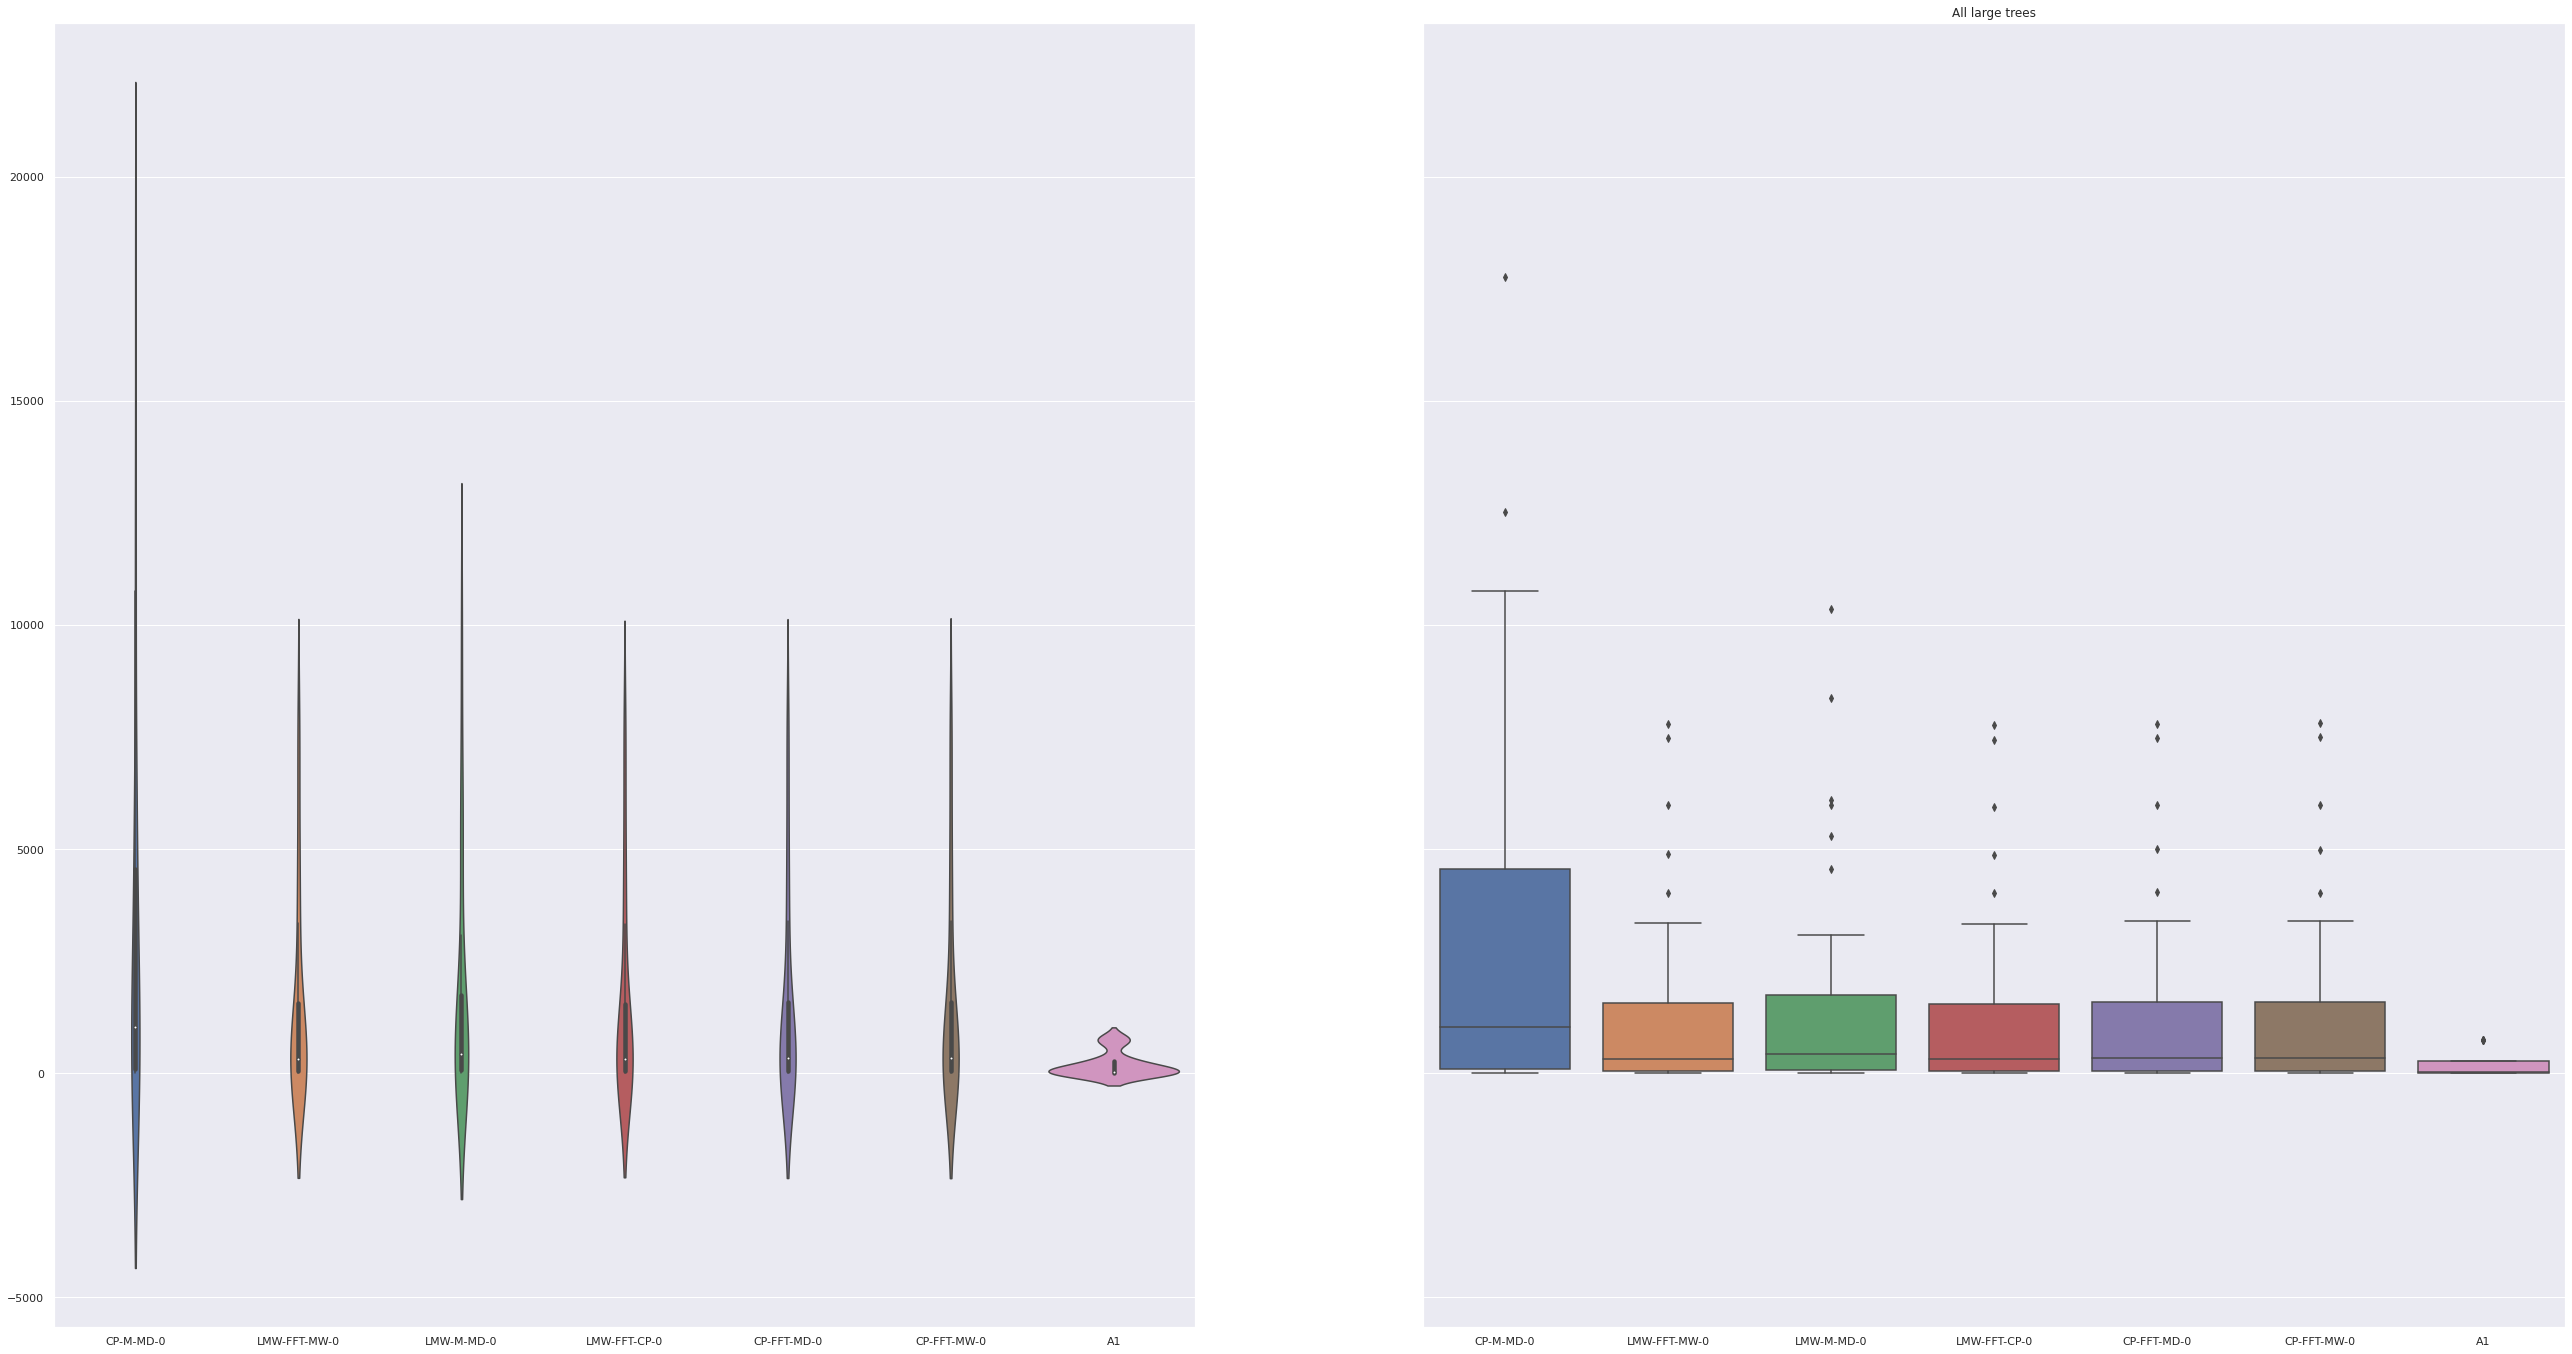

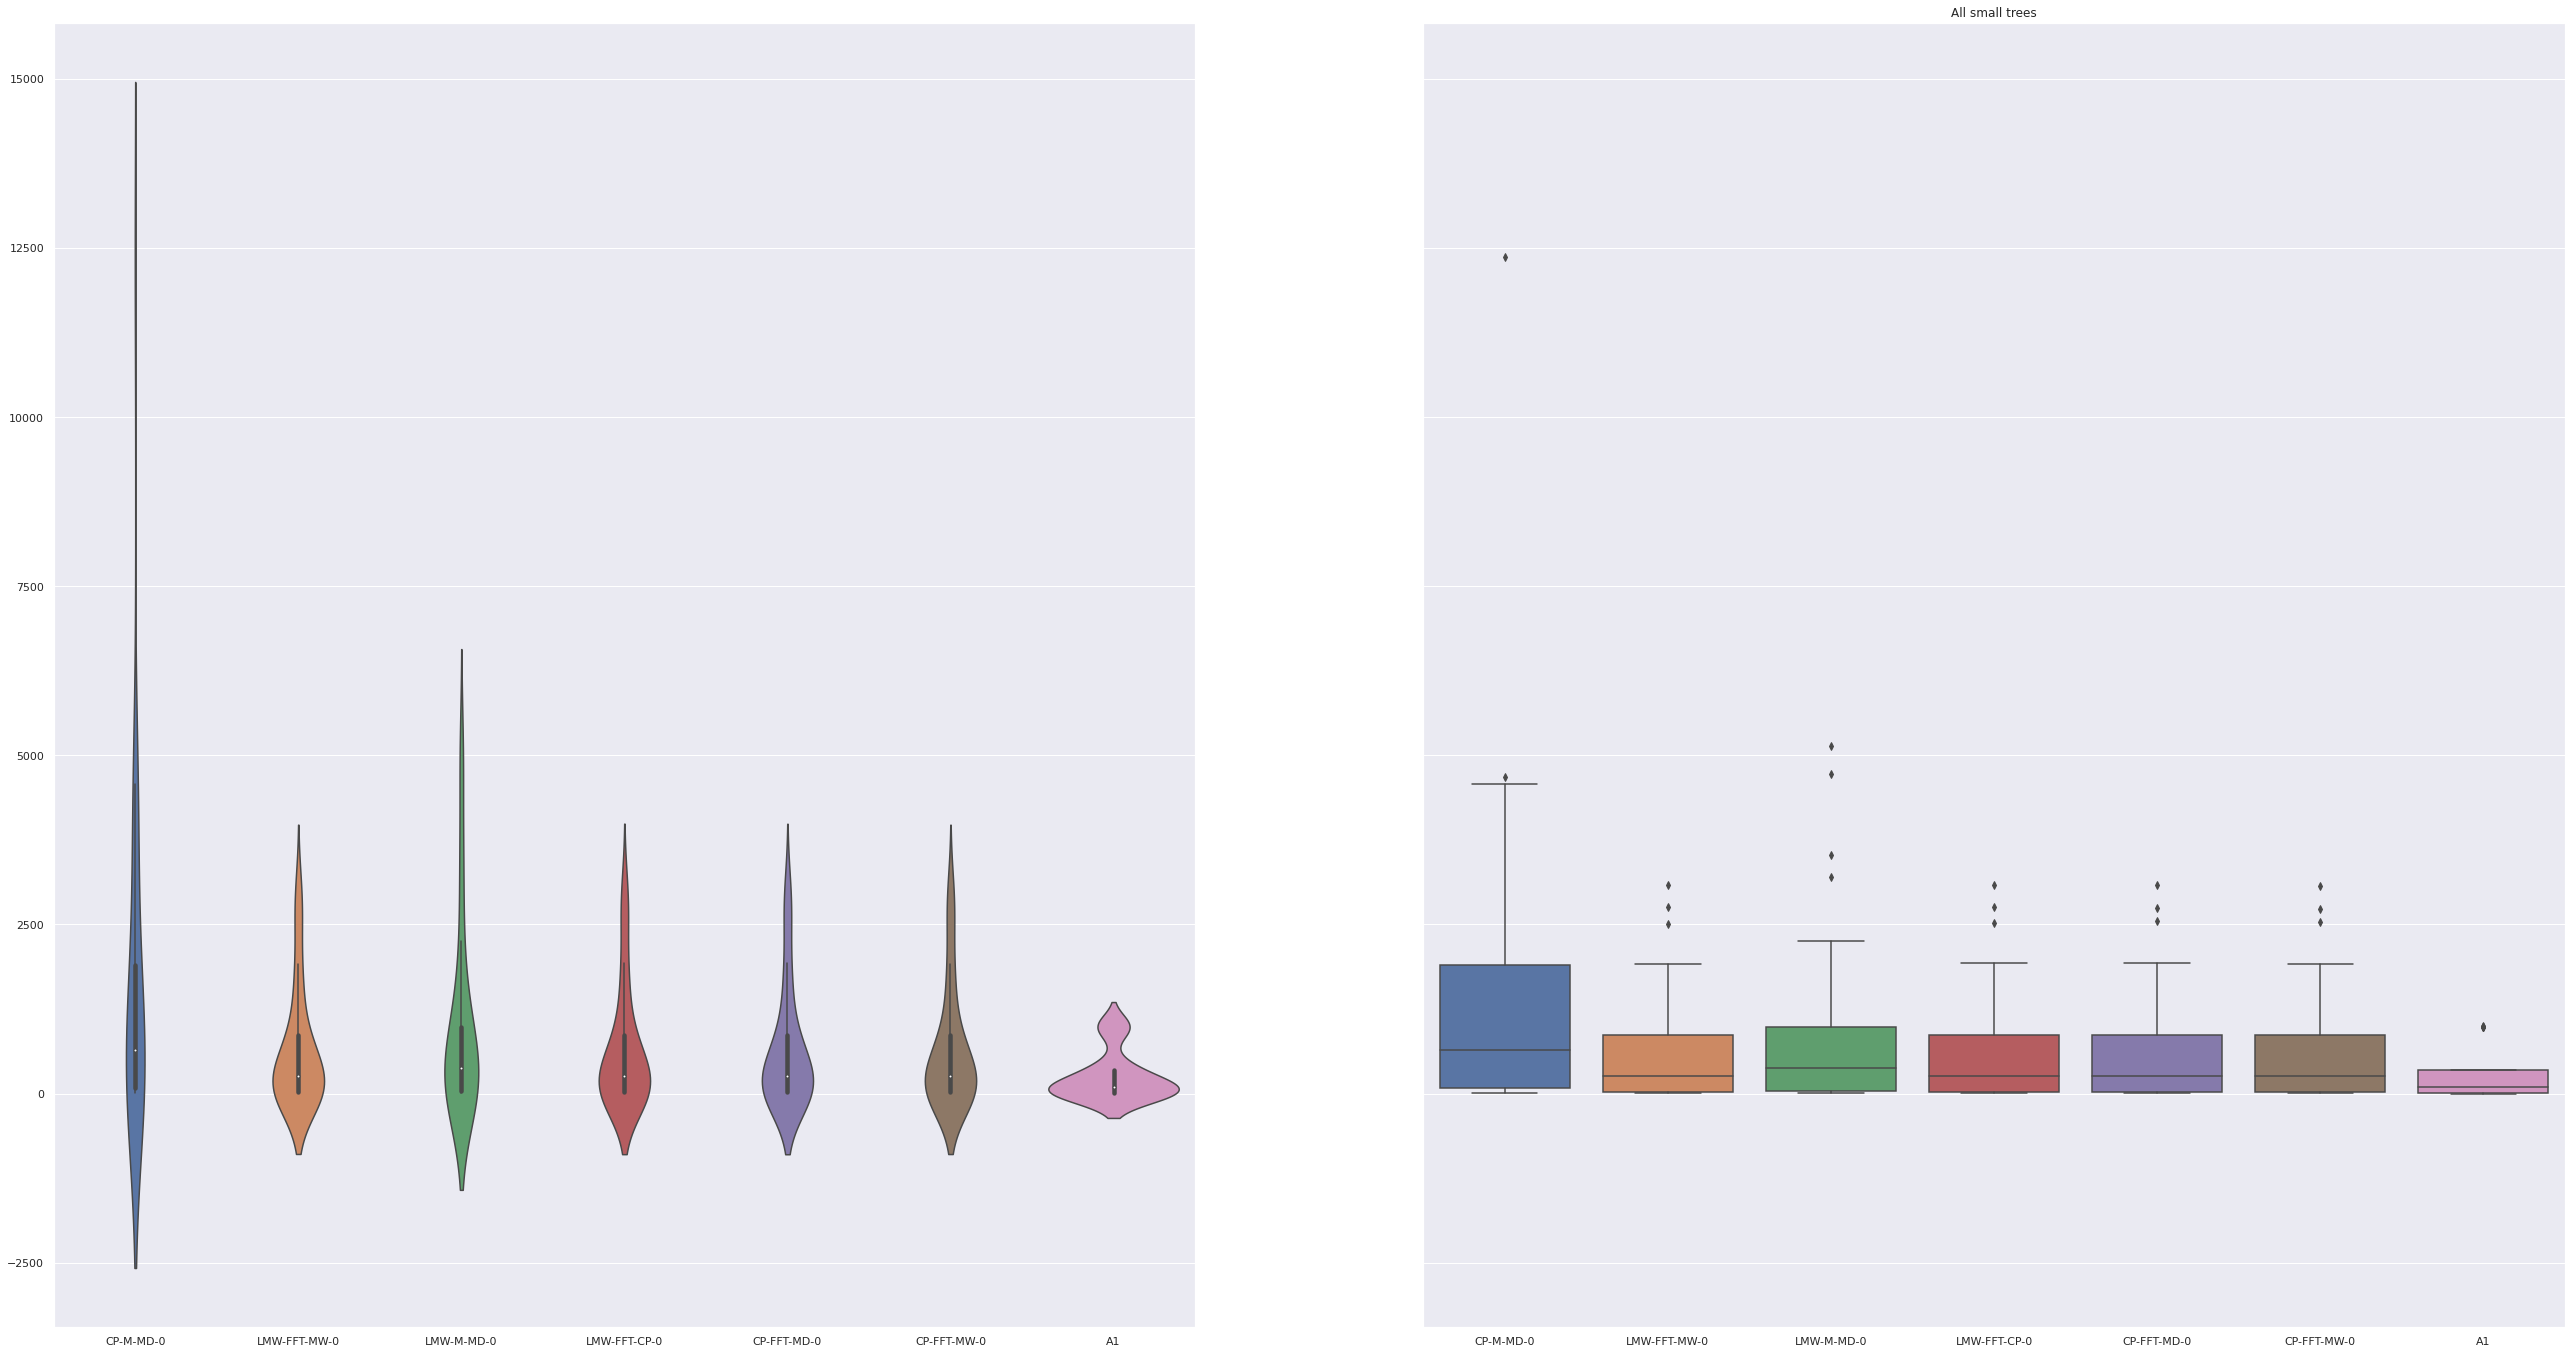

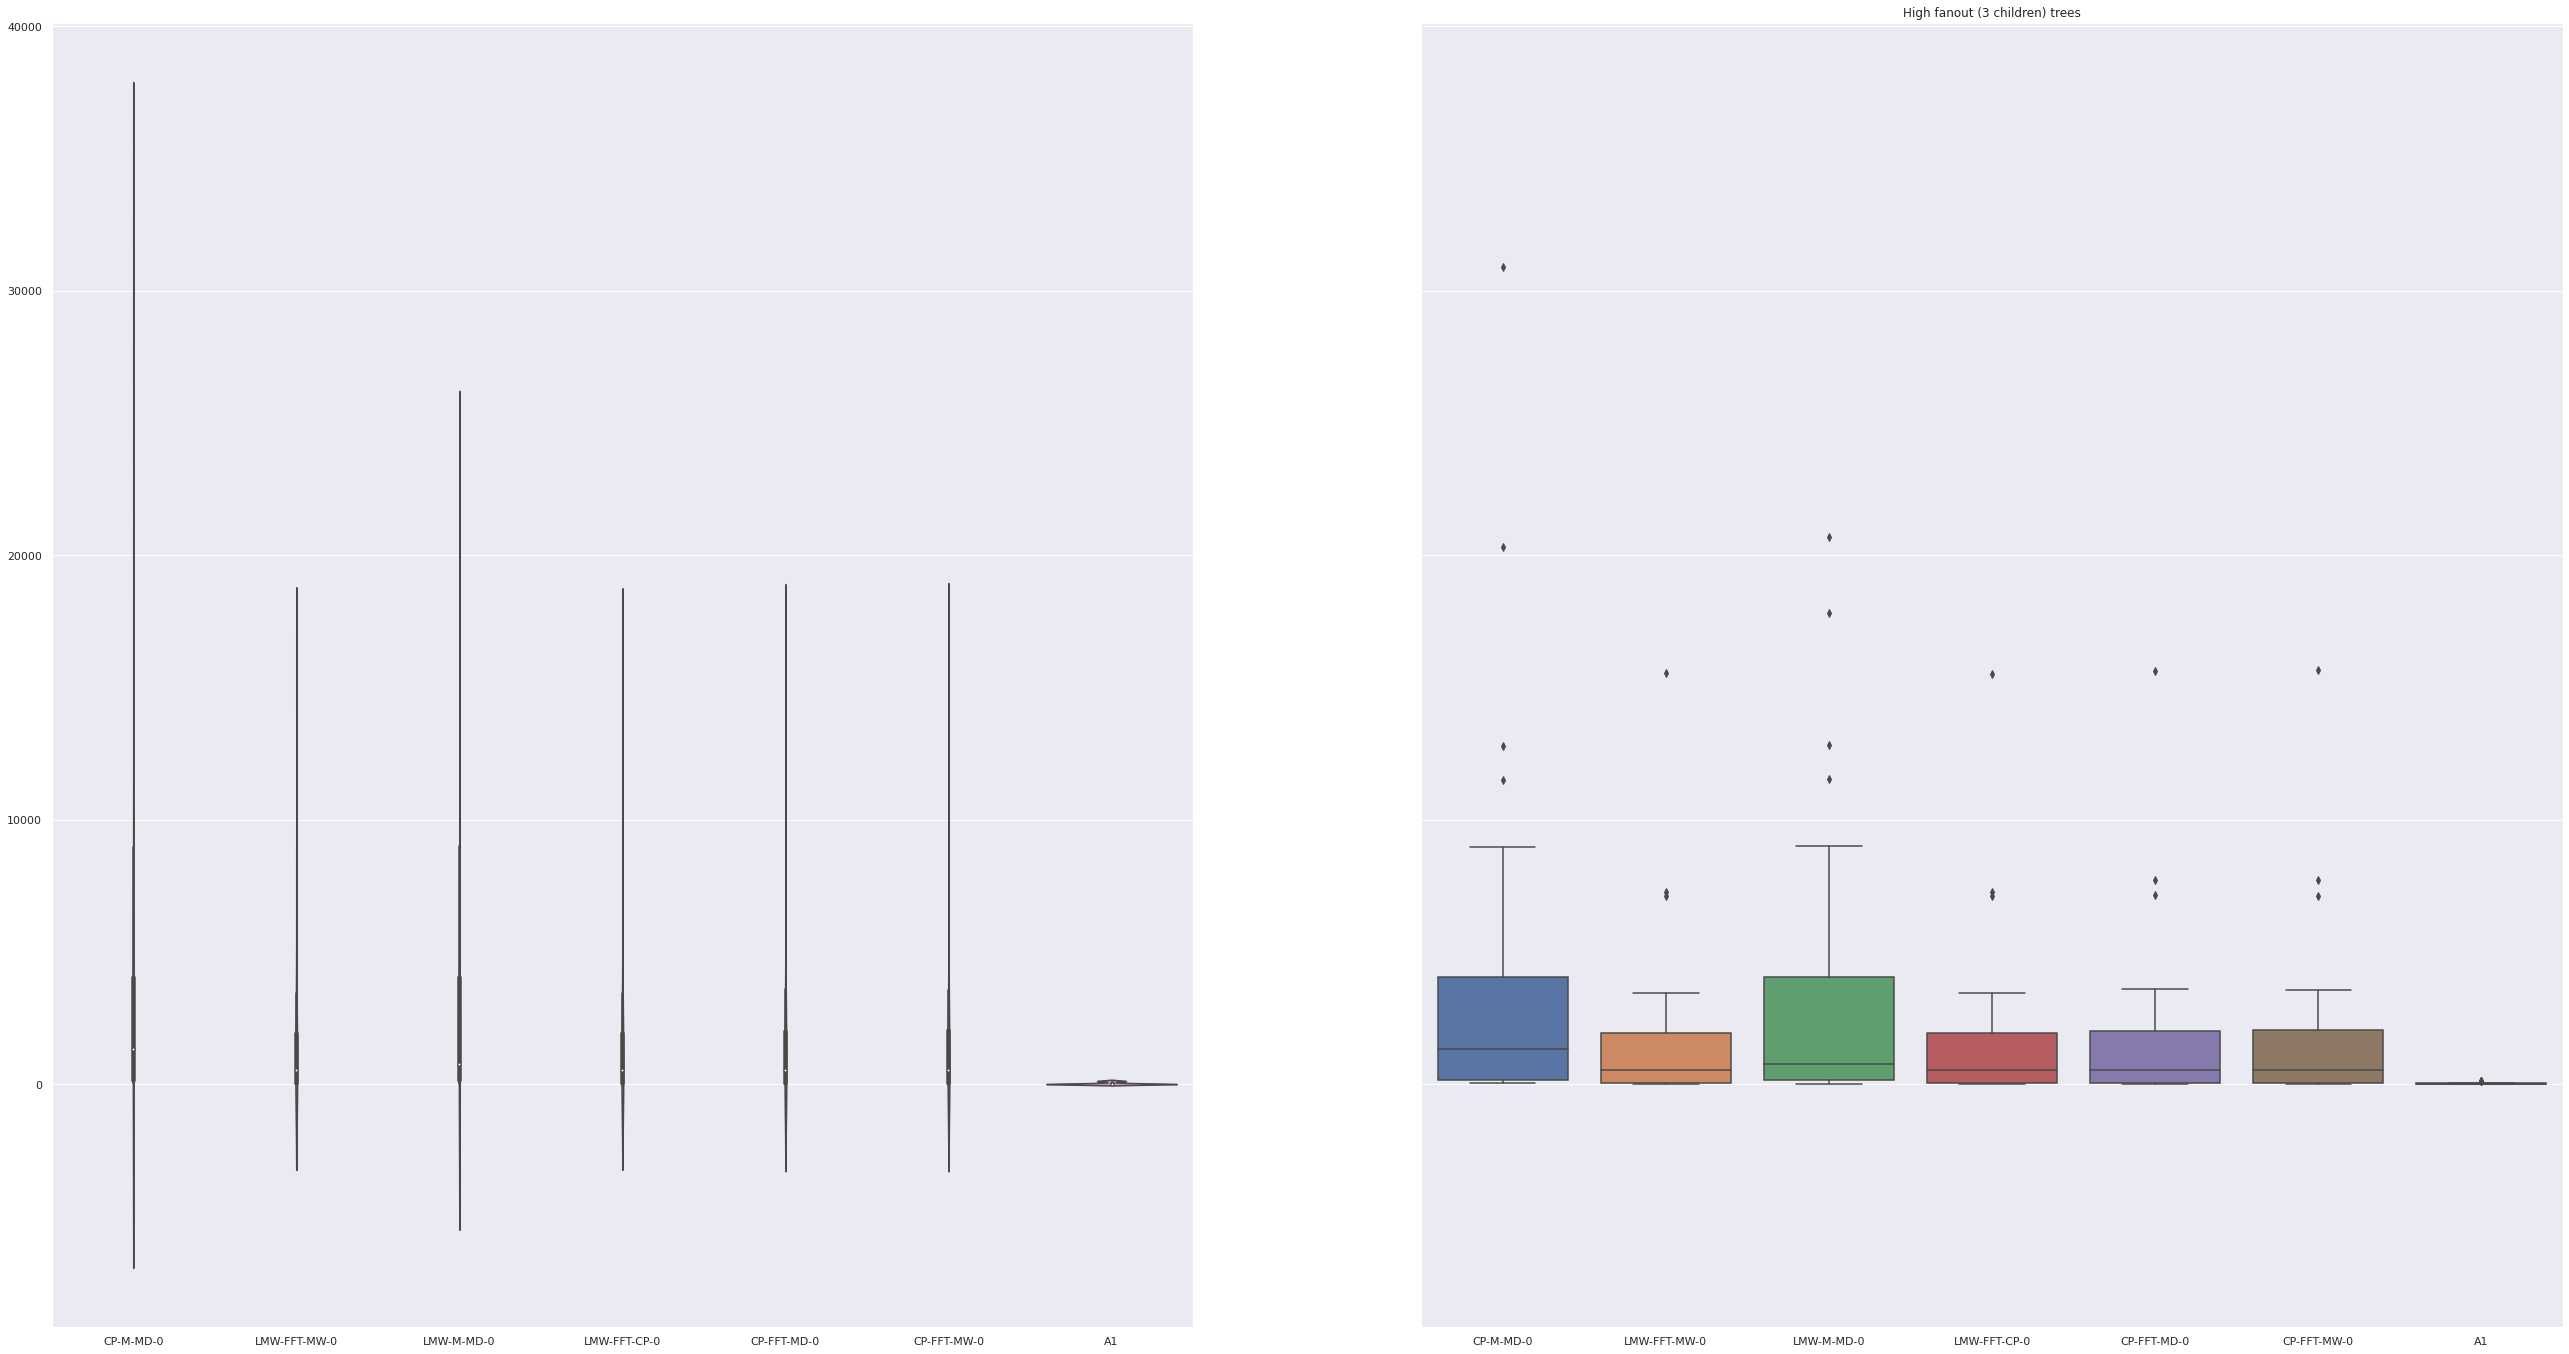

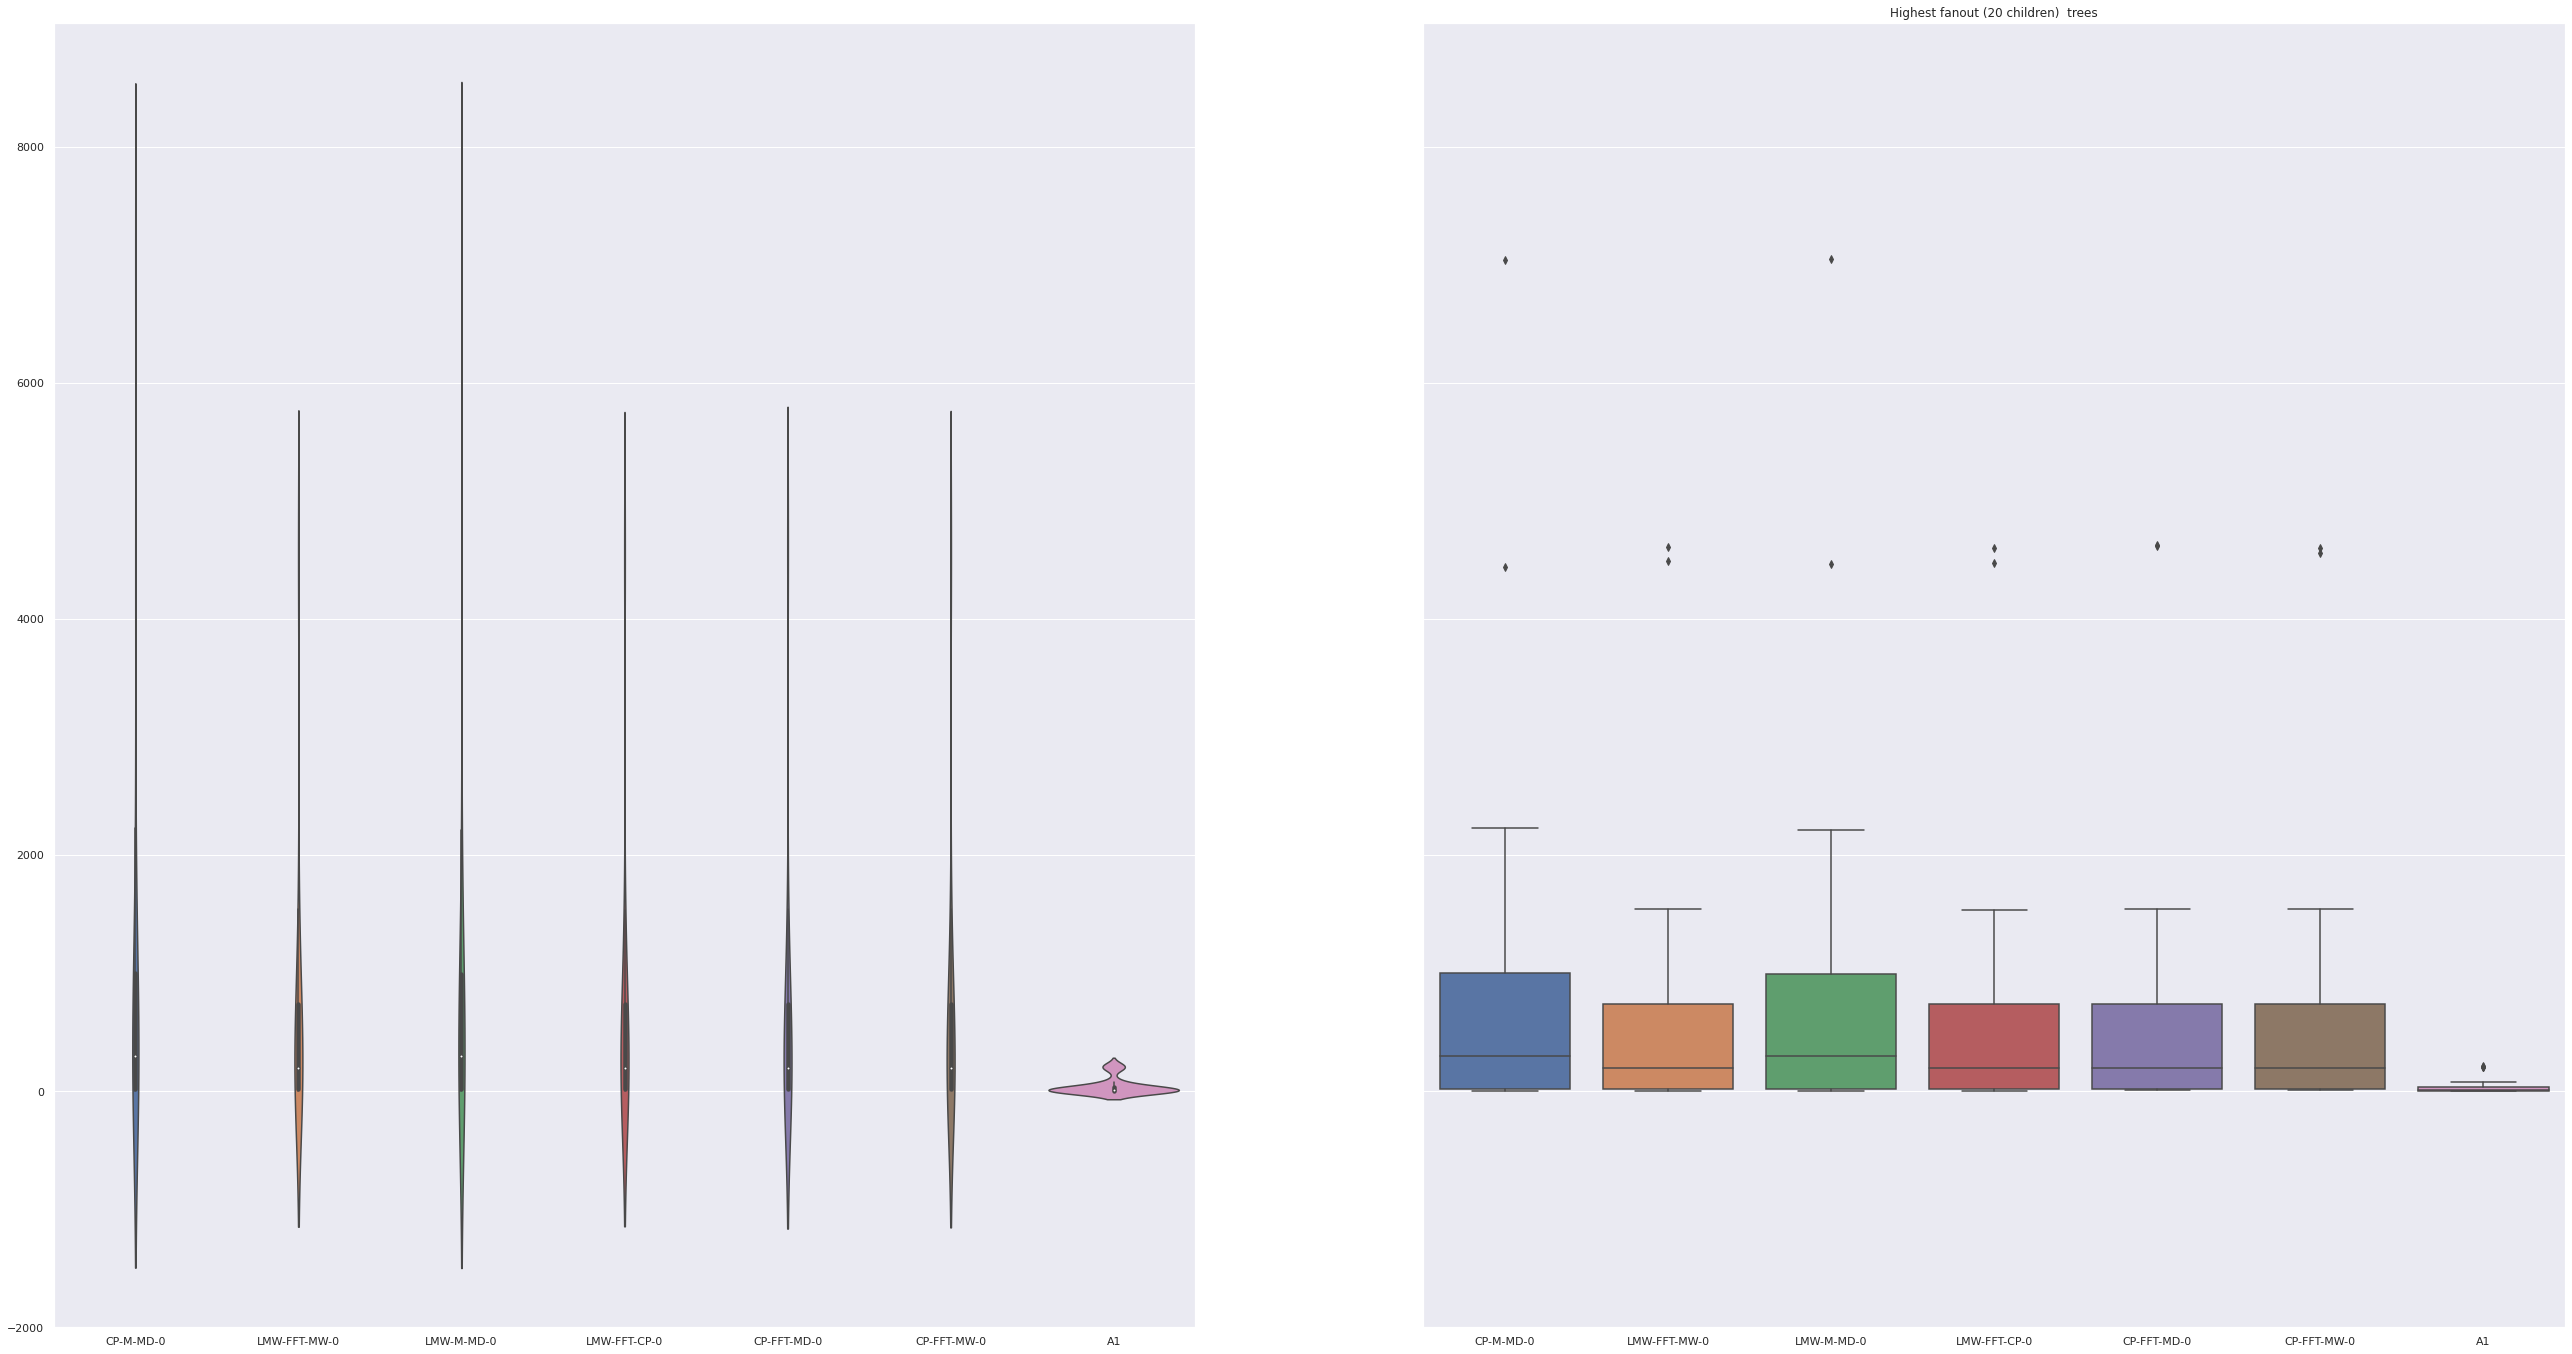

In [61]:
path= "/output-13-10/output"
tree_cats = ['large_node_weights', 'large_makespan_weights', 'all_large', 'trees', 'all_small', '3_children', \
            '20_children', 'large_edge_weights', 'random']
treesAcross0s, randomAcross0s, NodeAcross0s, MSAcross0s,LargeAcross0s, SmallAcross0s, Ch3Across0s, \
    Ch20Across0s, EdgeAcross0s = readColumnAcrossExperiments(path, 'time0step')

treesAcross1c, randomAcross1c, NodeAcross1c, MSAcross1c,LargeAcross1c, SmallAcross1c, Ch3Across1c, \
    Ch20Across1c, EdgeAcross1c = readColumnAcrossExperiments(path, 'time1cut')

treesAcrossp, randomAcrossp, NodeAcrossp, MSAcrossp,LargeAcrossp, SmallAcrossp, Ch3Acrossp, \
    Ch20Acrossp, EdgeAcrossp = readColumnAcrossExperiments(path, 'timepartition')

treesAcross0s['A1'] = treesAcross0s['A1'].apply(lambda x: 0)
treesAcross0s = treesAcross0s.fillna(0)
treesAcross1c = treesAcross1c.fillna(0)
treesAcrossp = treesAcrossp.fillna(0)
sumTimestrees = treesAcross0s.add(treesAcross1c)
sumTimestrees = sumTimestrees.add(treesAcrossp)

randomAcross0s['A1'] = randomAcross0s['A1'].apply(lambda x: 0)
randomAcross0s = randomAcross0s.fillna(0)
randomAcross1c = randomAcross1c.fillna(0)
randomAcrossp = randomAcrossp.fillna(0)
sumTimesrandom = randomAcross0s.add(randomAcross1c)
sumTimesrandom = sumTimesrandom.add(randomAcrossp)

NodeAcross0s['A1'] = NodeAcross0s['A1'].apply(lambda x: 0)
NodeAcross0s = NodeAcross0s.fillna(0)
NodeAcross1c = NodeAcross1c.fillna(0)
NodeAcrossp = NodeAcrossp.fillna(0)
sumTimesNode = NodeAcross0s.add(NodeAcross1c)
sumTimesNode = sumTimesNode.add(NodeAcrossp)

MSAcross0s['A1'] = MSAcross0s['A1'].apply(lambda x: 0)
MSAcross0s = MSAcross0s.fillna(0)
MSAcross1c = MSAcross1c.fillna(0)
MSAcrossp = MSAcrossp.fillna(0)
sumTimesMS = MSAcross0s.add(MSAcross1c)
sumTimesMS = sumTimesMS.add(MSAcrossp)

LargeAcross0s['A1'] = LargeAcross0s['A1'].apply(lambda x: 0)
LargeAcross0s = LargeAcross0s.fillna(0)
LargeAcross1c = LargeAcross1c.fillna(0)
LargeAcrossp = LargeAcrossp.fillna(0)
sumTimesLarge = LargeAcross0s.add(LargeAcross1c)
sumTimesLarge = sumTimesLarge.add(LargeAcrossp)

SmallAcross0s['A1'] = SmallAcross0s['A1'].apply(lambda x: 0)
SmallAcross0s = SmallAcross0s.fillna(0)
SmallAcross1c = SmallAcross1c.fillna(0)
SmallAcrossp = SmallAcrossp.fillna(0)
sumTimesSmall = SmallAcross0s.add(SmallAcross1c)
sumTimesSmall = sumTimesSmall.add(SmallAcrossp)

Ch3Across0s['A1'] = Ch3Across0s['A1'].apply(lambda x: 0)
Ch3Across0s = Ch3Across0s.fillna(0)
Ch3Across1c = Ch3Across1c.fillna(0)
Ch3Acrossp = Ch3Acrossp.fillna(0)
sumTimesCh3 = Ch3Across0s.add(Ch3Across1c)
sumTimesCh3 = sumTimesCh3.add(Ch3Acrossp)

Ch20Across0s['A1'] = Ch20Across0s['A1'].apply(lambda x: 0)
Ch20Across0s = Ch20Across0s.fillna(0)
Ch20Across1c = Ch20Across1c.fillna(0)
Ch20Acrossp = Ch20Acrossp.fillna(0)
sumTimesCh20 = Ch20Across0s.add(Ch20Across1c)
sumTimesCh20 = sumTimesCh20.add(Ch20Acrossp)

EdgeAcross0s['A1'] = EdgeAcross0s['A1'].apply(lambda x: 0)
EdgeAcross0s = EdgeAcross0s.fillna(0)
EdgeAcross1c = EdgeAcross1c.fillna(0)
EdgeAcrossp = EdgeAcrossp.fillna(0)
sumTimesEdge = EdgeAcross0s.add(EdgeAcross1c)
sumTimesEdge = sumTimesEdge.add(EdgeAcrossp)


drawAllCategories(sumTimestrees, sumTimesrandom, sumTimesNode, sumTimesMS,sumTimesLarge, sumTimesSmall,\
                   sumTimesCh3, sumTimesCh20, sumTimesEdge)
